# 1. Import libraries & import libraries

In [64]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [65]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

In [66]:
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [67]:
df=pd.read_csv('F:/DS/craigslist-used car raw data/vehicles.csv')

# 2. Data cleaning
## 2.1 check the information

In [68]:
df.shape

(509577, 25)

In [69]:
df.head(5)

id                                                url  \
0  7034441763  https://saltlakecity.craigslist.org/cto/d/salt...   
1  7034440610  https://saltlakecity.craigslist.org/ctd/d/sand...   
2  7034440588  https://saltlakecity.craigslist.org/ctd/d/sand...   
3  7034440546  https://saltlakecity.craigslist.org/ctd/d/sand...   
4  7034406932  https://saltlakecity.craigslist.org/ctd/d/evan...   

           region                           region_url  price    year  \
0  salt lake city  https://saltlakecity.craigslist.org  17899  2012.0   
1  salt lake city  https://saltlakecity.craigslist.org      0  2016.0   
2  salt lake city  https://saltlakecity.craigslist.org  46463  2015.0   
3  salt lake city  https://saltlakecity.craigslist.org      0  2016.0   
4  salt lake city  https://saltlakecity.craigslist.org  49999  2018.0   

  manufacturer        model  condition    cylinders  ... drive     size  \
0   volkswagen       golf r  excellent  4 cylinders  ...   4wd  compact   
1         ford        f-150  excellent          NaN  ...   4wd      NaN   
2          gmc  sierra 1500  excellent          NaN  ...   4wd      NaN   
3         ford        f-150  excellent          NaN  ...   4wd      NaN   
4         ford        f-450        NaN          NaN  ...   4wd      NaN   

        type paint_color                                          image_url  \
0  hatchback       black  https://images.craigslist.org/00G0G_fTLDWM5Xyv...   
1        NaN         NaN  https://images.craigslist.org/00v0v_7Cu0buIofU...   
2        NaN       white  https://images.craigslist.org/01515_lPvJ9bfbdY...   
3        NaN         NaN  https://images.craigslist.org/00T0T_6Rjfp3NS4O...   
4     pickup       white  https://images.craigslist.org/00W0W_8yIUwRBXXd...   

                                         description county state      lat  \
0  PRICE REDUCED!   -Garage kept -Low Miles (63K)...    NaN    ut  40.7372   
1  Drive it home today. Call (Or Text) us now !!C...    NaN    ut  40.5881   
2  Drive it home today. Call (Or Text) us now !!C...    NaN    ut  40.5881   
3  Drive it home today. Call (Or Text) us now !!C...    NaN    ut  40.5881   
4  2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...    NaN    ut  40.3744   

      long  
0 -111.858  
1 -111.884  
2 -111.884  
3 -111.884  
4 -104.694  

[5 rows x 25 columns]

In [70]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 25 columns):
id              509577 non-null int64
url             509577 non-null object
region          509577 non-null object
region_url      509577 non-null object
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
cylinders       309894 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
vin             302152 non-null object
drive           365434 non-null object
size            167574 non-null object
type            368046 non-null object
paint_color     344871 non-null object
image_url       509563 non-null object
description     509561 non-null object
county          0 non-null float64
state           509577 non-null obj

## 2.2 Drop the unnecessary columns
In this part I drop the columns. There are mainly two reasons for that. Firstly some columns are not really useful for my next work. Secondly some columns have a big proportion of missing data.

In [71]:
#drop the useless column
drop_columns=['county','url','region_url','vin','image_url','fuel','cylinders','lat','long','state','description','size','type']
df=df.drop(columns=drop_columns)

## 2.3 Deal with missing data

In [72]:
#check the isnull number
df.isnull().sum()

id                   0
region               0
price                0
year              1527
manufacturer     22764
model             7989
condition       231934
odometer         92324
title_status      3062
transmission      3719
drive           144143
paint_color     164706
dtype: int64

In [73]:
#fillter the columns need to be filled by float and object
for n in df.drop(['manufacturer','model','paint_color'],axis=1).columns:
    if df[n].dtype=='float':
        df[n]=df[n].fillna(df[n].mean())
    if df[n].dtype=='object':
        df[n]=df[n].fillna(df[n].mode()[0])

In [74]:
#fill other columns
df['year']=df['year'].fillna(df['year'].mode()[0])
df['manufacturer']=df['manufacturer'].fillna('unkonwn')
df['model']=df['model'].fillna('unknown')
df['paint_color']=df['paint_color'].fillna('unknown')

In [75]:
#check the isnull number
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
odometer        0
title_status    0
transmission    0
drive           0
paint_color     0
dtype: int64

In [76]:
#change the 'year' type into int
df['year']=df['year'].astype('int')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 12 columns):
id              509577 non-null int64
region          509577 non-null object
price           509577 non-null int64
year            509577 non-null int32
manufacturer    509577 non-null object
model           509577 non-null object
condition       509577 non-null object
odometer        509577 non-null float64
title_status    509577 non-null object
transmission    509577 non-null object
drive           509577 non-null object
paint_color     509577 non-null object
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 44.7+ MB


## 2.4 Drop the outliers
Outliers are unusual values in dataset, and they can distort statistical analyses and violate their assumptions. In this project I decided to use IQR and boxplot to detect and delete the outliers

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


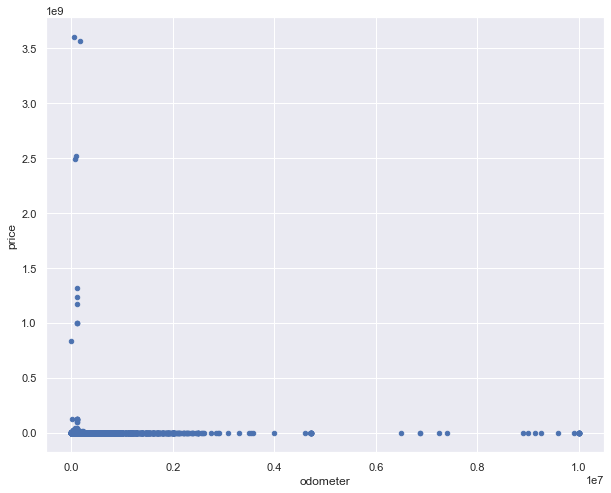

In [86]:
#check the fake max data
df.plot(kind='scatter',x='odometer',y='price',figsize=(10, 8))

In [87]:
df['price'].max()

3600028900

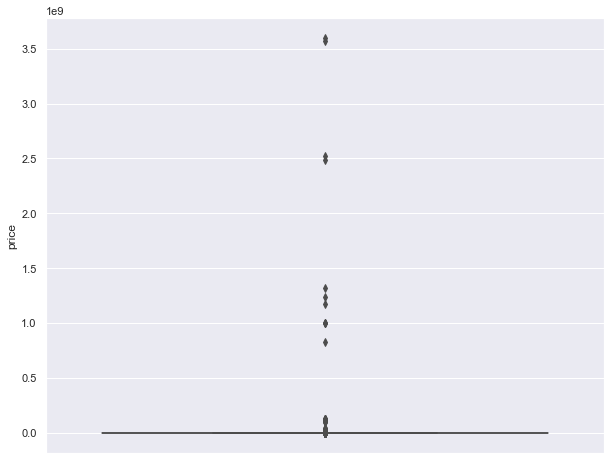

In [88]:
#detecting outlier by box chart
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.boxplot( y='price', data=df)

In [89]:
#get the iqr of price
from scipy.stats import iqr
iqr=iqr(df['price'])
iqr

13960.0

In [90]:
price_stats=df['price'].describe()
price_stats

count    5.095770e+05
mean     5.479684e+04
std      9.575025e+06
min      0.000000e+00
25%      3.995000e+03
50%      9.377000e+03
75%      1.795500e+04
max      3.600029e+09
Name: price, dtype: float64

In [91]:
#get the upper and lower bound
Q3=price_stats['75%']
upper_bound=Q3+(iqr*1.5)
Q1=price_stats['25%']
lower_bound=Q1-(iqr*1.5)
print(upper_bound)
print(lower_bound)

38895.0
-16945.0


In [92]:
outlier_above=[n for n in df['price'].values if n>upper_bound]

In [93]:
#delete outliers
clean_data=df[~df['price'].isin(outlier_above)]

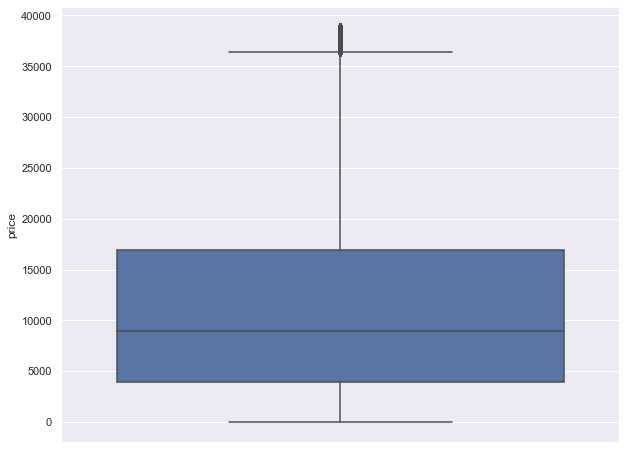

In [94]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.boxplot( y='price', data=clean_data)

## 2.5 Add some new features
To help with the follwing EDA work , I add three new columns 'odometer_class', 'price_class' and 'age', they may not be helpful for the prediction work, but can help me to analysis and understand the data directly.

In [107]:
#devide the odometer into three classes
class_div=(clean_data['odometer'].max()-clean_data['odometer'].min())//3
class1=clean_data['odometer'].min()+class_div
class2=class1+class_div
class3=class2+class_div

In [108]:
print(class_div)
print(class1)
print(class2)
print(class3)
print(clean_data['odometer'].min)

3333333.0
3333333.0
6666666.0
9999999.0
<bound method Series.min of 0          63500.0
1             10.0
3             10.0
5         120057.0
6          95484.0
            ...   
509572    103135.0
509573    108277.0
509574      6973.0
509575     37520.0
509576    152296.0
Name: odometer, Length: 493188, dtype: float64>


In [109]:
def odometer_class(n):
    if n<class1:
        return 'low odometer'
    if n>class1 and n<class2:
        return'medium odometer'
    else:
        return'high odometer'
clean_data['odometer_class']=clean_data['odometer'].apply(odometer_class)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [110]:
clean_data[['odometer_class','odometer','price']].head(10)

odometer_class  odometer  price
0    low odometer   63500.0  17899
1    low odometer      10.0      0
3    low odometer      10.0      0
5    low odometer  120057.0  13999
6    low odometer   95484.0  34500
7    low odometer   89340.0  14500
8    low odometer  226031.0  12500
9    low odometer  128153.0  34500
10   low odometer  168838.0   5900
11   low odometer  156385.0  16500

In [111]:
#devide the price into three levels
price_div=(clean_data['price'].max()-clean_data['price'].min())//3
price_class1=clean_data['price'].min()+price_div
price_class2=price_class1+price_div
price_class3=price_class2+price_div

In [112]:
print(clean_data['price'].max())
print(clean_data['price'].min())
print(price_div)
print(price_class1)
print(price_class2)
print(price_class3)


38895
0
12965
12965
25930
38895


In [113]:
def price_class(n):
    if n<price_class1:
        return 'low price'
    if n>price_class1 and n<price_class2:
        return'medium price'
    else:
        return'high price'
clean_data['price_class']=clean_data['price'].apply(price_class)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
clean_data['age']=2020-clean_data['year']

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
clean_data.head(5)

id          region  price  year manufacturer    model  condition  \
0  7034441763  salt lake city  17899  2012   volkswagen   golf r  excellent   
1  7034440610  salt lake city      0  2016         ford    f-150  excellent   
3  7034440546  salt lake city      0  2016         ford    f-150  excellent   
5  7034406582  salt lake city  13999  2009          ram  unknown  excellent   
6  7034405619  salt lake city  34500  2017         ford    f-350  excellent   

   odometer title_status transmission drive paint_color odometer_class  \
0   63500.0        clean       manual   4wd       black   low odometer   
1      10.0        clean    automatic   4wd     unknown   low odometer   
3      10.0        clean    automatic   4wd     unknown   low odometer   
5  120057.0        clean    automatic   4wd      silver   low odometer   
6   95484.0        clean    automatic   4wd       white   low odometer   

    price_class  age  
0  medium price    8  
1     low price    4  
3     low price    4  
5  medium price   11  
6    high price    3

In [116]:
clean_data.shape

(493188, 15)

# 3.visualization

In [771]:
clean_data.head(5)

id          region  price  year manufacturer    model  condition  \
0  7034441763  salt lake city  17899  2012   volkswagen   golf r  excellent   
1  7034440610  salt lake city   9377  2016         ford    f-150  excellent   
3  7034440546  salt lake city   9377  2016         ford    f-150  excellent   
5  7034406582  salt lake city  13999  2009          ram  unknown  excellent   
6  7034405619  salt lake city  34500  2017         ford    f-350  excellent   

    odometer title_status transmission drive paint_color   odometer_class  \
0  63,500.00        clean       manual   4wd       black     low odometer   
1      10.00        clean    automatic   4wd     unknown     low odometer   
3      10.00        clean    automatic   4wd     unknown     low odometer   
5 120,057.00        clean    automatic   4wd      silver  medium odometer   
6  95,484.00        clean    automatic   4wd       white     low odometer   

    price_class  age  
0  medium price    8  
1     low price    4  
3     low price    4  
5  medium price   11  
6    high price    3

## all manufacturers during the whole period
### year count

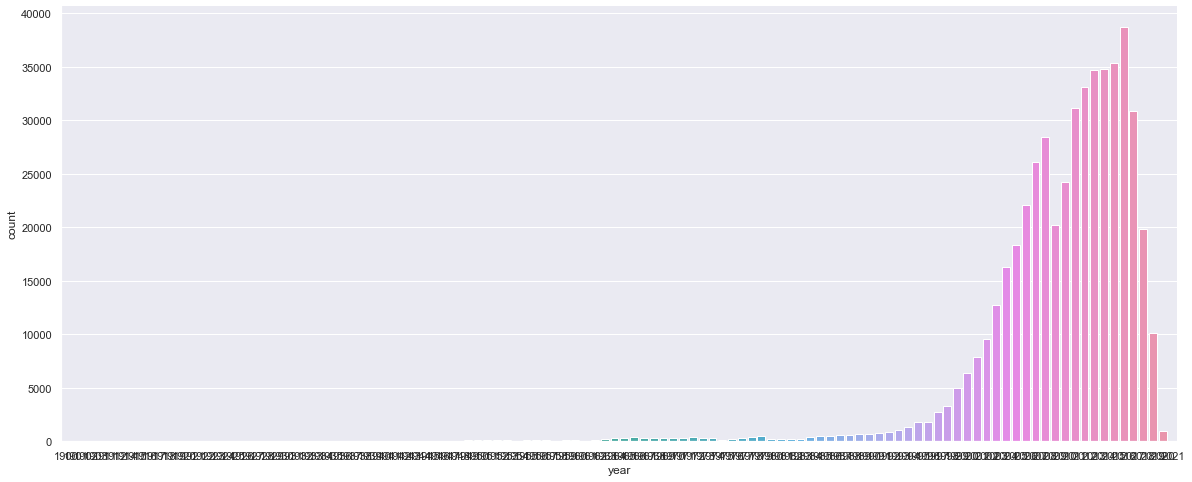

In [117]:
plt.figure(figsize=(20,8))
sns.set(font_scale=1)
sns.countplot(x='year',data=clean_data)
sns.despine()

### average odometer of each manufacturer 

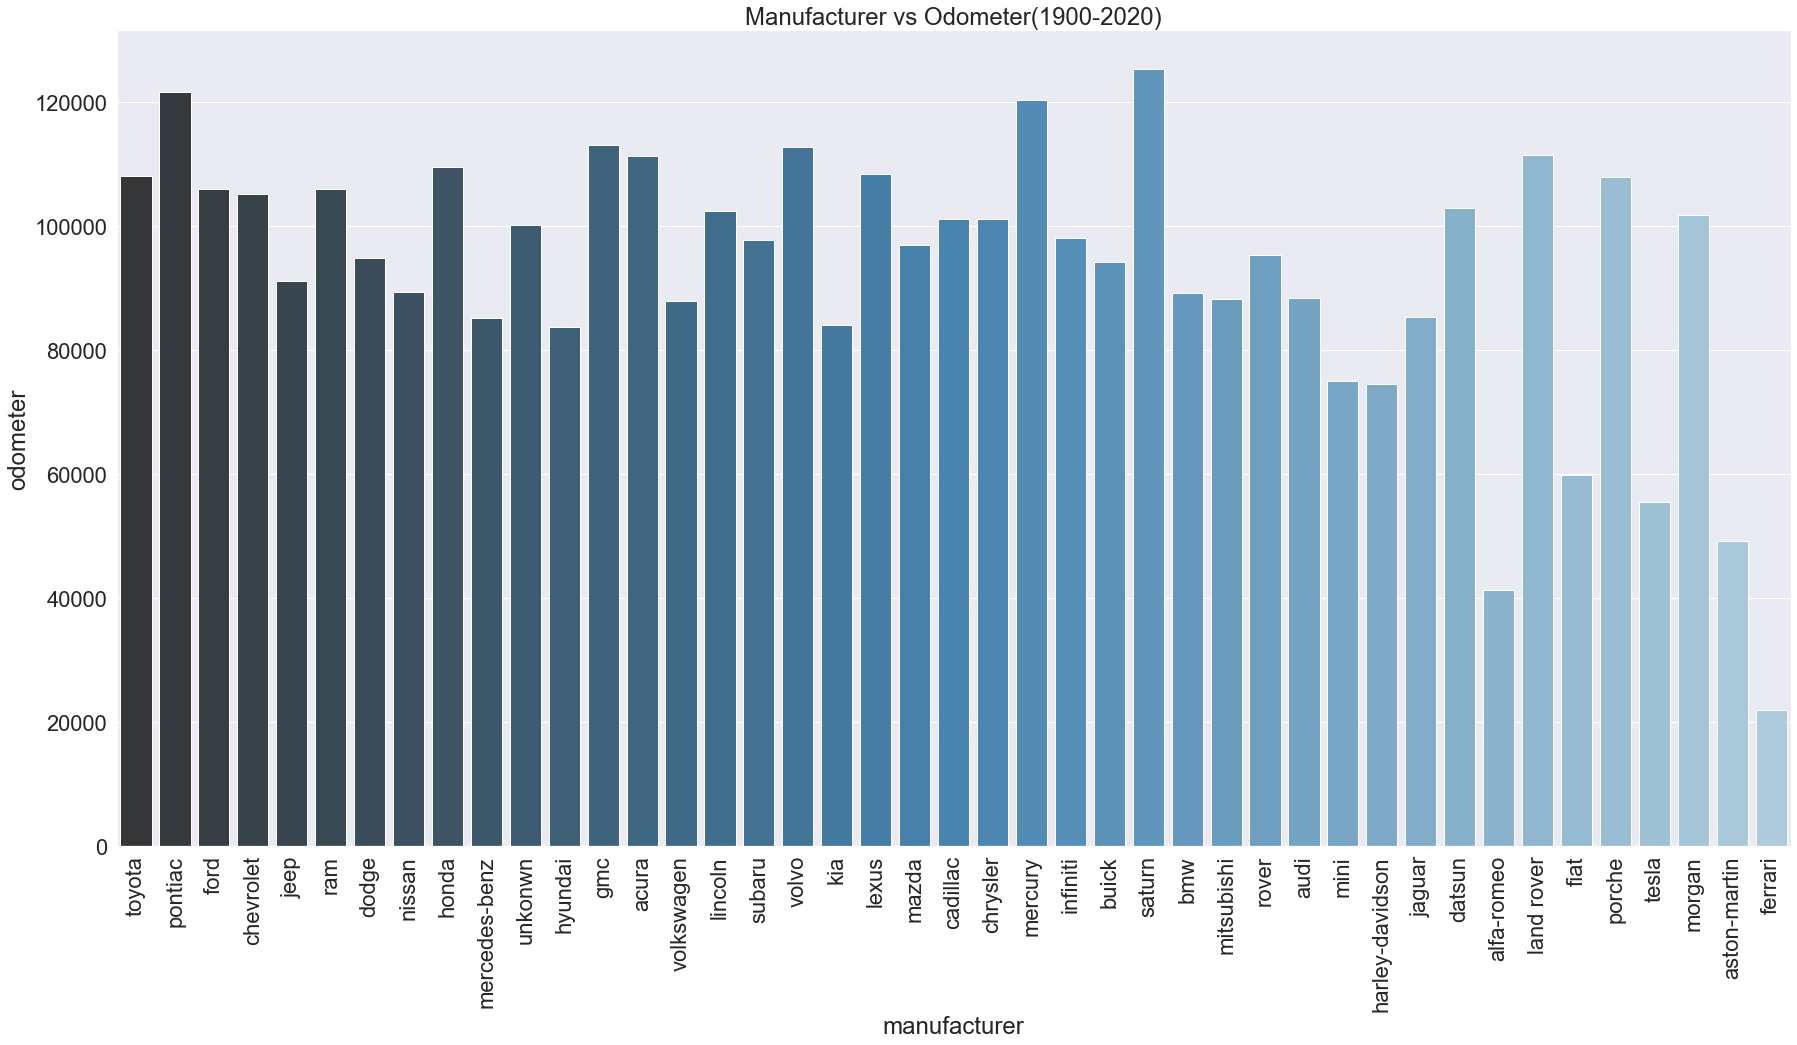

In [773]:
odometer_manufacturer=clean_data.sort_values(by=['odometer'],ascending=False)
plt.figure(figsize=(30,15))
sns.despine()
sns.set(font_scale=2)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Odometer')
plt.title('Manufacturer vs Odometer(1900-2020)')
sns.barplot(x=odometer_manufacturer.manufacturer, palette="Blues_d",y=odometer_manufacturer.odometer,ci=None)
plt.show()


From the bar chart we could know that **Saturn** have the most miles when they are on second-hand sale.

### average price of each manufacturer  

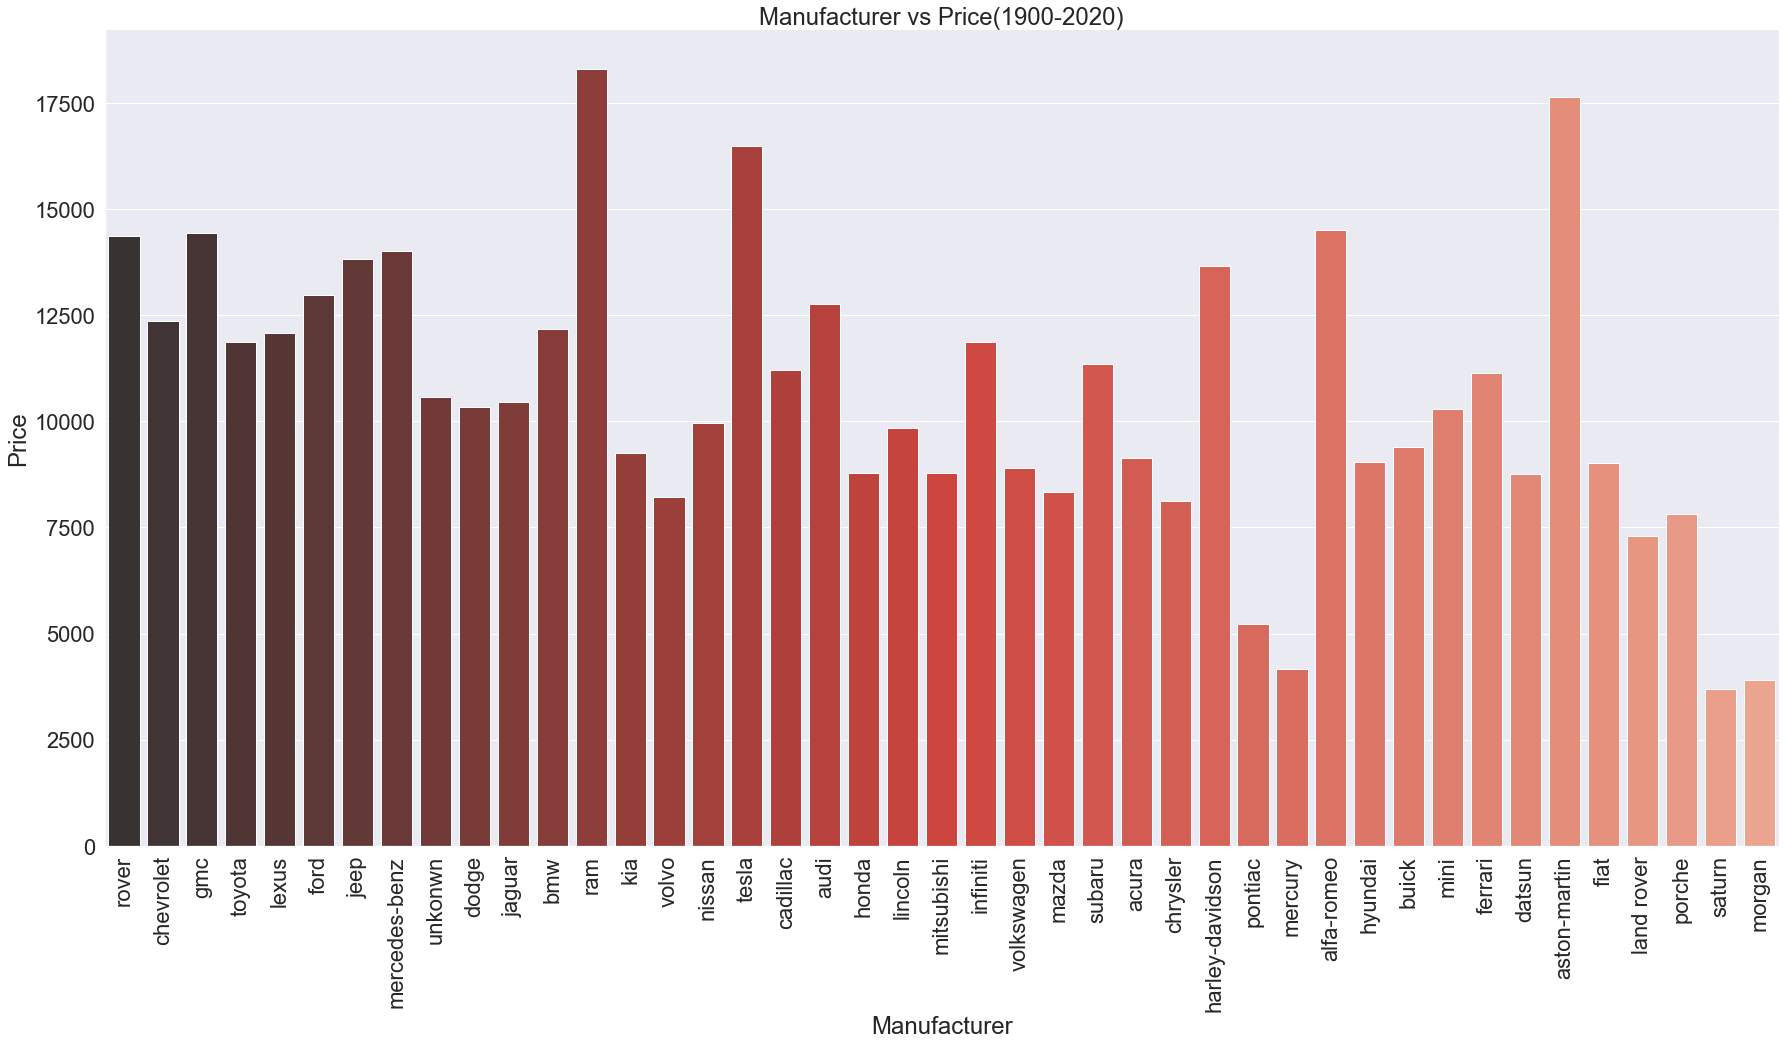

In [774]:
price_manufacturer=clean_data.sort_values(by=['price'],ascending=False)
plt.figure(figsize=(30,15))
sns.barplot(x=price_manufacturer.manufacturer, palette="Reds_d",y=price_manufacturer.price,ci=None)
sns.despine()
sns.set(font_scale=2)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.title('Manufacturer vs Price(1900-2020)')
plt.show()

We could know that among used cars, **ram** usually has the average highest price.

### condition and Price

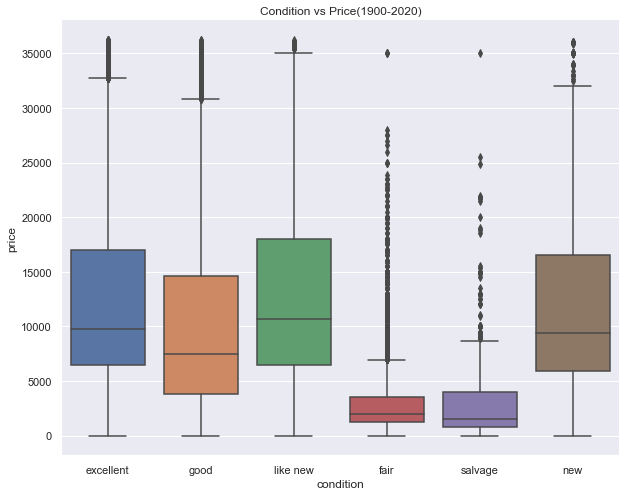

In [775]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.boxplot(x='condition',y='price',data=clean_data)
sns.despine()

plt.title('Condition vs Price(1900-2020)')
plt.show()

In [776]:
allcondition=clean_data.groupby('condition').price_class.value_counts(normalize=True)
allcondition

condition  price_class 
excellent  low price      0.60
           medium price   0.29
           high price     0.12
fair       low price      0.98
           medium price   0.02
           high price     0.00
good       low price      0.69
           medium price   0.25
           high price     0.07
like new   low price      0.56
           medium price   0.31
           high price     0.13
new        low price      0.67
           medium price   0.20
           high price     0.12
salvage    low price      0.96
           medium price   0.04
           high price     0.00
Name: price_class, dtype: float64

Text(0.5, 1.0, 'Condition vs Price Class(1900-2020)')

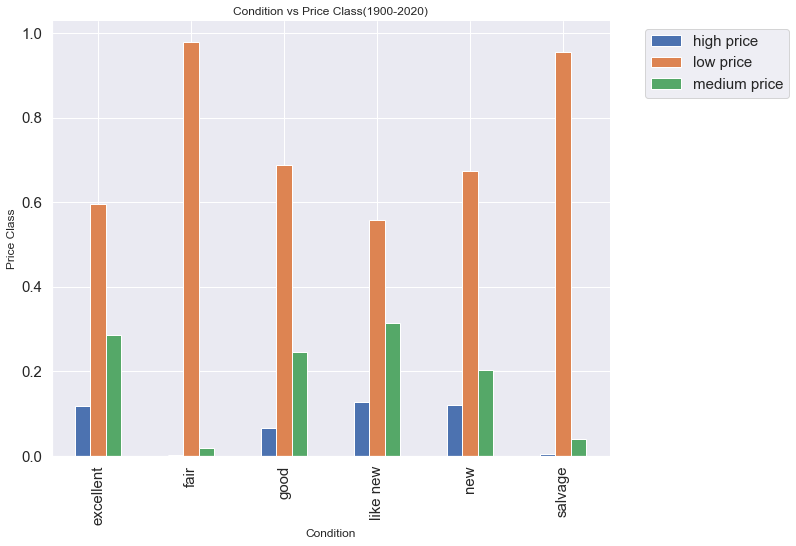

In [777]:
_=allcondition.unstack().plot(kind='bar',figsize=(10, 8),stacked=False,fontsize= 15)
_.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)
sns.despine()
sns.set(font_scale=1)
plt.xlabel('Condition')
plt.ylabel('Price Class')
plt.title('Condition vs Price Class(1900-2020)')

### Drive and Price

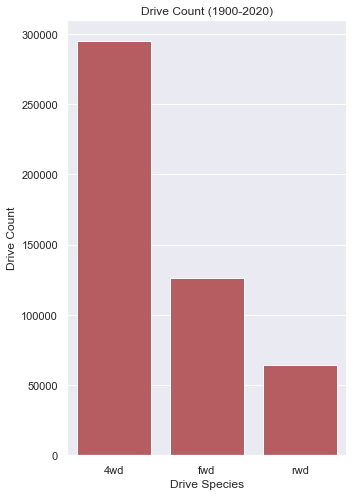

In [778]:
#Drive count
plt.figure(figsize=(5,8))
sns.countplot(x='drive',data=clean_data,color='r',order = clean_data['drive'].value_counts().index)
plt.xlabel('Drive Species')
plt.ylabel('Drive Count')
plt.title('Drive Count (1900-2020)')
plt.show()

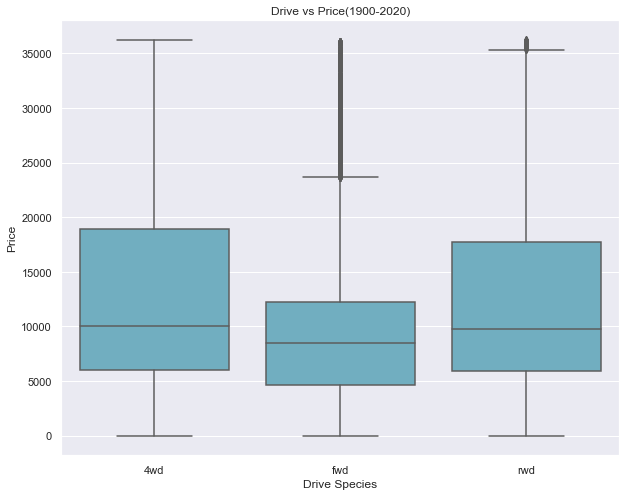

In [779]:
#Drive Species and Price
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.despine()
sns.boxplot(x='drive',y='price',data=clean_data,color='c')
plt.xlabel('Drive Species')
plt.ylabel('Price')
plt.title('Drive vs Price(1900-2020)')
plt.show()

### color  and Price

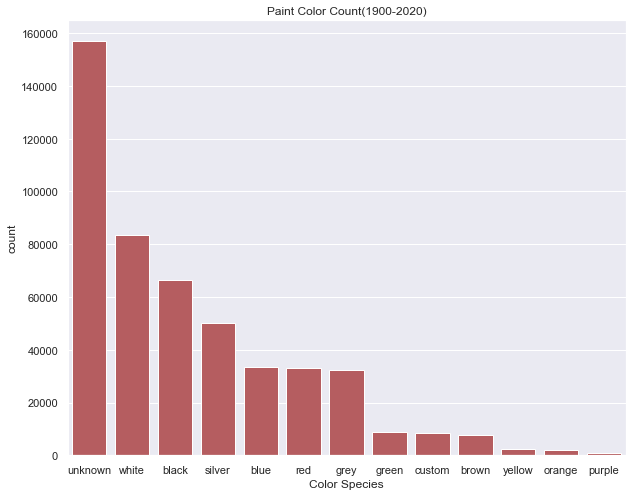

In [780]:
#Color count
plt.figure(figsize=(10,8)) 
sns.set(font_scale=1)
sns.despine()
sns.countplot(x='paint_color',data=clean_data,color='r',order = clean_data['paint_color'].value_counts().index)
plt.xlabel('Color Species')
plt.title('Paint Color Count(1900-2020)')
plt.show()



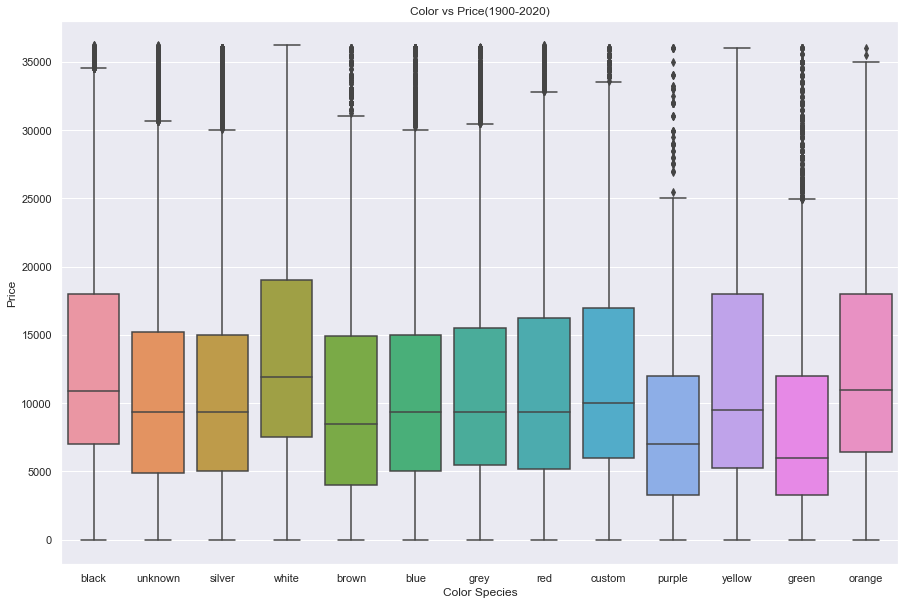

In [781]:
#Color count
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.despine()
sns.boxplot(x='paint_color',y='price',data=clean_data)
plt.xlabel('Color Species')
plt.ylabel('Price')
plt.title('Color vs Price(1900-2020)')
plt.show()

### relationship between price class and color

In [782]:
allcolor=clean_data.groupby('paint_color').price_class.value_counts(normalize=True)
allcolor

paint_color  price_class 
black        low price      0.55
             medium price   0.32
             high price     0.13
blue         low price      0.67
             medium price   0.26
             high price     0.07
brown        low price      0.69
             medium price   0.22
             high price     0.09
custom       low price      0.58
             medium price   0.31
             high price     0.11
green        low price      0.77
             medium price   0.17
             high price     0.06
grey         low price      0.65
             medium price   0.26
             high price     0.09
orange       low price      0.53
             medium price   0.35
             high price     0.12
purple       low price      0.75
             medium price   0.17
             high price     0.08
red          low price      0.63
             medium price   0.27
             high price     0.10
silver       low price      0.65
             medium price   0.26
             high

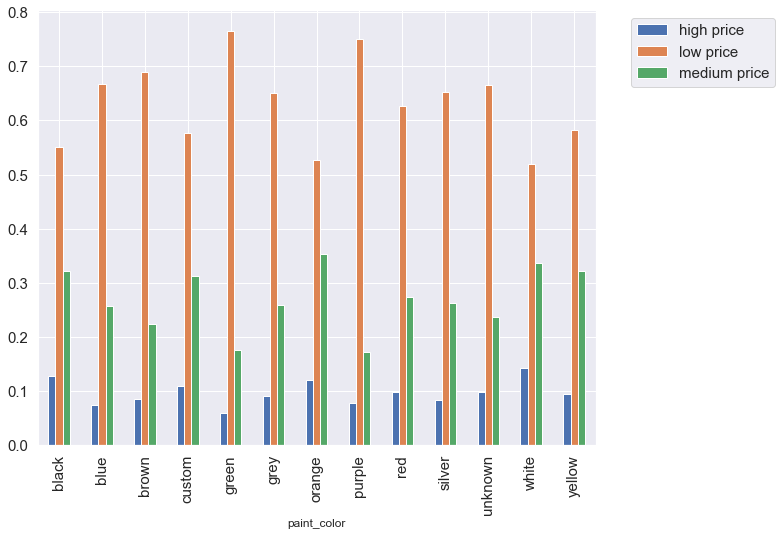

In [783]:
_=allcolor.unstack().plot(kind='bar',figsize=(10, 8),fontsize= 15)
_.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)


# all manufacturers of the past 20 years
### average price trend of  the past 20 years

In [784]:
all_20=clean_data.loc[(clean_data.year>2000)&(clean_data.year<2020)]
all_20_price=all_20.groupby('year').price.mean()

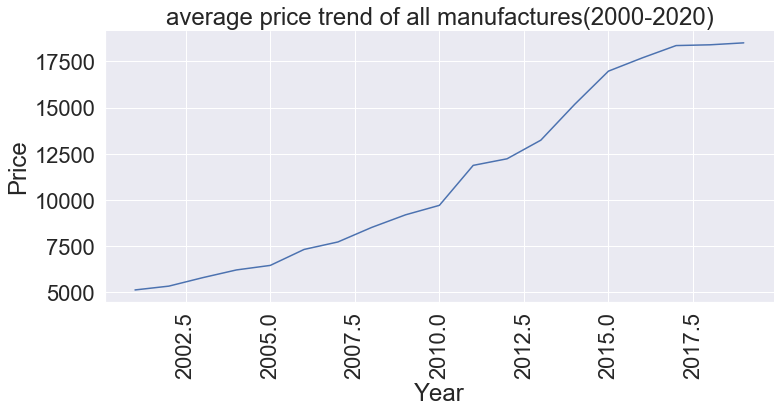

In [785]:
#the price trend
plt.figure(figsize=(12,5))
sns.set(font_scale=2)
sns.lineplot(data=all_20_price, ci=None)
sns.despine()
plt.title('average price trend of all manufactures(2000-2020)')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


# popular manufacturers Top 5 in the past 20 years
### price trend 

In [786]:
#get the the most popolar 5 manufacturers 
#the 5 most popular manufacturer in uesed car market are 'ford','chevrolet','toyota','nissan','honda'
twenty_year=clean_data.loc[(clean_data.year>2000)&(clean_data.year<2020)]
twenty_year['manufacturer'].value_counts().head(5)

ford         78741
chevrolet    62621
toyota       34662
nissan       25558
honda        24095
Name: manufacturer, dtype: int64

In [787]:
count=twenty_year['manufacturer'].value_counts(normalize='True').head(5)

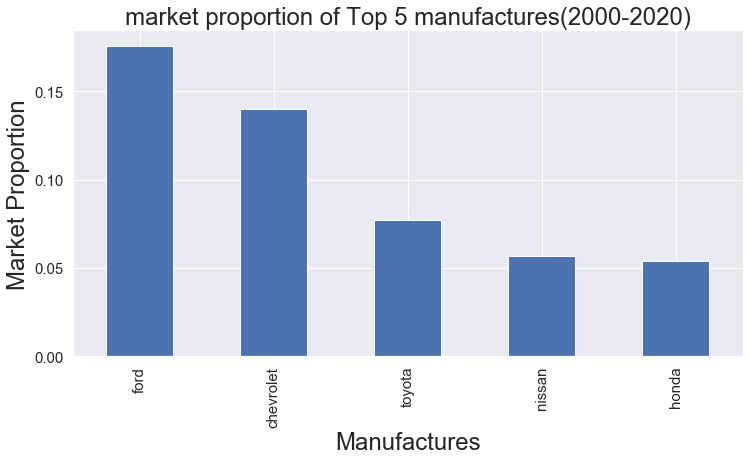

In [788]:
#the rank of market share of the 5 manufactures


sns.set(font_scale=2)
count.plot(kind='bar',figsize=(12, 6),fontsize= 15)
plt.title('market proportion of Top 5 manufactures(2000-2020)')
plt.xlabel('Manufactures')
plt.ylabel('Market Proportion')
plt.show()

In [789]:
#get the ford price trend
ford_out=twenty_year[twenty_year['manufacturer']=='ford']
ford_average=ford_out.pivot_table(ford_out,index=['year'],aggfunc=[np.mean])
ford_average.columns=[ 'ford_age','ford_id','ford_odometer','ford_price']

In [790]:
#get the chevrolet price trend
chevrolet_out=twenty_year[twenty_year['manufacturer']=='chevrolet']
chevrolet_average=chevrolet_out.pivot_table(chevrolet_out,index=['year'],aggfunc=[np.mean])
chevrolet_average.columns=['chevrolet_age','chevrolet_id','chevrolet_odometer','chevrolet_price']

In [791]:
#get the toyota price trend
toyota_out=twenty_year[twenty_year['manufacturer']=='toyota']
toyota_average=toyota_out.pivot_table(toyota_out,index=['year'],aggfunc=[np.mean])
toyota_average.columns=[ 'toyota_age','toyota_id','toyota_odometer','toyota_price']

In [792]:
#get the cnissan price trend
nissan_out=twenty_year[twenty_year['manufacturer']=='nissan']
nissan_average=nissan_out.pivot_table(nissan_out,index=['year'],aggfunc=[np.mean])
nissan_average.columns=[ 'nissan_age','nissan_id','nissan_odometer','nissan_price']

In [793]:
#get the honta price trend
honda_out=twenty_year[twenty_year['manufacturer']=='honda']
honda_average=honda_out.pivot_table(honda_out,index=['year'],aggfunc=[np.mean])
honda_average.columns=['honda_age','honda_id','honda_odometer','honda_price']

In [794]:
#concat the 5 data frame
car_price_concat = pd.concat([ford_average,chevrolet_average,toyota_average,nissan_average,honda_average], axis=1)
car_price_concat.head(5)

ford_age          ford_id  ford_odometer  ford_price  chevrolet_age  \
year                                                                        
2001        19 7,044,392,447.87     140,581.56    6,592.12             19   
2002        18 7,044,162,273.98     139,119.33    7,375.41             18   
2003        17 7,044,069,586.31     135,937.46    6,689.97             17   
2004        16 7,044,147,800.06     133,873.05    7,502.26             16   
2005        15 7,044,346,727.18     134,964.53    7,402.03             15   

         chevrolet_id  chevrolet_odometer  chevrolet_price  toyota_age  \
year                                                                     
2001 7,044,192,083.13          135,614.32         5,848.41          19   
2002 7,043,956,923.92          136,996.50         5,895.89          18   
2003 7,043,974,671.69          141,353.65         6,530.53          17   
2004 7,043,912,974.64          138,849.07         7,351.29          16   
2005 7,043,826,652.78          139,461.67         7,550.46          15   

            toyota_id  toyota_odometer  toyota_price  nissan_age  \
year                                                               
2001 7,044,822,531.92       154,978.86      4,500.07          19   
2002 7,044,795,004.18       156,105.38      4,917.87          18   
2003 7,044,863,189.41       145,517.83      5,278.19          17   
2004 7,044,705,387.25       149,030.82      5,753.05          16   
2005 7,044,795,102.75       146,578.72      6,338.09          15   

            nissan_id  nissan_odometer  nissan_price  honda_age  \
year                                                              
2001 7,044,844,332.65       133,279.38      3,230.26         19   
2002 7,044,869,770.23       145,476.28      3,585.10         18   
2003 7,044,251,445.28       130,099.74      4,160.82         17   
2004 7,044,942,140.45       132,869.84      4,706.07         16   
2005 7,044,442,583.64       132,903.68      4,541.58         15   

             honda_id  honda_odometer  honda_price  
year                                                
2001 7,045,209,339.14      144,391.53     2,835.74  
2002 7,045,060,651.81      146,196.79     3,037.56  
2003 7,044,495,759.79      151,838.05     3,442.59  
2004 7,044,503,872.26      147,962.91     3,890.27  
2005 7,044,727,480.96      147,293.52     4,122.48

In [795]:
car_price_concat.index.astype(int)

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='year')

In [796]:
#filter the year of past 20 years
car_price_trend=car_price_concat.loc[(car_price_concat.index>2000)&(car_price_concat.index<2020)]

In [797]:
car_price_trend.head(5)

ford_age          ford_id  ford_odometer  ford_price  chevrolet_age  \
year                                                                        
2001        19 7,044,392,447.87     140,581.56    6,592.12             19   
2002        18 7,044,162,273.98     139,119.33    7,375.41             18   
2003        17 7,044,069,586.31     135,937.46    6,689.97             17   
2004        16 7,044,147,800.06     133,873.05    7,502.26             16   
2005        15 7,044,346,727.18     134,964.53    7,402.03             15   

         chevrolet_id  chevrolet_odometer  chevrolet_price  toyota_age  \
year                                                                     
2001 7,044,192,083.13          135,614.32         5,848.41          19   
2002 7,043,956,923.92          136,996.50         5,895.89          18   
2003 7,043,974,671.69          141,353.65         6,530.53          17   
2004 7,043,912,974.64          138,849.07         7,351.29          16   
2005 7,043,826,652.78          139,461.67         7,550.46          15   

            toyota_id  toyota_odometer  toyota_price  nissan_age  \
year                                                               
2001 7,044,822,531.92       154,978.86      4,500.07          19   
2002 7,044,795,004.18       156,105.38      4,917.87          18   
2003 7,044,863,189.41       145,517.83      5,278.19          17   
2004 7,044,705,387.25       149,030.82      5,753.05          16   
2005 7,044,795,102.75       146,578.72      6,338.09          15   

            nissan_id  nissan_odometer  nissan_price  honda_age  \
year                                                              
2001 7,044,844,332.65       133,279.38      3,230.26         19   
2002 7,044,869,770.23       145,476.28      3,585.10         18   
2003 7,044,251,445.28       130,099.74      4,160.82         17   
2004 7,044,942,140.45       132,869.84      4,706.07         16   
2005 7,044,442,583.64       132,903.68      4,541.58         15   

             honda_id  honda_odometer  honda_price  
year                                                
2001 7,045,209,339.14      144,391.53     2,835.74  
2002 7,045,060,651.81      146,196.79     3,037.56  
2003 7,044,495,759.79      151,838.05     3,442.59  
2004 7,044,503,872.26      147,962.91     3,890.27  
2005 7,044,727,480.96      147,293.52     4,122.48

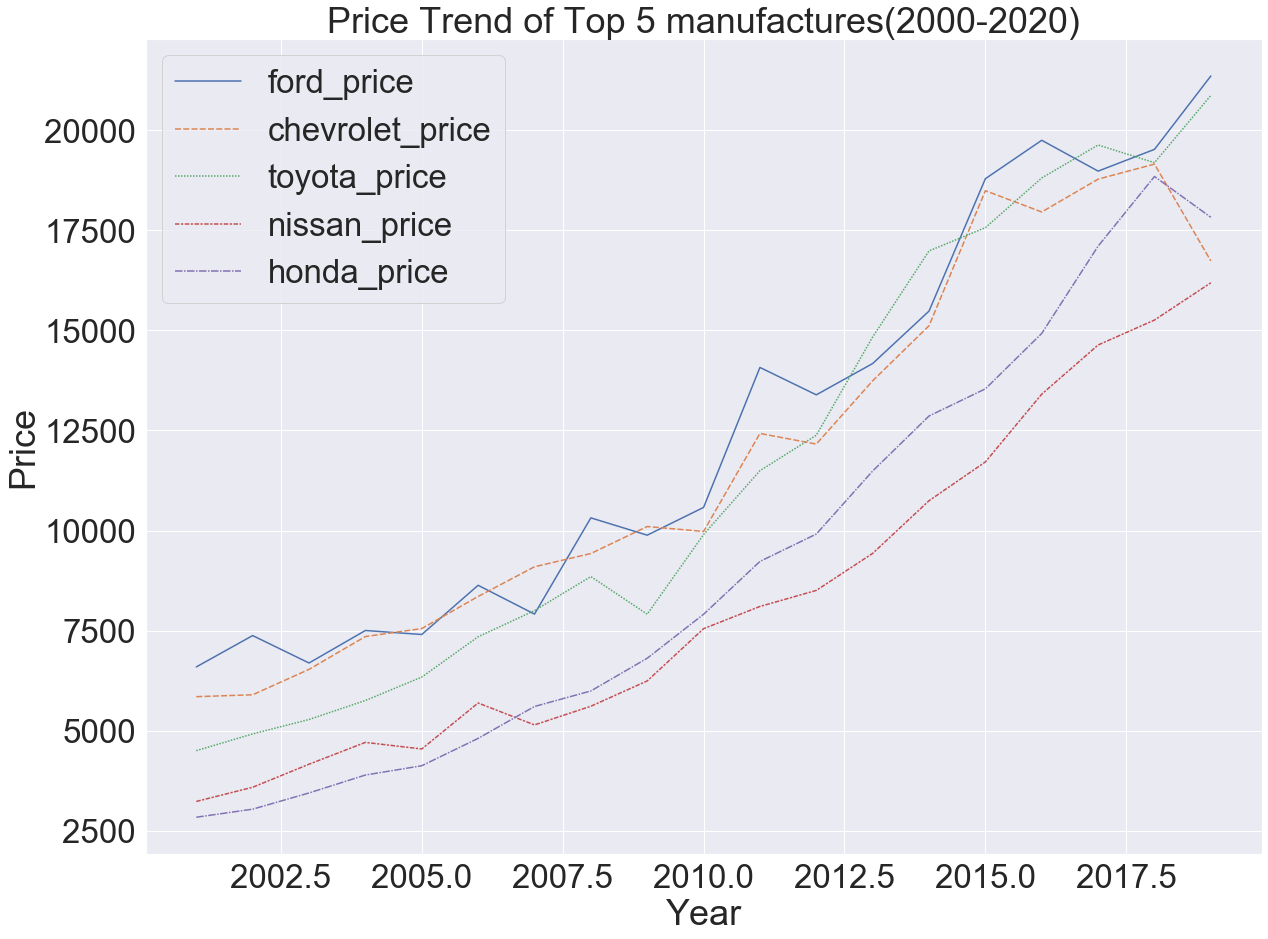

In [798]:
#line plot
dd=[car_price_trend['ford_price'],car_price_trend['chevrolet_price'],car_price_trend['toyota_price'],car_price_trend['nissan_price'],car_price_trend['honda_price']]
plt.figure(figsize=(20,15))
sns.set(font_scale=3)
sns.lineplot(data=dd)
plt.title('Price Trend of Top 5 manufactures(2000-2020)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

### Pick the most popular five manufacturers and compare their market shares in the past 20 years

In [799]:
#filter the year
five_car_20=clean_data[(clean_data['year']>2000)&(clean_data['year']<2020)]

In [800]:
five_car_20=pd.DataFrame(data=five_car_20)

In [801]:
#filter the manufacturers
five_car_20=five_car_20.loc[(five_car_20['manufacturer']=='ford')|(df['manufacturer']=='chevrolet')|(df['manufacturer']=='toyota')|(df['manufacturer']=='nissan')|(df['manufacturer']=='honda')]
five_car_20.head(5)

id          region  price  year manufacturer   model  condition  \
1   7034440610  salt lake city   9377  2016         ford   f-150  excellent   
3   7034440546  salt lake city   9377  2016         ford   f-150  excellent   
6   7034405619  salt lake city  34500  2017         ford   f-350  excellent   
8   7034404595  salt lake city  12500  2013         ford   f-250  excellent   
12  7034398060  salt lake city  14500  2007       toyota  tundra  excellent   

     odometer title_status transmission drive paint_color   odometer_class  \
1       10.00        clean    automatic   4wd     unknown     low odometer   
3       10.00        clean    automatic   4wd     unknown     low odometer   
6   95,484.00        clean    automatic   4wd       white     low odometer   
8  226,031.00        clean    automatic   4wd       white    high odometer   
12 135,287.00        clean    automatic   4wd     unknown  medium odometer   

     price_class  age  
1      low price    4  
3      low price    4  
6     high price    3  
8   medium price    7  
12  medium price   13

In [802]:
five_20_price=five_car_20.groupby('year').price.mean()

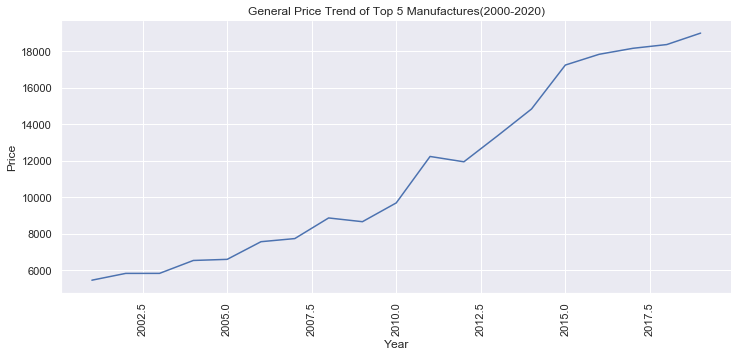

In [803]:
#price trend 
plt.figure(figsize=(12,5))
sns.set(font_scale=1)
sns.lineplot(data=five_20_price, ci=None)
sns.despine()
plt.title('General Price Trend of Top 5 Manufactures(2000-2020)')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


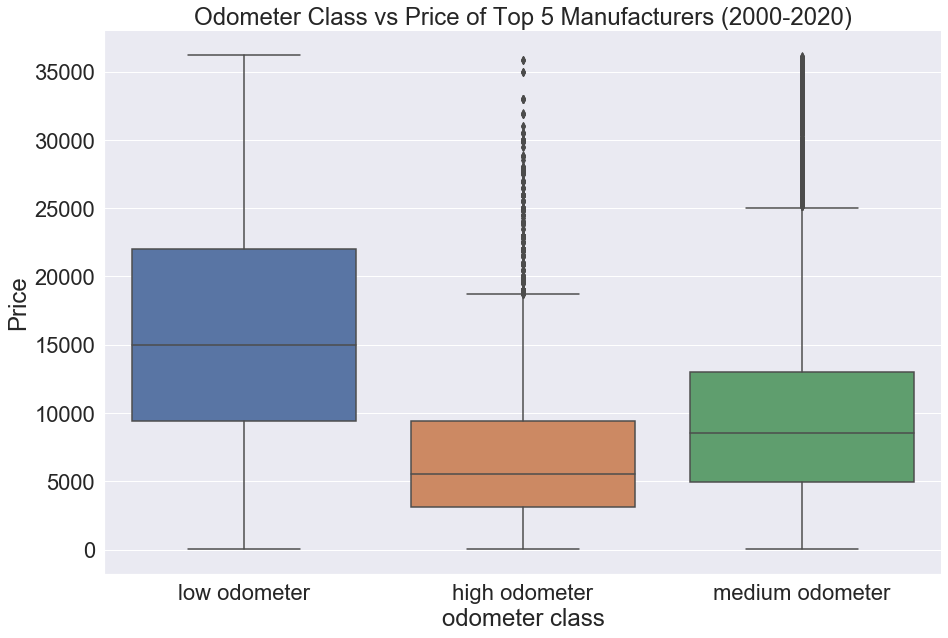

In [804]:
#odometer class and price
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.boxplot(x='odometer_class',y='price',data=five_car_20)
sns.despine()
plt.title('Odometer Class vs Price of Top 5 Manufacturers (2000-2020)')
plt.xlabel('odometer class')
plt.ylabel('Price')
plt.show()

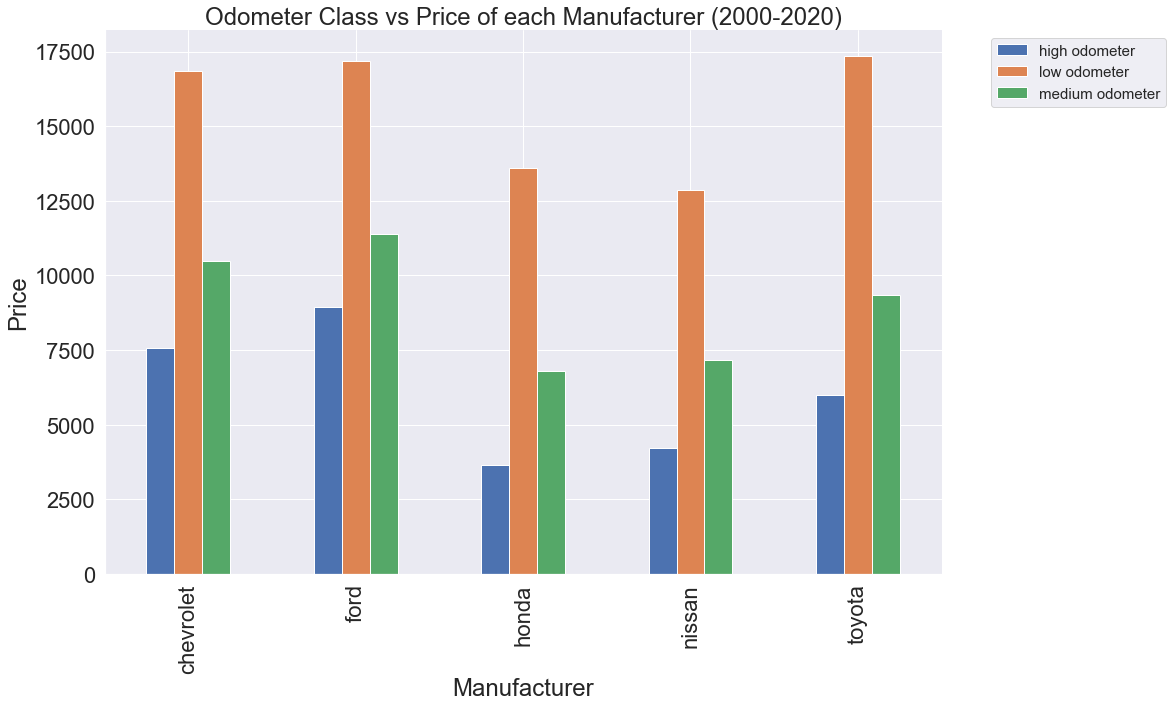

In [805]:
#odometer class and price and manufacturer
man_odo_pric_5_20=five_car_20.groupby(['manufacturer','odometer_class']).price.mean()
_=man_odo_pric_5_20.unstack().plot(kind='bar',figsize=(15,10),fontsize= 22)
_.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)
sns.despine()
plt.title('Odometer Class vs Price of each Manufacturer (2000-2020)')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

In [806]:
#price and manufacture
five_manu_price=five_car_20.groupby('manufacturer').price.mean()

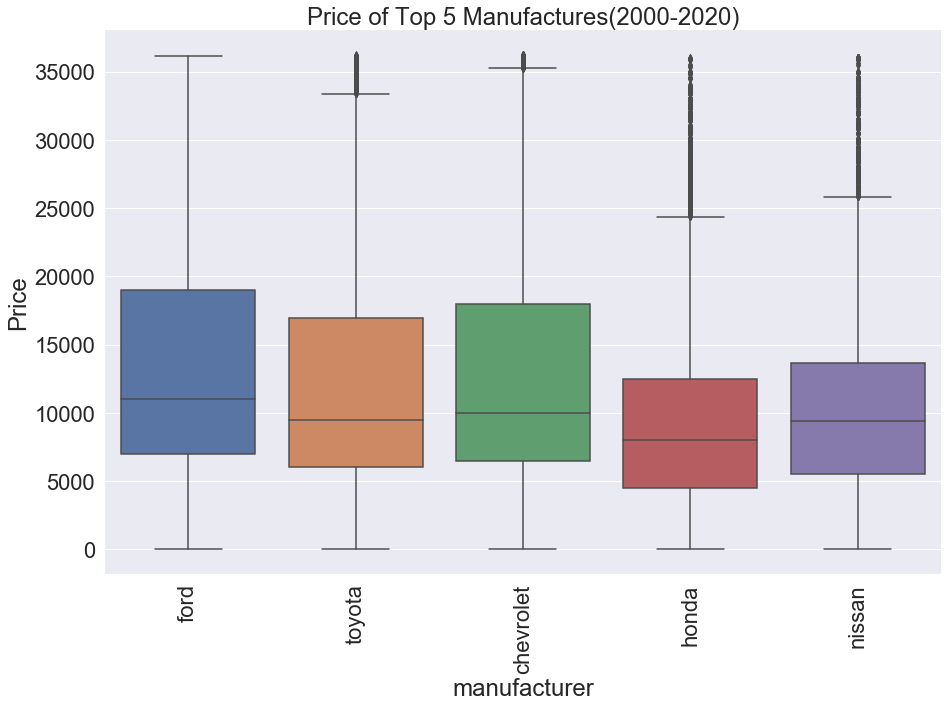

In [807]:
#price and manufacture
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.boxplot(x='manufacturer',y='price',data=five_car_20)
sns.despine()
plt.title('Price of Top 5 Manufactures(2000-2020)')
plt.xticks(rotation= 90)
plt.xlabel('manufacturer')
plt.ylabel('Price')
plt.show()


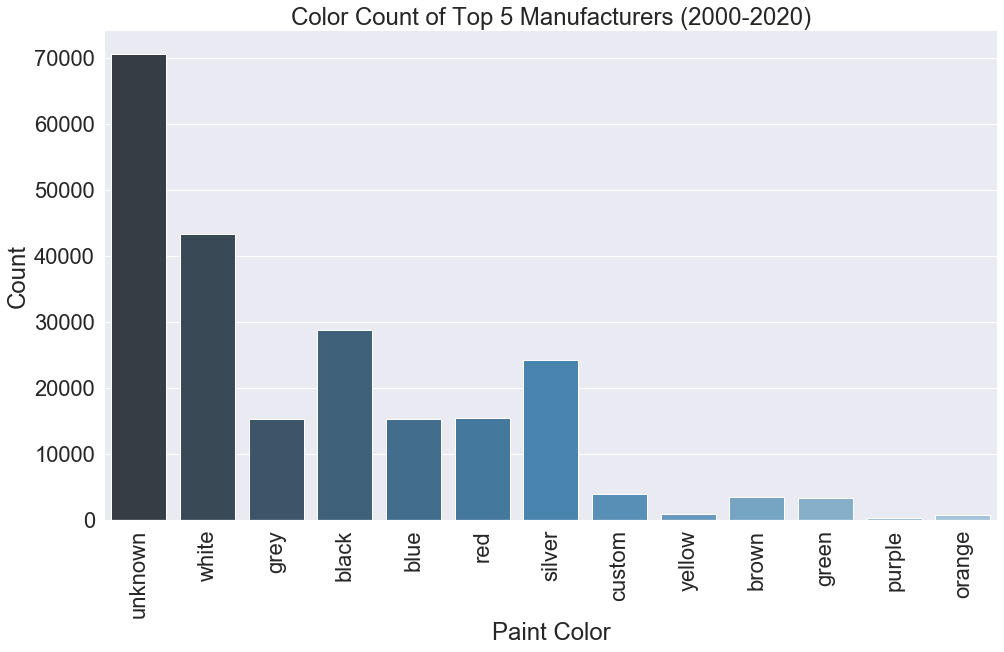

In [808]:
#price and Color
# condition counts
plt.figure(figsize=(16,9))
sns.set(font_scale=2)
sns.countplot(x='paint_color',data=five_car_20,palette="Blues_d")
sns.despine()
plt.title('Color Count of Top 5 Manufacturers (2000-2020)')
plt.xticks(rotation= 90)
plt.xlabel('Paint Color')
plt.ylabel('Count')
plt.show()

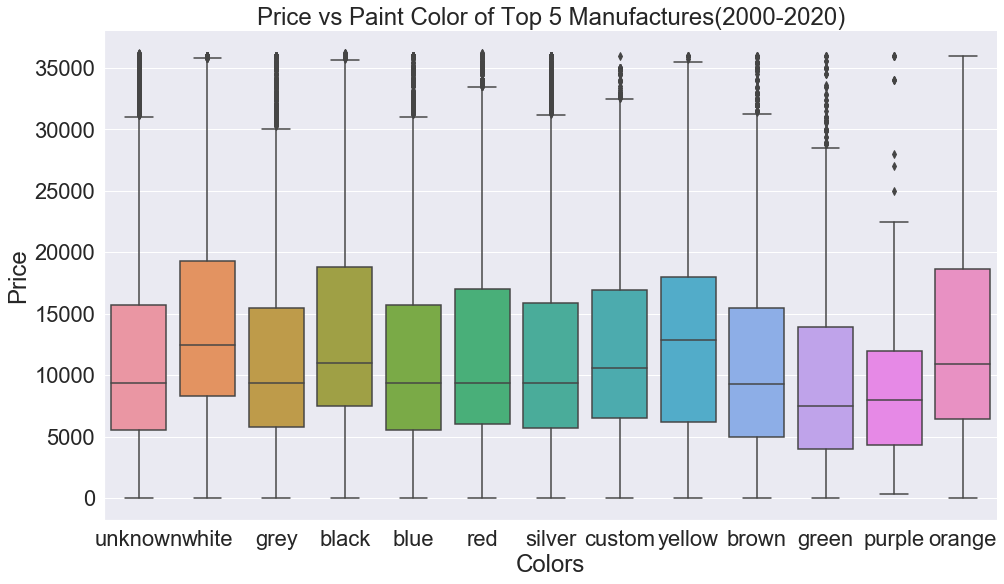

In [809]:
# color and price
plt.figure(figsize=(16,9))
sns.set(font_scale=2)
sns.boxplot(x='paint_color',y='price',data=five_car_20)
sns.despine()
plt.title('Price vs Paint Color of Top 5 Manufactures(2000-2020)')
plt.xlabel('Colors')
plt.ylabel('Price')
plt.show()

In [810]:
df2=five_car_20.groupby([ 'year','manufacturer']).size()

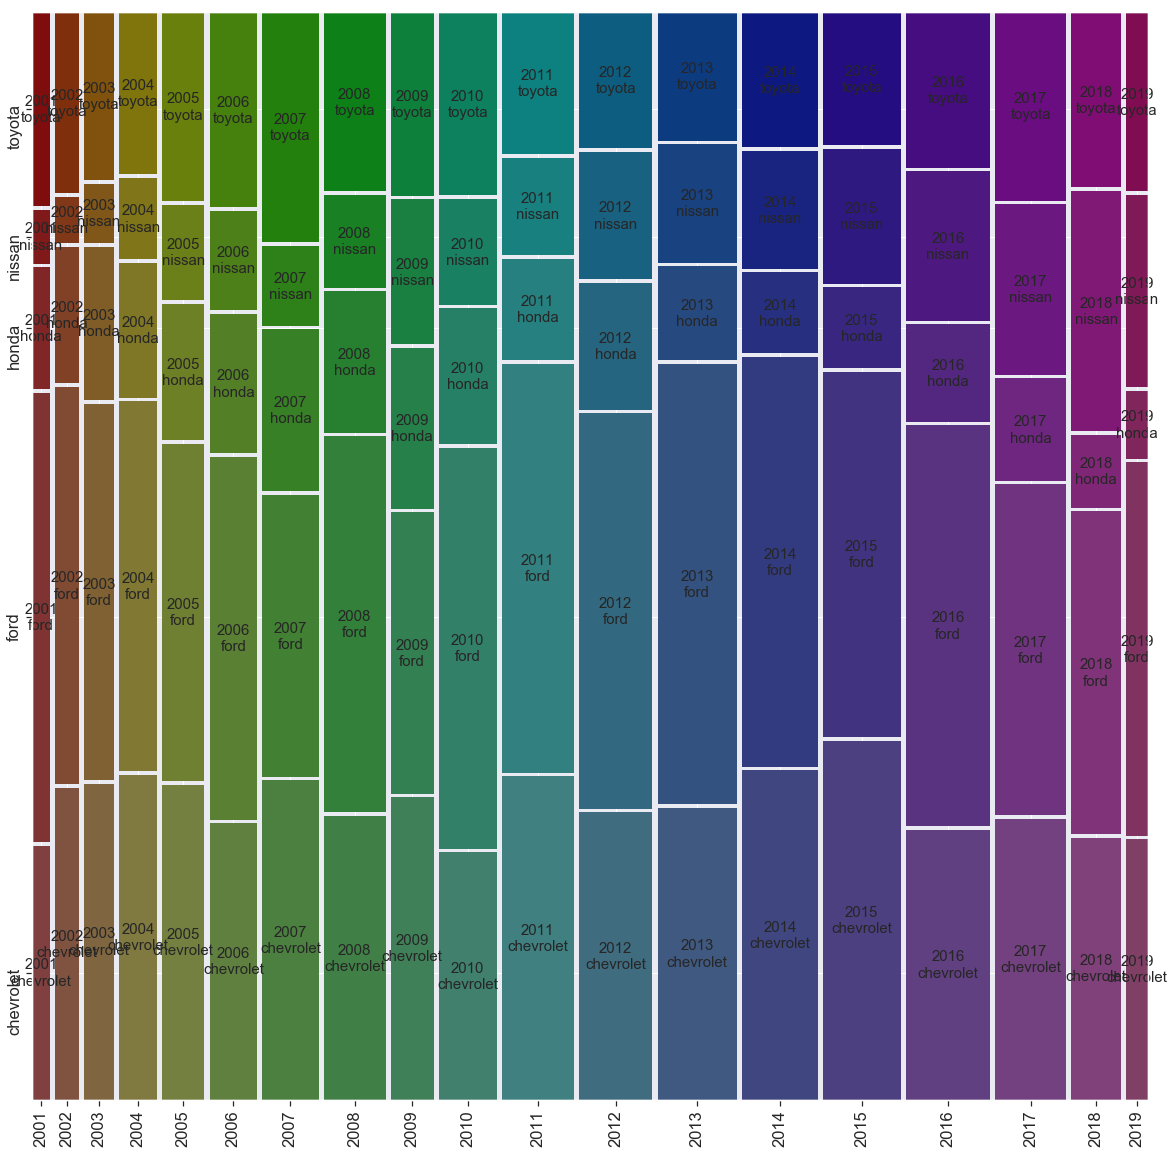

In [811]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize'] = [20, 20]
sns.set(font_scale=1.5)
mosaic(df2,gap=0.005, label_rotation=90.0)


plt.show()

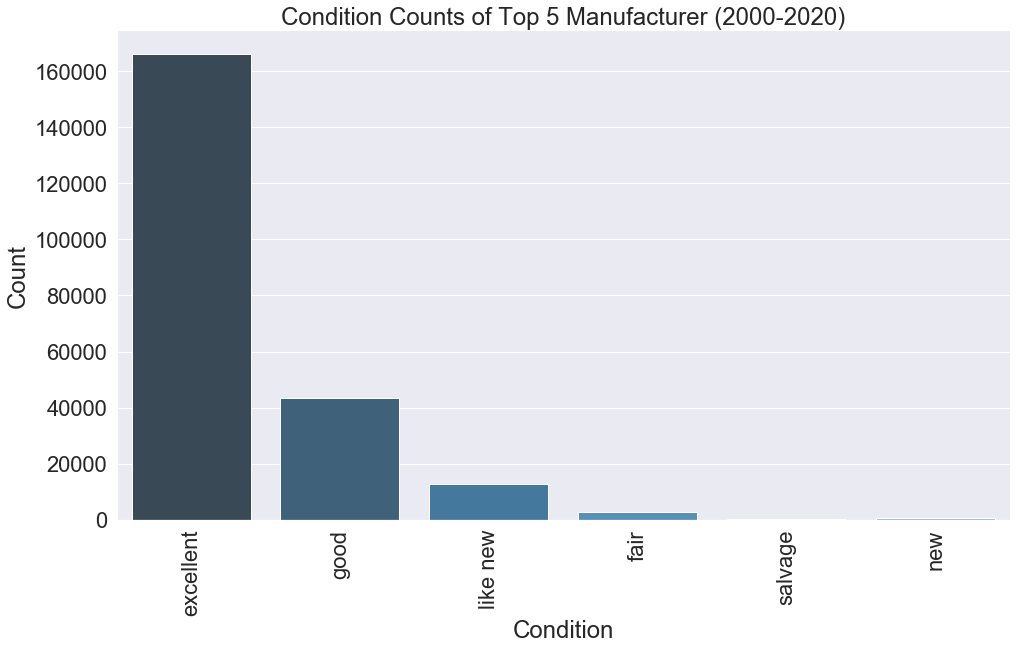

In [812]:
# condition counts
plt.figure(figsize=(16,9))
sns.set(font_scale=2)
sns.countplot(x='condition',data=five_car_20,palette="Blues_d")
sns.despine()
plt.title('Condition Counts of Top 5 Manufacturer (2000-2020)')
plt.xticks(rotation= 90)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

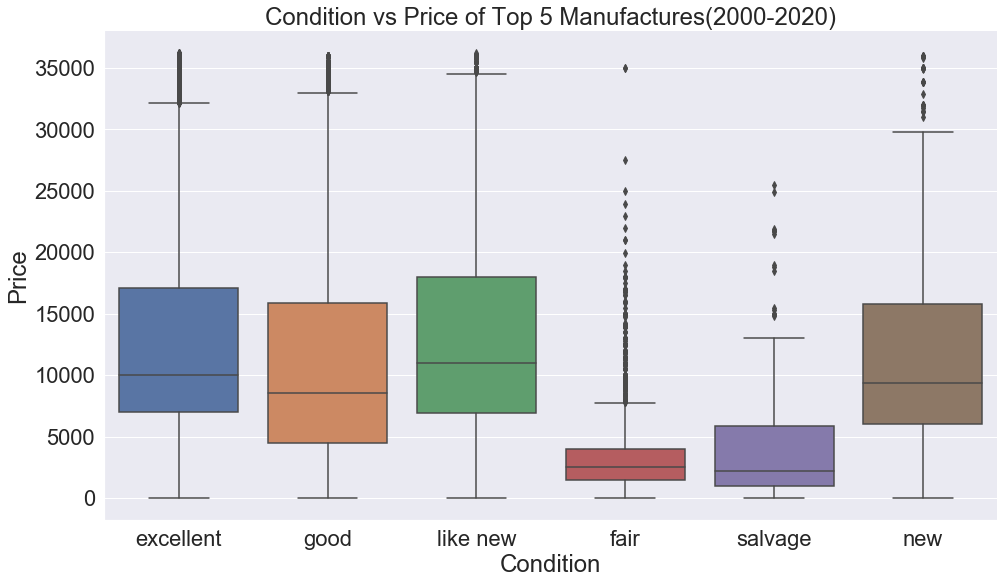

In [813]:
#price and condition
plt.figure(figsize=(16,9))
sns.set(font_scale=2)
sns.boxplot(x='condition',y='price',data=five_car_20)
sns.despine()
plt.title('Condition vs Price of Top 5 Manufactures(2000-2020)')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()


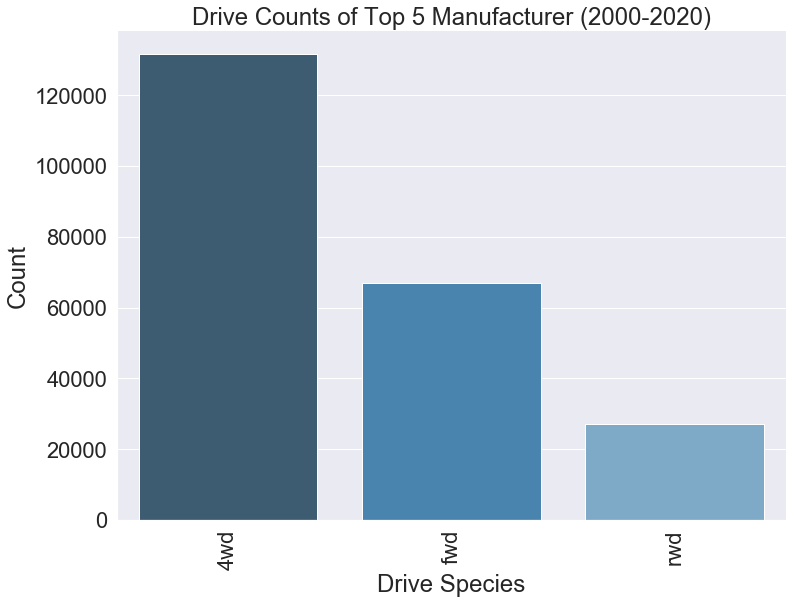

In [814]:
# Drive Counts
plt.figure(figsize=(12,9))
sns.set(font_scale=2)
sns.countplot(x='drive',data=five_car_20,palette="Blues_d")
sns.despine()
plt.title('Drive Counts of Top 5 Manufacturer (2000-2020)')
plt.xticks(rotation= 90)
plt.xlabel('Drive Species')
plt.ylabel('Count')
plt.show()

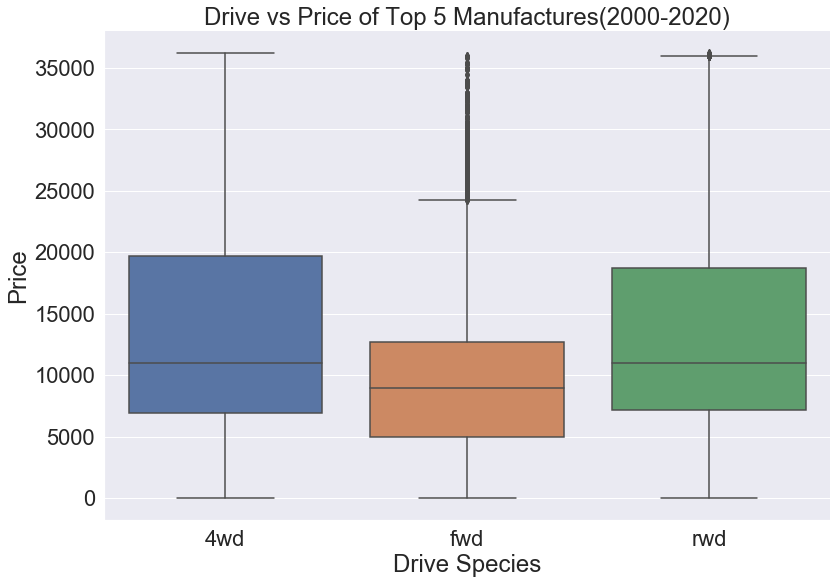

In [815]:
#price and Dive
plt.figure(figsize=(13,9))
sns.set(font_scale=2)
sns.boxplot(x='drive',y='price',data=five_car_20)
sns.despine()
plt.title('Drive vs Price of Top 5 Manufactures(2000-2020)')
plt.xlabel('Drive Species')
plt.ylabel('Price')
plt.show()

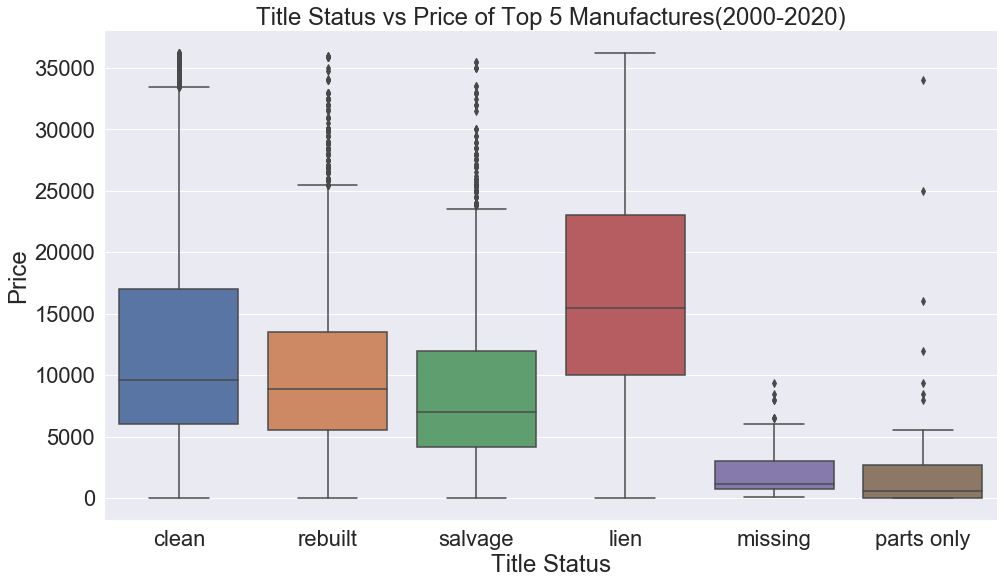

In [816]:
#price and title status
plt.figure(figsize=(16,9))
sns.set(font_scale=2)
sns.boxplot(x='title_status',y='price',data=five_car_20)
sns.despine()
plt.title('Title Status vs Price of Top 5 Manufactures(2000-2020)')
plt.xlabel('Title Status')
plt.ylabel('Price')
plt.show()

### Price distribution of the most popular five manufacturers in 2019 

In [817]:
#filter the year of 2019
five_car_2019=clean_data[clean_data['year']==2019]
five_car_2019.head(5)

#filter the manufacturers
five_car_2019=five_car_2019.loc[(five_car_2019['manufacturer']=='ford')|(five_car_2019['manufacturer']=='chevrolet')|(five_car_2019['manufacturer']=='toyota')|(five_car_2019['manufacturer']=='nissan')|(five_car_2019['manufacturer']=='honda')]
five_car_2019.head(5)

id          region  price  year manufacturer         model  \
72  7033356648  salt lake city  12495  2019       nissan        altima   
85  7033268169  salt lake city  26950  2019       nissan        armada   
92  7033242672  salt lake city   8995  2019       nissan        sentra   
97  7033228648  salt lake city  14800  2019    chevrolet       equinox   
98  7033226558  salt lake city   8995  2019    chevrolet  express 3500   

    condition  odometer title_status transmission drive paint_color  \
72  excellent 11,092.00        clean    automatic   fwd       black   
85  excellent  8,871.00        clean    automatic   4wd       black   
92  excellent 19,558.00        clean    automatic   fwd        blue   
97  excellent 10,868.00        clean    automatic   4wd       black   
98  excellent  7,974.00      salvage    automatic   rwd       white   

   odometer_class   price_class  age  
72   low odometer  medium price    1  
85   low odometer    high price    1  
92   low odometer     low price    1  
97   low odometer  medium price    1  
98   low odometer     low price    1

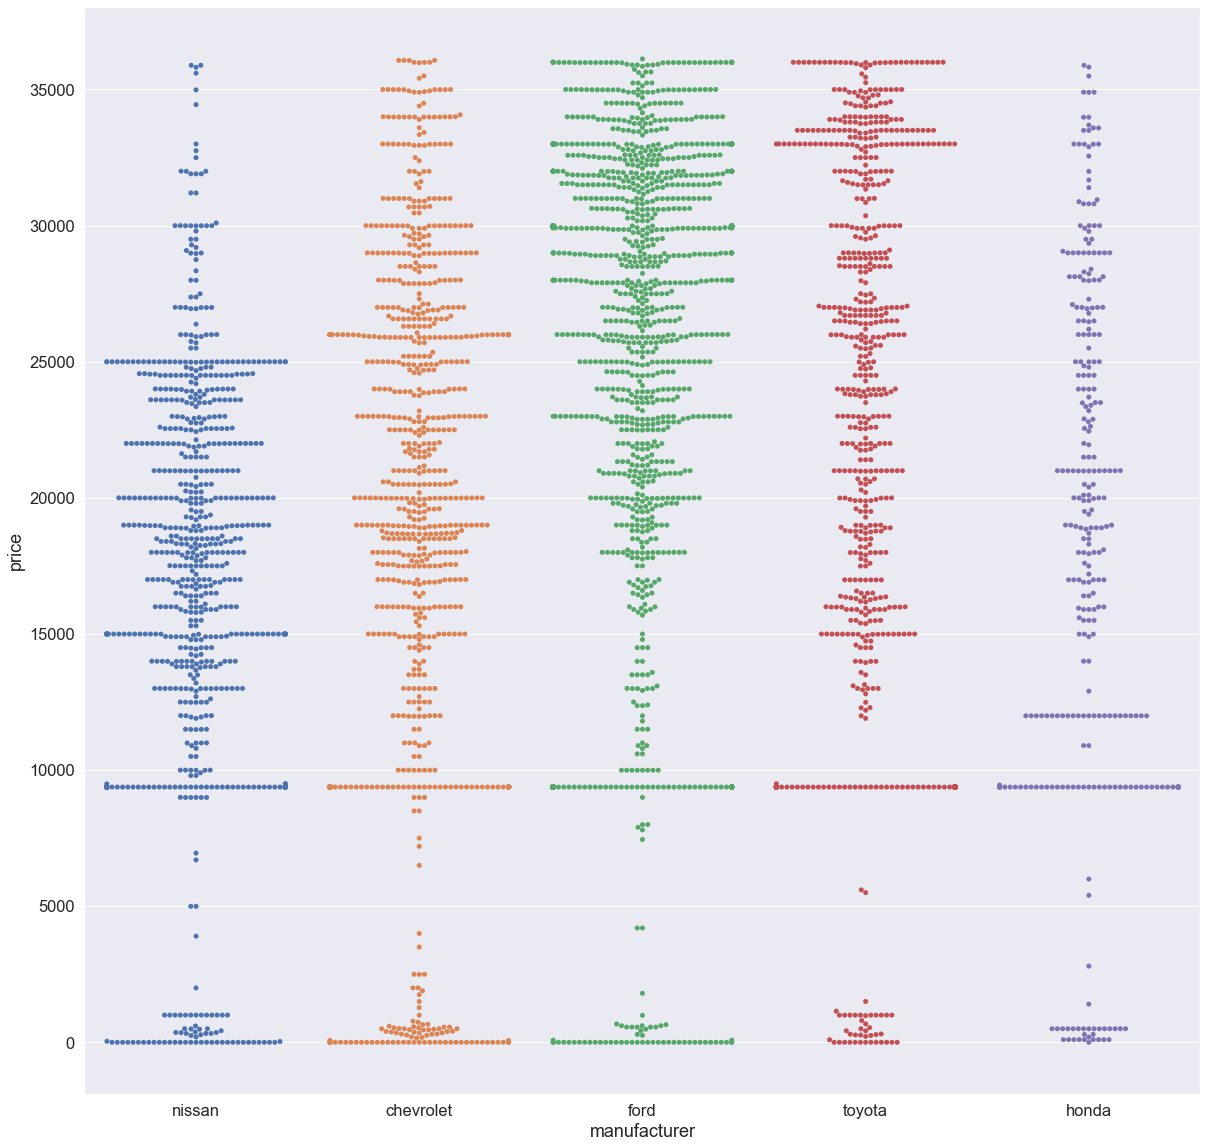

In [818]:
sns.set(font_scale=1.5)
sns.swarmplot(x= 'manufacturer',y='price',data=five_car_2019)

plt.show()

<Figure size 1440x1440 with 0 Axes>

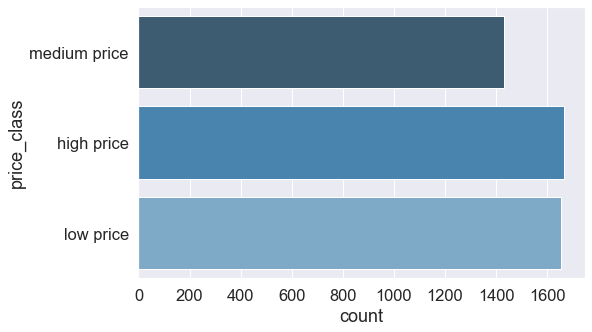

In [819]:
sns.set(font_scale=1.5)
sns.despine()
plt.figure(figsize=(8,5))
sns.countplot(y='price_class',data=five_car_2019,palette="Blues_d")
plt.show()

## analysis each manufacturer data of the past 20 years

In [820]:
# the data of past 20 years
data_20=clean_data.loc[(clean_data.year>2000)&(clean_data.year<2020)]
data_20.head(5)

id          region  price  year manufacturer    model  condition  \
0  7034441763  salt lake city  17899  2012   volkswagen   golf r  excellent   
1  7034440610  salt lake city   9377  2016         ford    f-150  excellent   
3  7034440546  salt lake city   9377  2016         ford    f-150  excellent   
5  7034406582  salt lake city  13999  2009          ram  unknown  excellent   
6  7034405619  salt lake city  34500  2017         ford    f-350  excellent   

    odometer title_status transmission drive paint_color   odometer_class  \
0  63,500.00        clean       manual   4wd       black     low odometer   
1      10.00        clean    automatic   4wd     unknown     low odometer   
3      10.00        clean    automatic   4wd     unknown     low odometer   
5 120,057.00        clean    automatic   4wd      silver  medium odometer   
6  95,484.00        clean    automatic   4wd       white     low odometer   

    price_class  age  
0  medium price    8  
1     low price    4  
3     low price    4  
5  medium price   11  
6    high price    3

In [821]:
# all the manufacturers
data_20['manufacturer']

0         volkswagen
1               ford
3               ford
5                ram
6               ford
             ...    
509572        nissan
509573           bmw
509574          jeep
509575       unkonwn
509576           ram
Name: manufacturer, Length: 448001, dtype: object

### * Ford data of past 20 years analysis

In [822]:
def price_20(name):
        name_data=data_20[data_20['manufacturer']==name]
        plt.figure(figsize=(10,5))
        sns.despine()
        sns.set(font_scale=1)
        plt.xticks(rotation= 90)
        plt.xlabel('Year')
        plt.ylabel('Price')
        plt.title('Year vs Price of Ford')
        sns.lineplot(x=name_data.year, y=name_data.price, ci=None)
        plt.show()

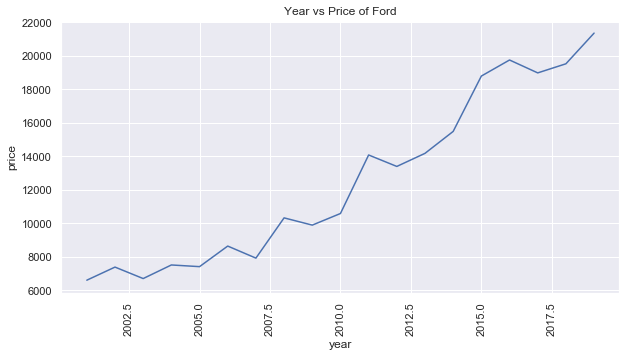

In [823]:
# ford price trend
price_20('ford')  

In [824]:
# get a function of paint color, model, condition, price class, odometer class
def manu_20(name):
        name_data=data_20[data_20['manufacturer']==name]
        plt.figure(figsize=(5, 5))
        d1=name_data.paint_color.value_counts()
        d2=name_data.model.value_counts(normalize=True).head(10)
        d3=name_data.condition.value_counts()
        d5=name_data.odometer_class.value_counts()
        d6=name_data.drive.value_counts()
        
        colors=['red','yellowgreen','lightskyblue','C0','C1']
        plt.figure(figsize=(15,15))
       
        plt.subplot(3,2,1);d1.plot(kind='bar',color=['C0','C1'],fontsize= 15);plt.title('paint color')
        plt.subplot(3,2,2);d2.plot(kind='bar',color=['C2','C3'],fontsize= 15);plt.title('model')
        plt.subplot(3,2,3);d3.plot(kind='bar',fontsize= 15)

        plt.subplot(3,2,5);d5.plot(kind='bar',fontsize= 15)
        plt.subplot(3,2,6);d6.plot(kind='bar',fontsize= 15)

       

<Figure size 360x360 with 0 Axes>

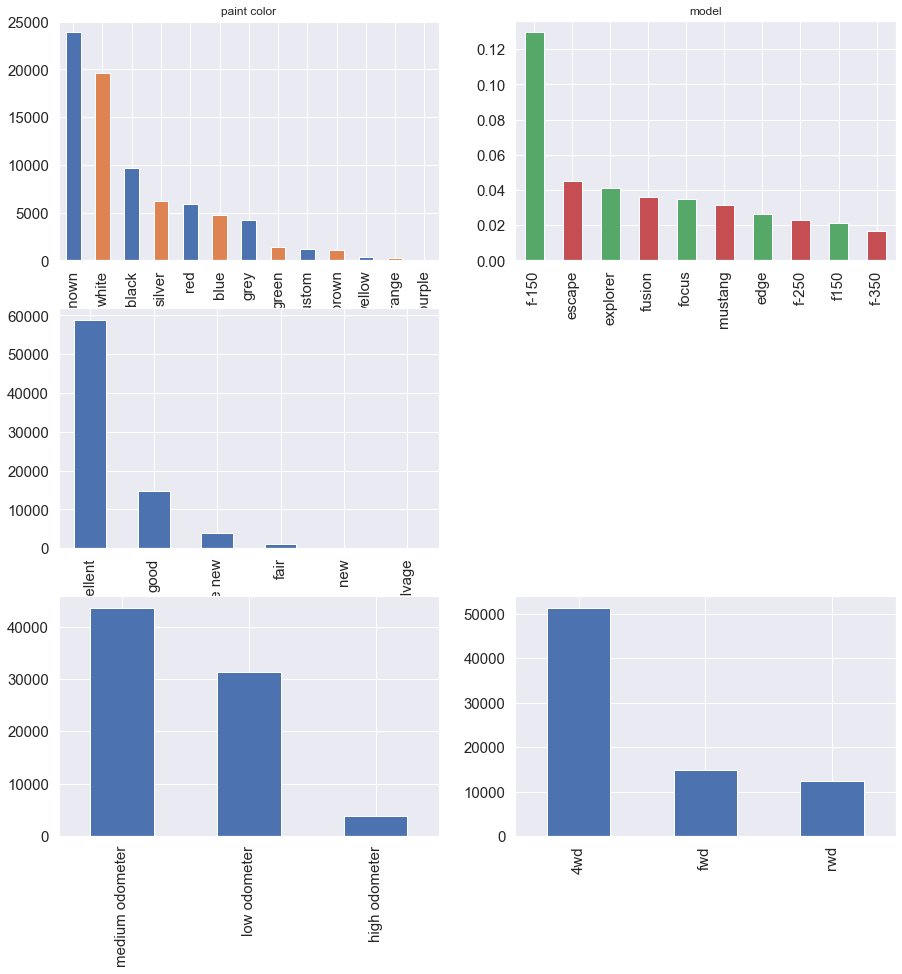

In [825]:
manu_20('ford')  

In [826]:
five_car_20_byprice=five_car_20.sort_values(by=['price'],ascending=False)

<Figure size 1440x1440 with 0 Axes>

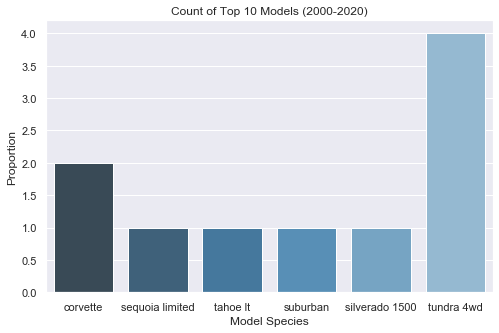

In [827]:
#Count of top 10 models


sns.set(font_scale=1)
sns.despine()
plt.figure(figsize=(8,5))
sns.countplot(x=five_car_20_byprice['model'].head(10),data=five_car_20,palette="Blues_d")
plt.title('Count of Top 10 Models (2000-2020)')
plt.xlabel('Model Species')
plt.ylabel('Proportion')
plt.show()

Text(0, 0.5, 'Price')

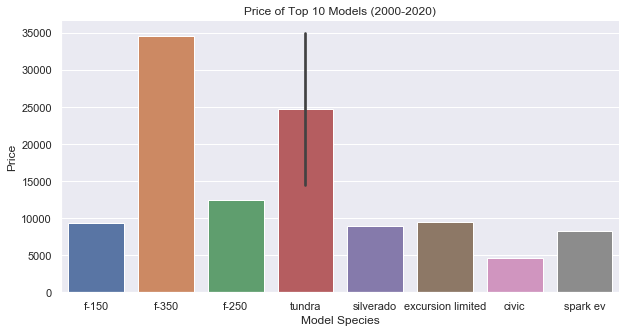

In [828]:
#Price of top 10 models
plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
sns.barplot(x=five_car_20['model'].head(10),y='price',data=five_car_20)
sns.despine()
plt.title('Price of Top 10 Models (2000-2020)')
plt.xlabel('Model Species')
plt.ylabel('Price')
 

In [829]:
# the distrubution of condition and price class
def by_condition_price(name):
    n=data_20[data_20['manufacturer']==name]
    n=n.groupby(['condition']).price_class.value_counts(normalize=True)
   
    _=n.unstack().plot(kind='bar',figsize=(8,10),fontsize= 15,title=('condition'))
    _.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)

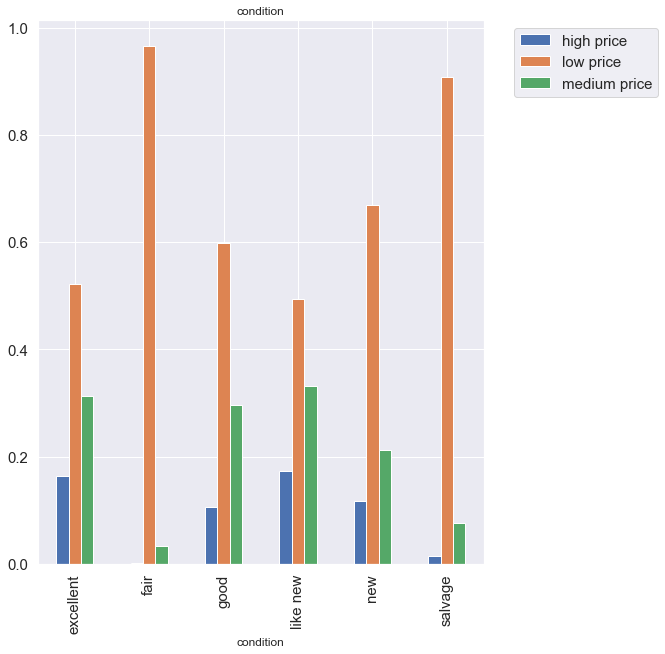

In [830]:
by_condition_price('ford')


In [831]:
# the distrubution of condition, price class and odometer
def by_condition_odometer_price(name):
    n=data_20[data_20['manufacturer']==name]
    n=n.groupby(['condition','odometer_class']).price_class.value_counts(normalize=True)
    _=n.unstack().plot(kind='bar',stacked=False,figsize=(8,10),fontsize= 15,title=('condition'))
    _.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)

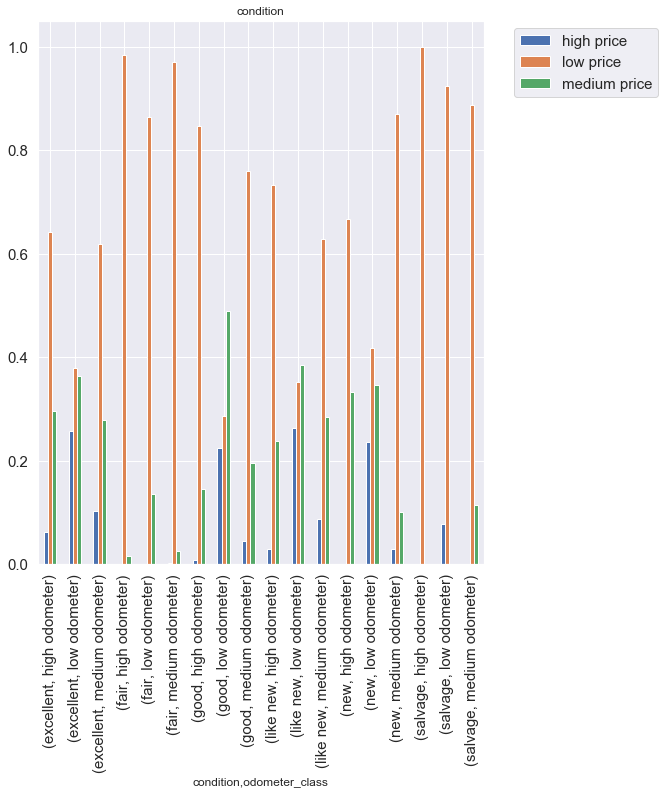

In [832]:
by_condition_odometer_price('ford')

In [833]:
# the price trend
def price_model_20(name):
        name_data=data_20[data_20['model']==name]
        plt.figure(figsize=(10,5))
        sns.despine()
        sns.set(font_scale=1)
        plt.xticks(rotation= 90)
        plt.xlabel('Year')
        plt.ylabel('Price')
        plt.title('Year vs Price of F-150' )
        sns.lineplot(x=name_data.year, y=name_data.price, ci=None)
        plt.show()

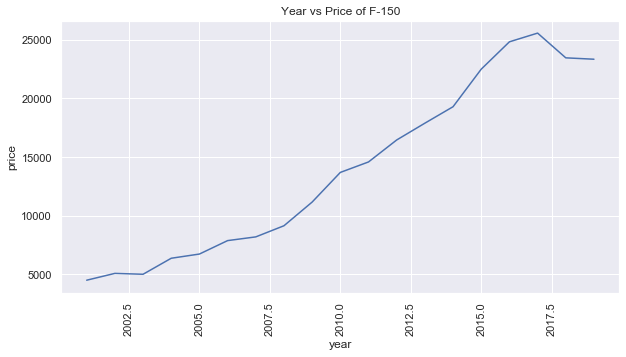

In [834]:
price_model_20('f-150')

In [835]:
# the data of one model
def model_20(name):
        name_data=data_20[data_20['model']==name]
        plt.figure(figsize=(5, 5))
        t1=name_data.condition.value_counts()
        t2=name_data.price_class.value_counts()
        t3=name_data.odometer_class.value_counts()
        
  
        plt.figure(figsize=(15,15))
       
        plt.subplot(2,2,1);t1.plot(kind='bar',fontsize= 15)
        plt.subplot(2,2,2);t2.plot(kind='bar',fontsize= 15)
        plt.subplot(2,2,3);t3.plot(kind='bar',fontsize= 15)

<Figure size 360x360 with 0 Axes>

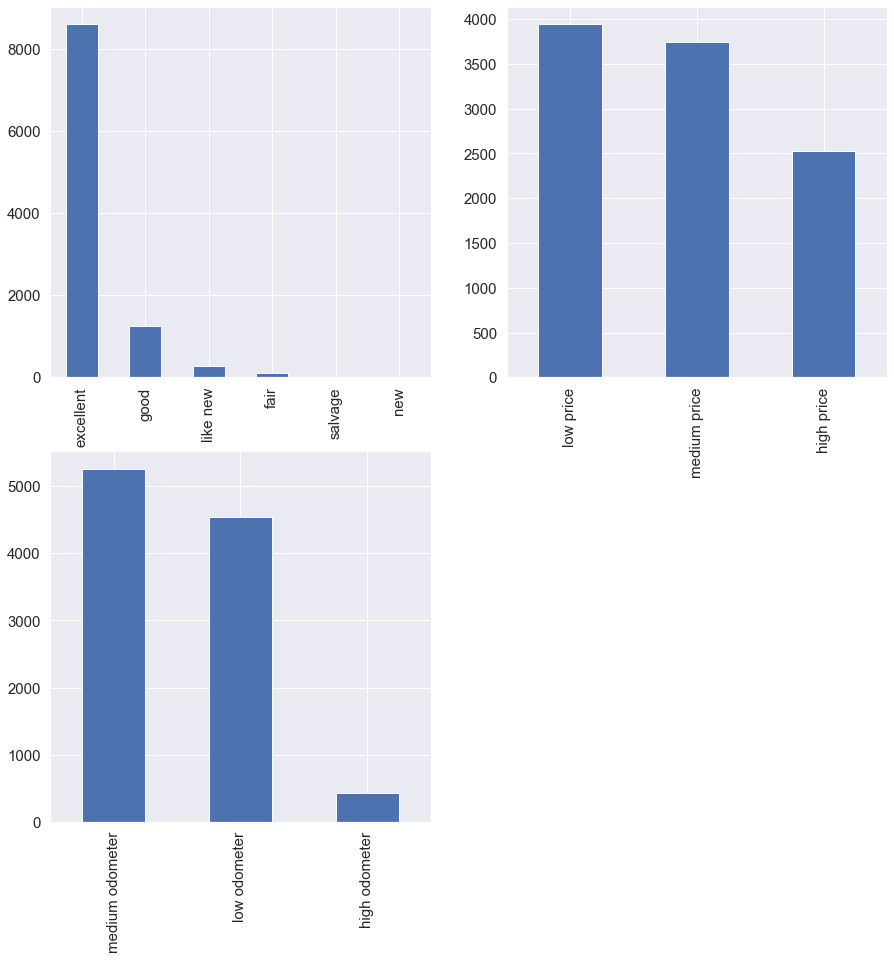

In [836]:
model_20('f-150')

### * chevrolet data of past 20 years analysis

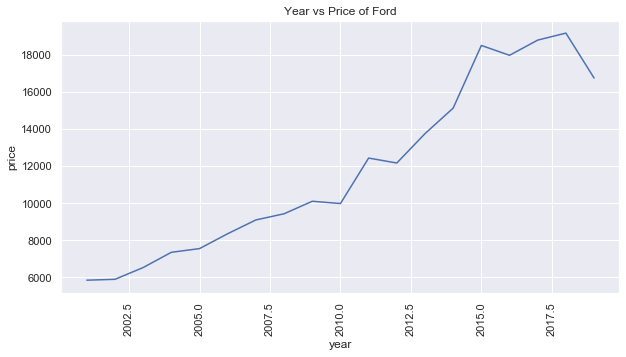

<Figure size 360x360 with 0 Axes>

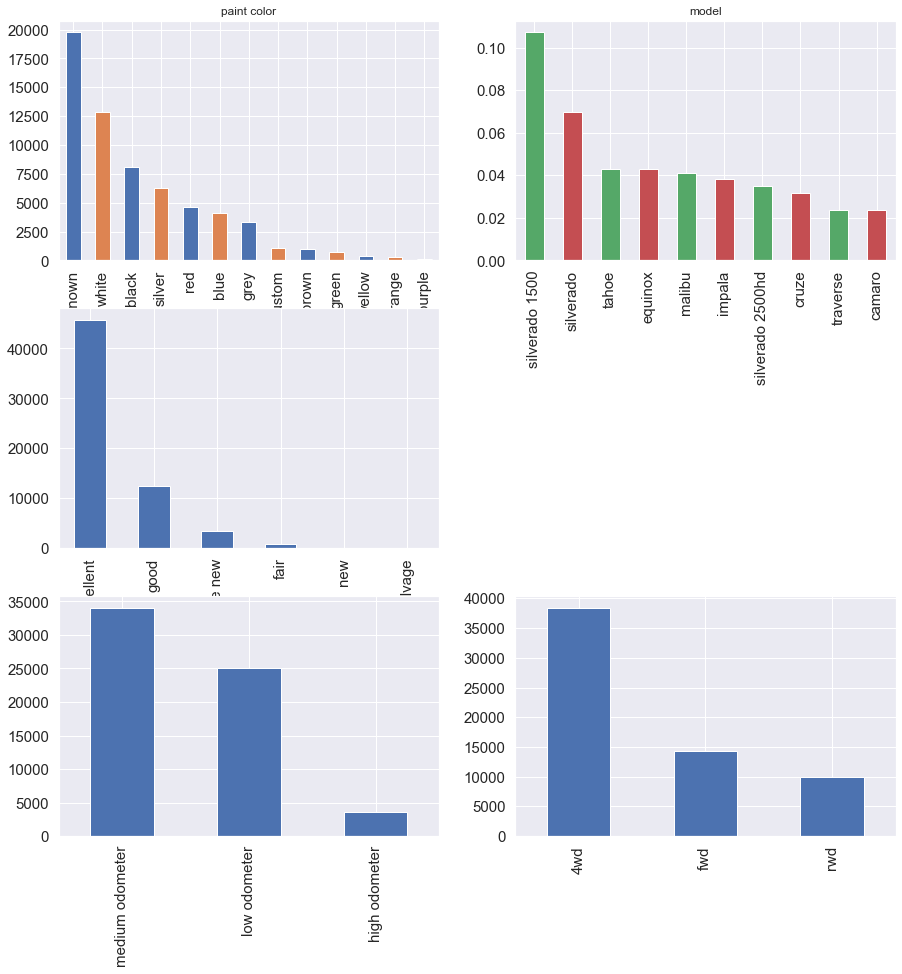

In [837]:
price_20('chevrolet') 
manu_20('chevrolet')

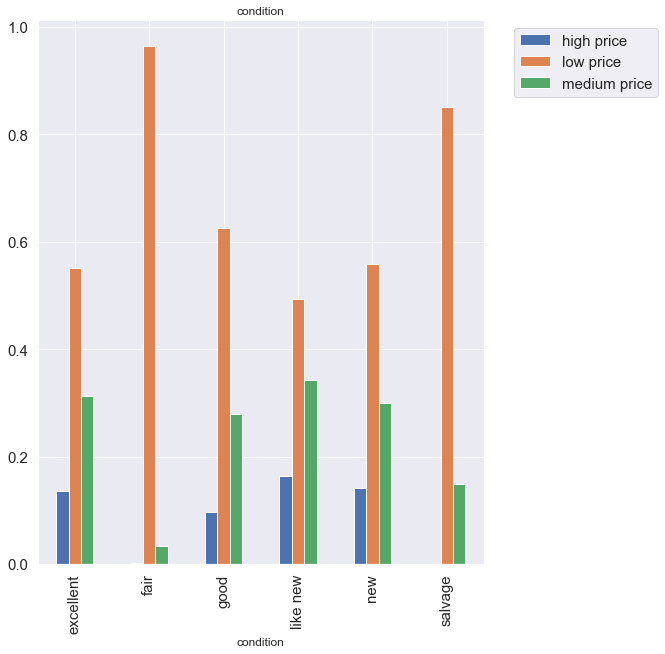

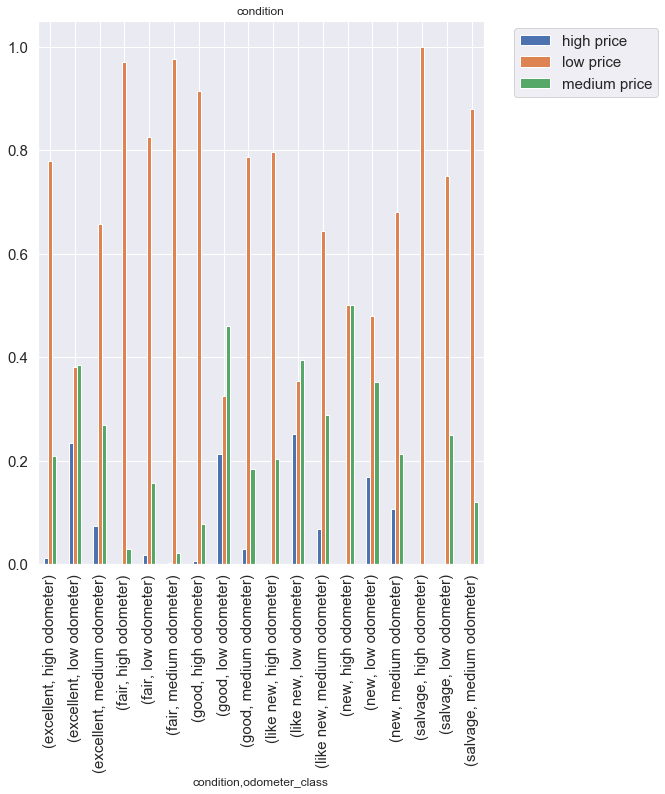

In [838]:
by_condition_price('chevrolet')
by_condition_odometer_price('chevrolet')

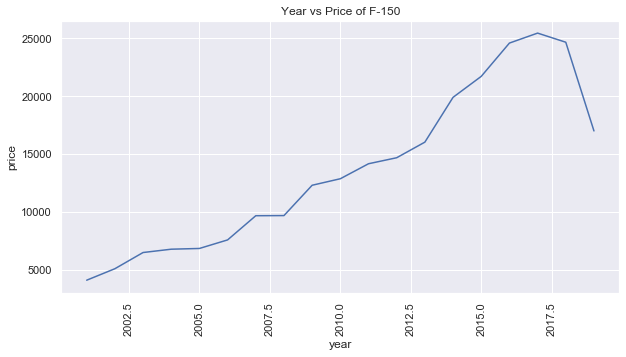

<Figure size 360x360 with 0 Axes>

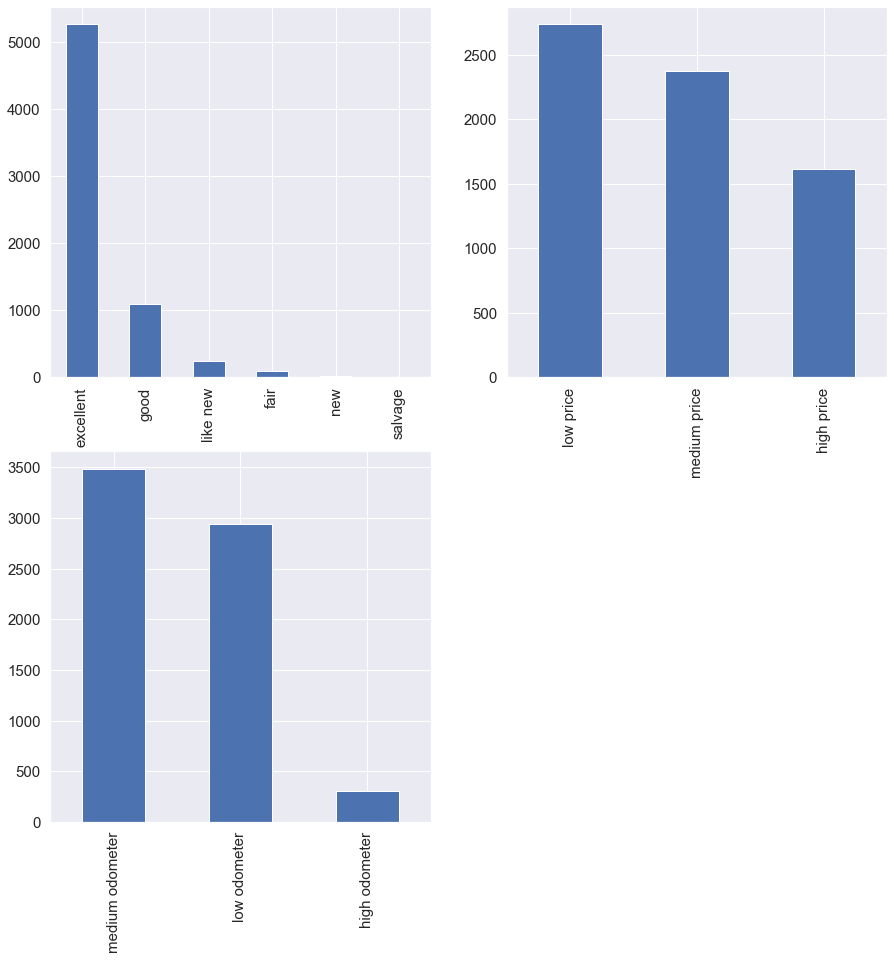

In [839]:
price_model_20('silverado 1500')
model_20('silverado 1500')

### * toyota data of past 20 years analysis

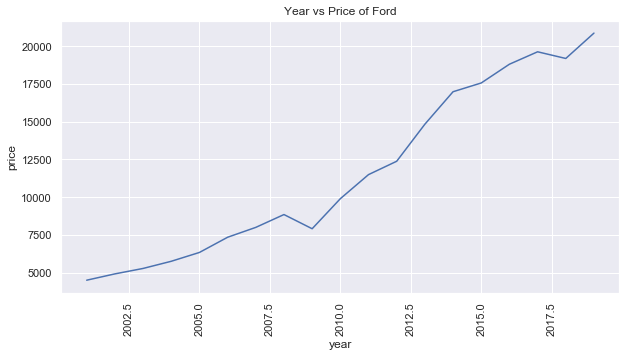

<Figure size 360x360 with 0 Axes>

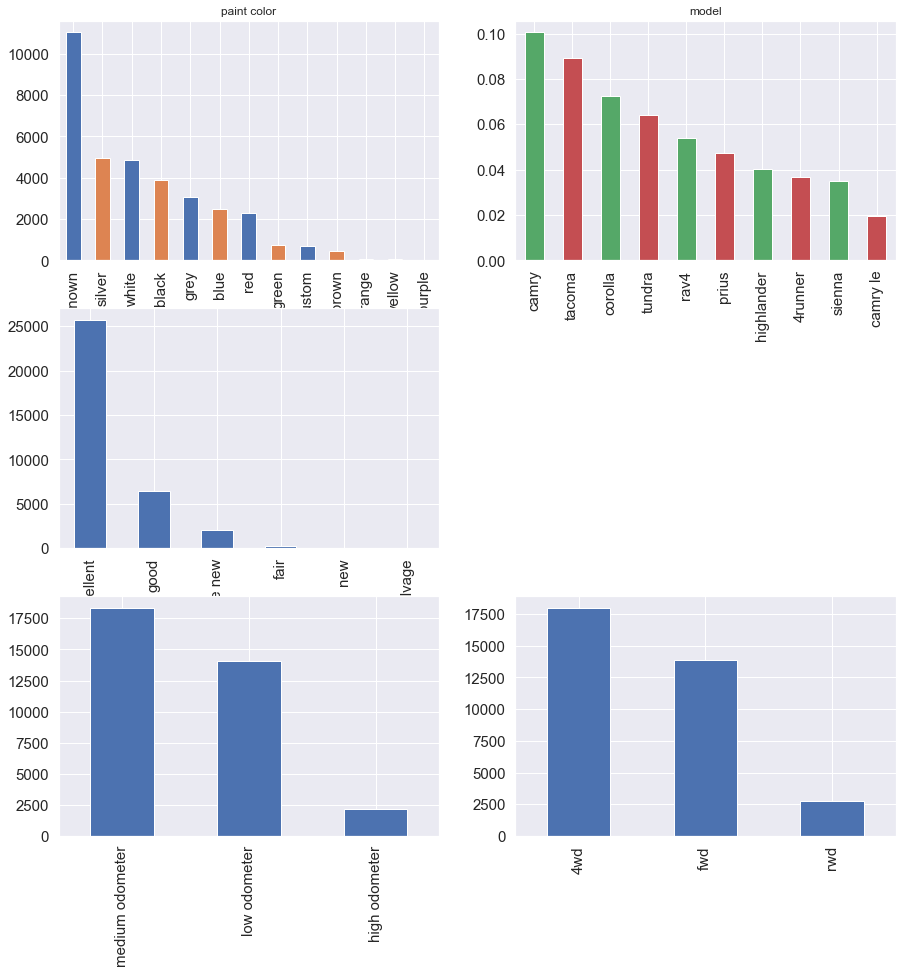

In [840]:
price_20('toyota') 
manu_20('toyota')

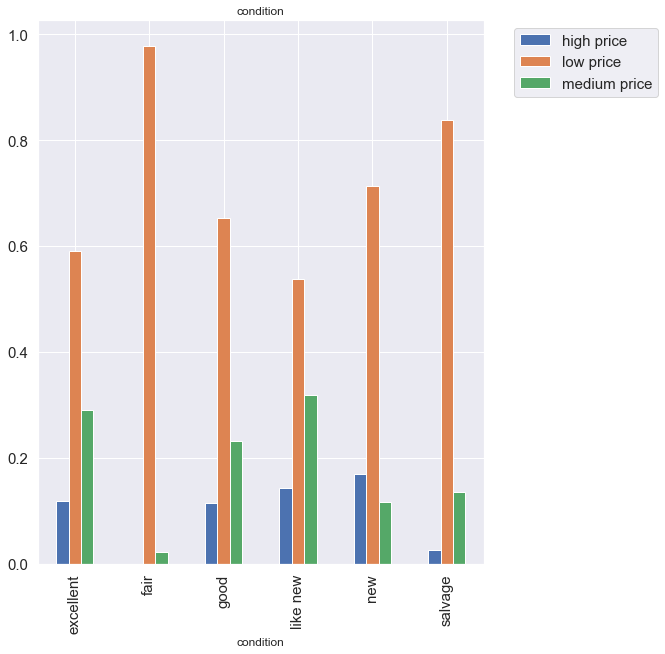

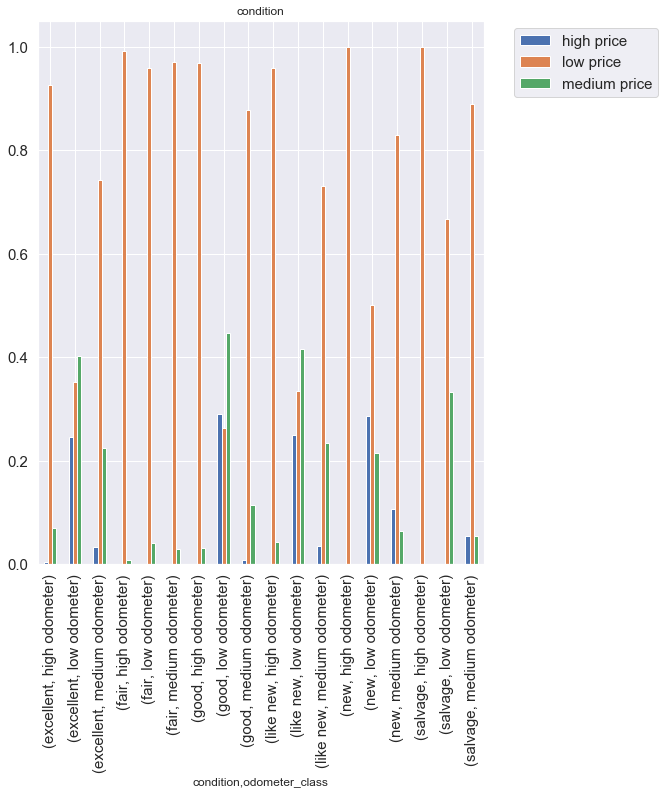

In [841]:
by_condition_price('toyota')
by_condition_odometer_price('toyota')

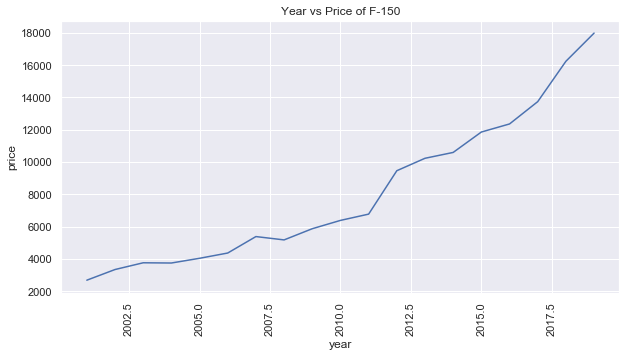

<Figure size 360x360 with 0 Axes>

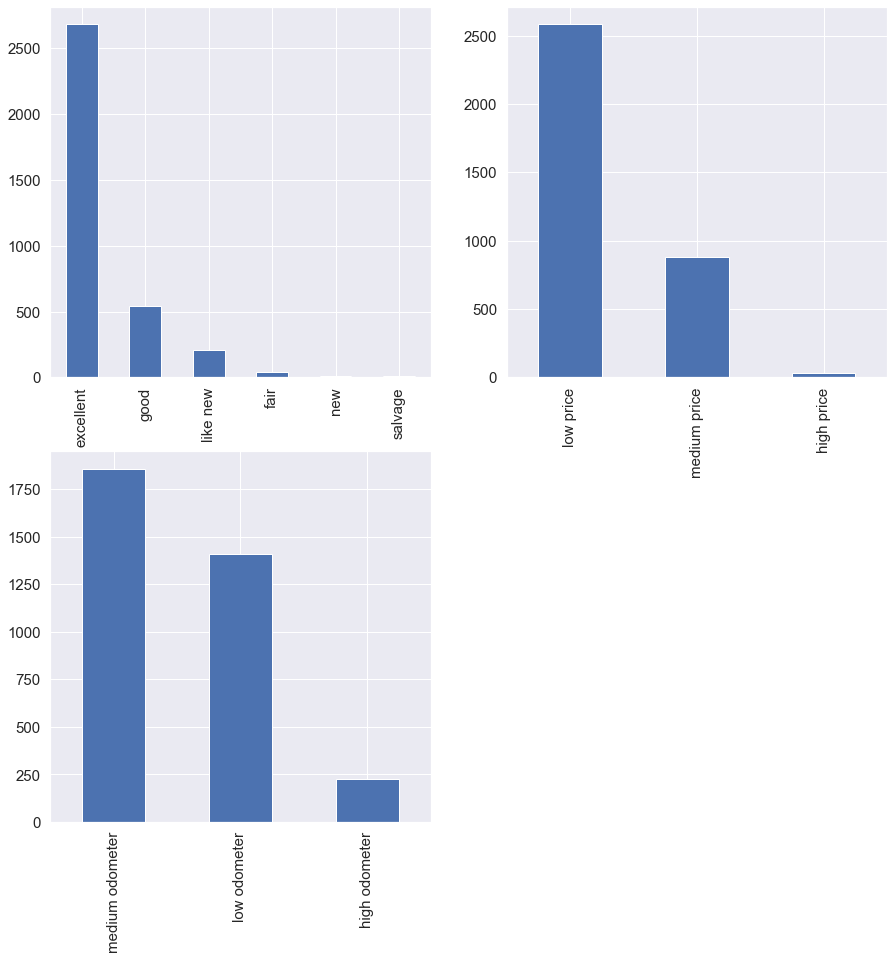

In [842]:
price_model_20('camry')
model_20('camry')

### * nissan data of past 20 years analysis

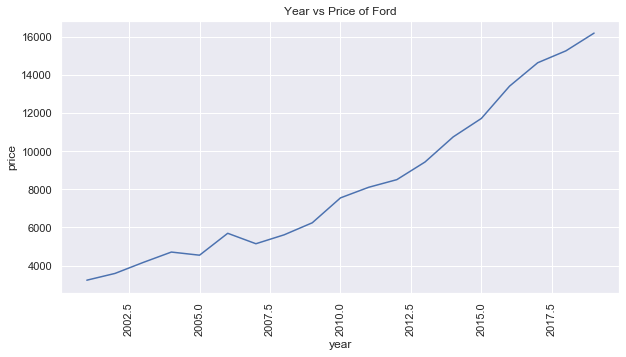

<Figure size 360x360 with 0 Axes>

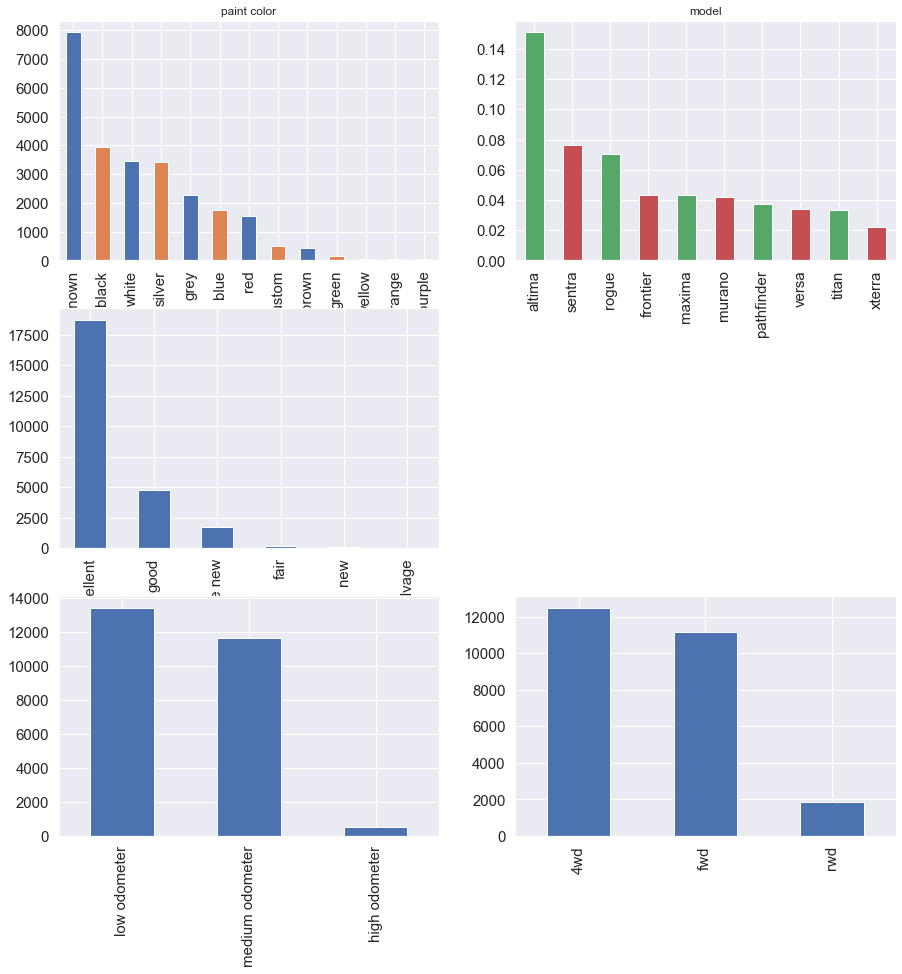

In [843]:
price_20('nissan') 
manu_20('nissan')

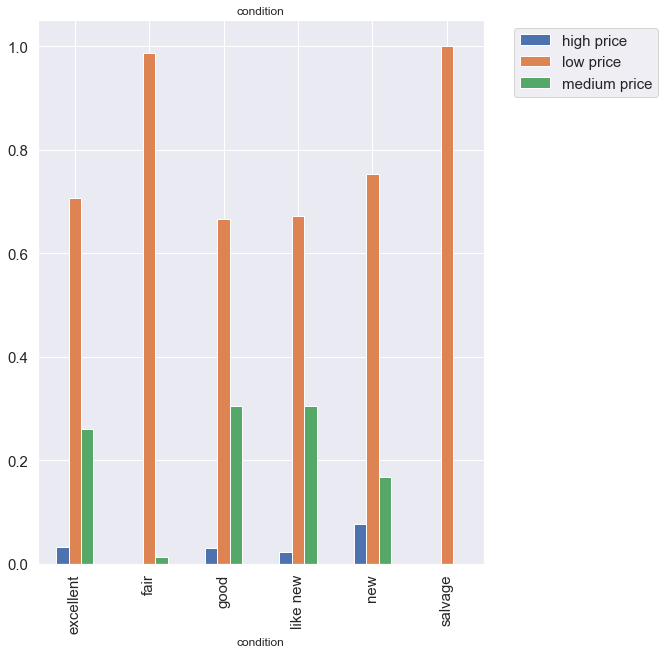

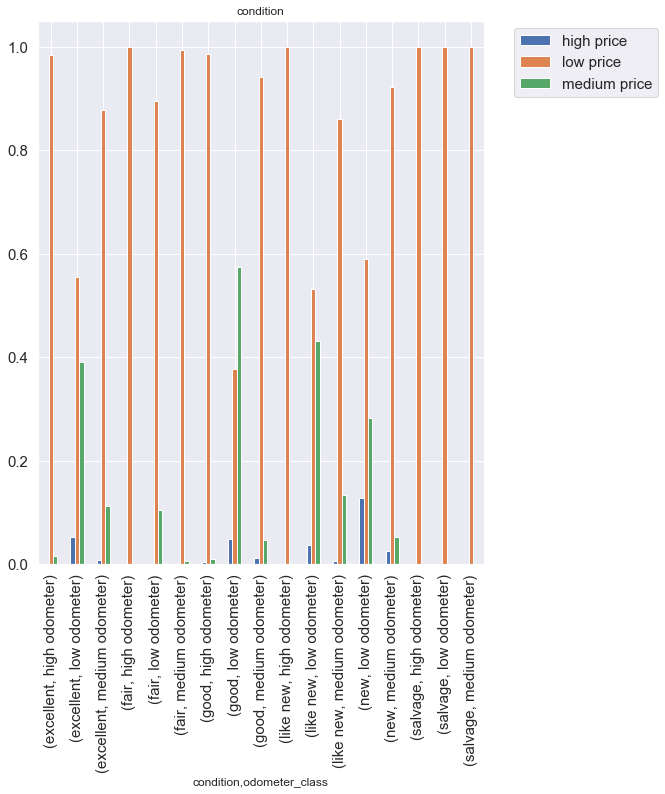

In [844]:

by_condition_price('nissan')
by_condition_odometer_price('nissan')

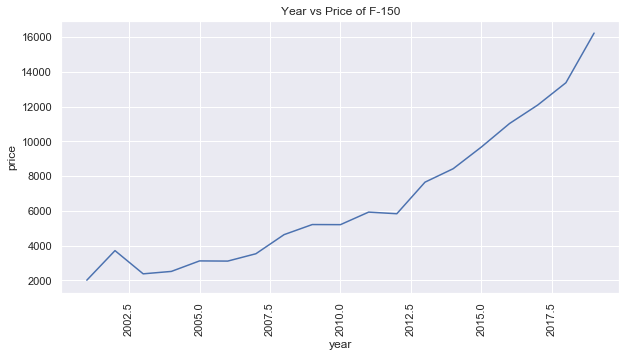

<Figure size 360x360 with 0 Axes>

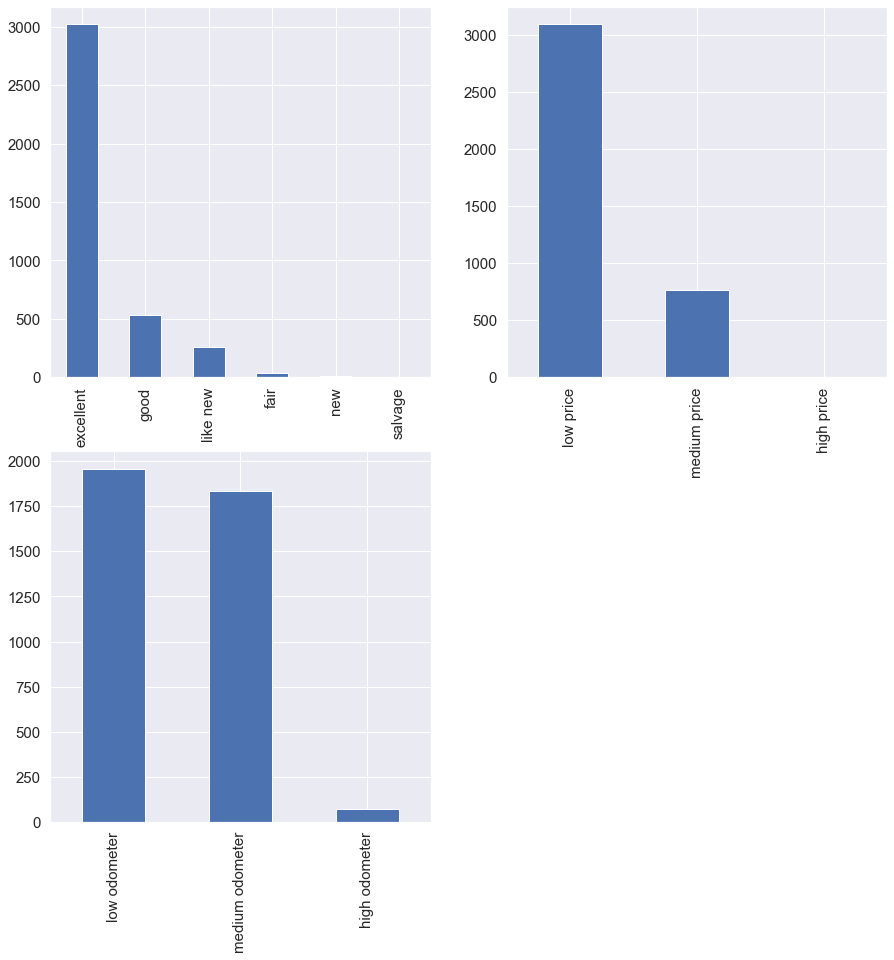

In [845]:
price_model_20('altima')
model_20('altima')

### * Honda' data of past 20 years analysis

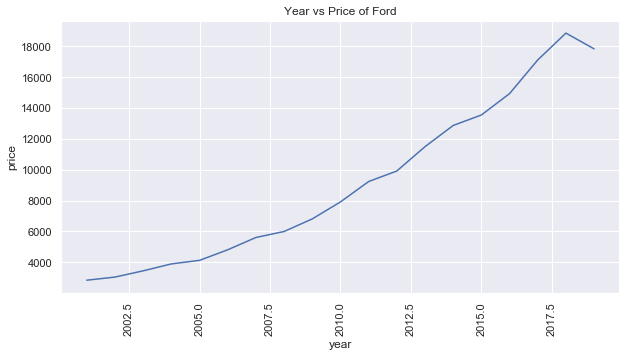

<Figure size 360x360 with 0 Axes>

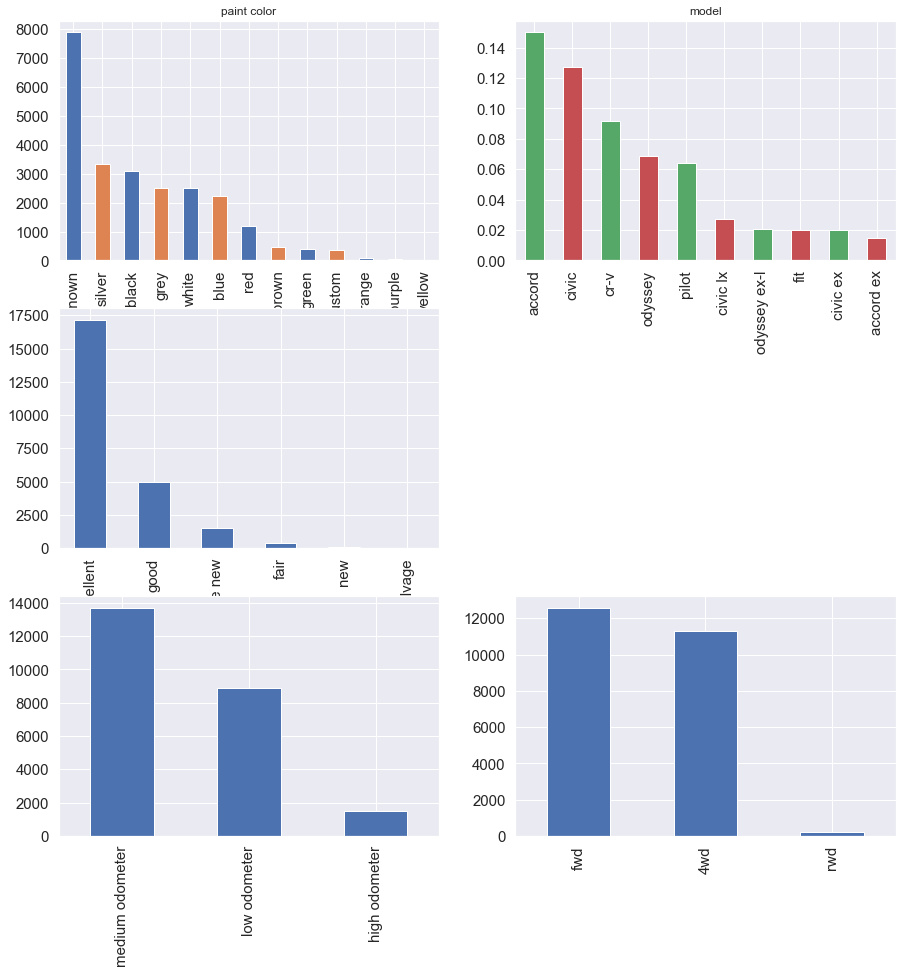

In [846]:
price_20('honda') 
manu_20('honda')

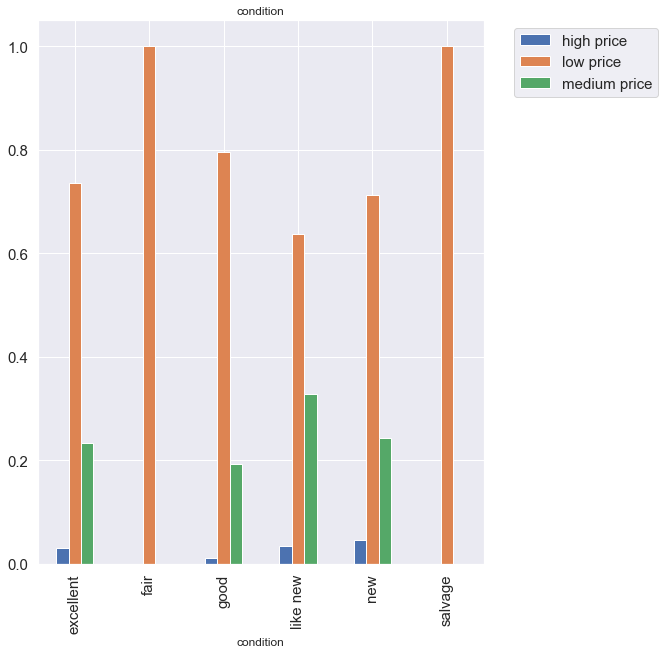

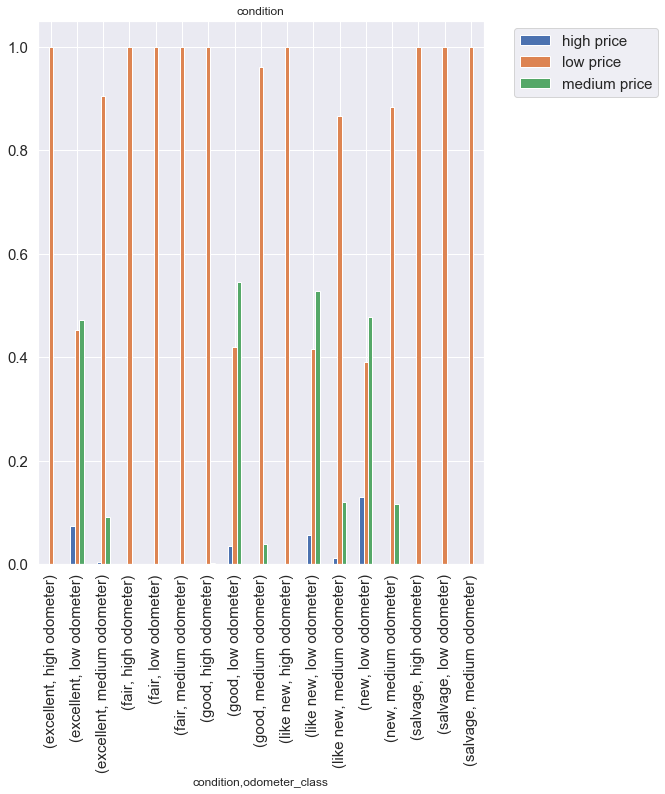

In [847]:
by_condition_price('honda')
by_condition_odometer_price('honda')

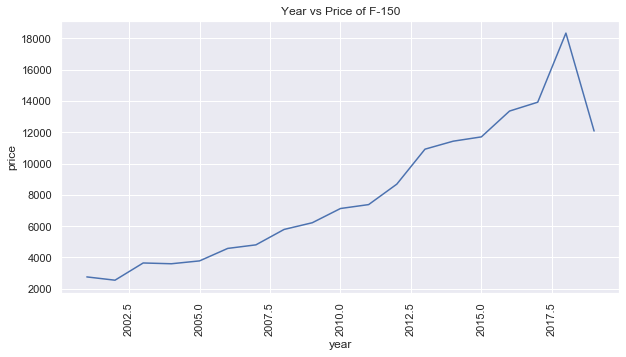

<Figure size 360x360 with 0 Axes>

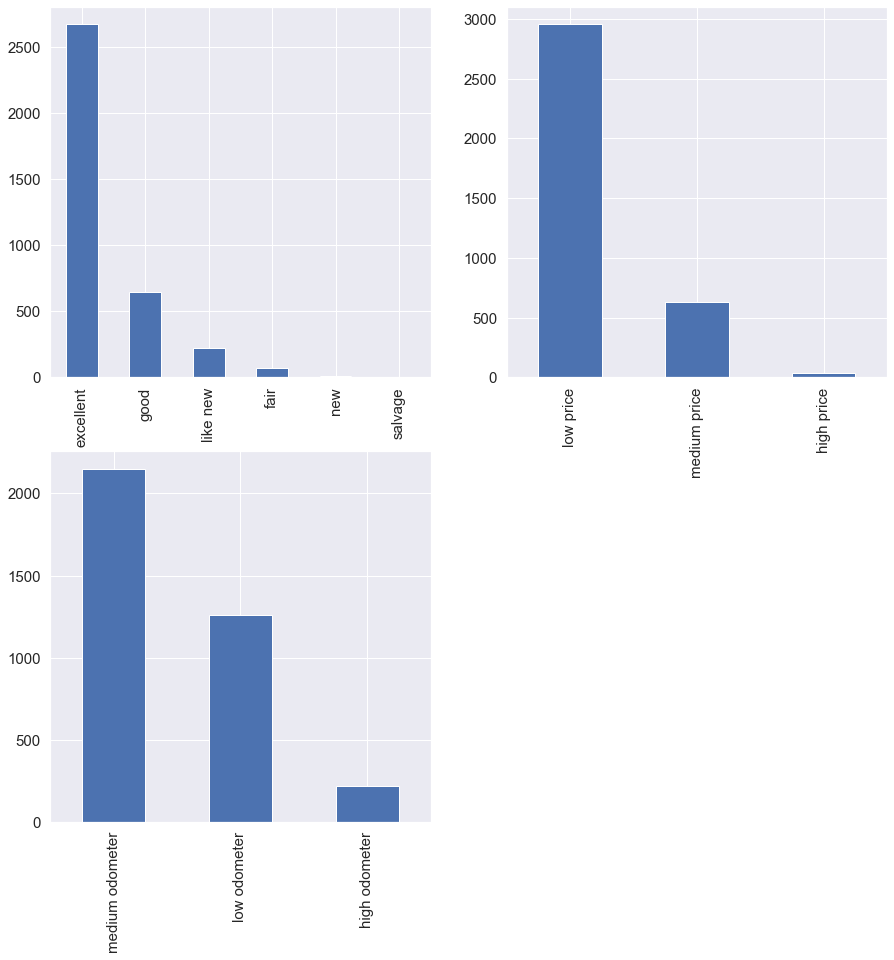

In [848]:
price_model_20('accord')
model_20('accord')

# Frequentist Inference & Descriptive Stats Practice
## Numerical Variable Analysis (year, odometer)
### scatter plot of year and price 

In [849]:
from numpy.polynomial.polynomial import polyfit
import scipy.stats as sts
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
import statsmodels.stats.weightstats

In [850]:
ford_price_20=data_20[data_20['manufacturer']=='ford']
ford_price_20.head(5)

id          region  price  year manufacturer              model  \
1   7034440610  salt lake city   9377  2016         ford              f-150   
3   7034440546  salt lake city   9377  2016         ford              f-150   
6   7034405619  salt lake city  34500  2017         ford              f-350   
8   7034404595  salt lake city  12500  2013         ford              f-250   
22  7034366554  salt lake city   9500  2001         ford  excursion limited   

    condition   odometer title_status transmission drive paint_color  \
1   excellent      10.00        clean    automatic   4wd     unknown   
3   excellent      10.00        clean    automatic   4wd     unknown   
6   excellent  95,484.00        clean    automatic   4wd       white   
8   excellent 226,031.00        clean    automatic   4wd       white   
22       good 101,729.96        clean    automatic   4wd        grey   

     odometer_class   price_class  age  
1      low odometer     low price    4  
3      low odometer     low price    4  
6      low odometer    high price    3  
8     high odometer  medium price    7  
22  medium odometer     low price   19

In [851]:
#create a histogram function
def price_his(name):
    data=data_20[data_20['manufacturer']==name]['price']
    plt.figure(figsize=(10,8))
    sns.distplot(data,bins=10)
    plt.xlabel('price')
    plt.axvline(np.mean(data),color='b',linestyle='dashed',linewidth=3)
    print(data.describe())

In [852]:
def age_his(name):
    data=data_20[data_20['manufacturer']==name]['age']
    plt.figure(figsize=(10,8))
    sns.distplot(data,bins=10)
    plt.xlabel('age')
    plt.axvline(np.mean(data),color='b',linestyle='dashed',linewidth=3)
    print(data.describe())
    

count   78,741.00
mean    13,574.77
std      8,630.22
min          1.00
25%      6,999.00
50%     10,995.00
75%     18,995.00
max     36,122.00
Name: price, dtype: float64


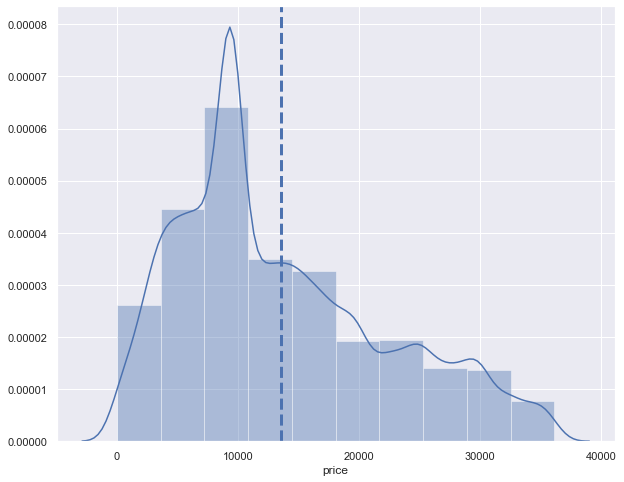

In [853]:
price_his('ford')

count   78,741.00
mean         8.78
std          4.67
min          1.00
25%          5.00
50%          8.00
75%         12.00
max         19.00
Name: age, dtype: float64


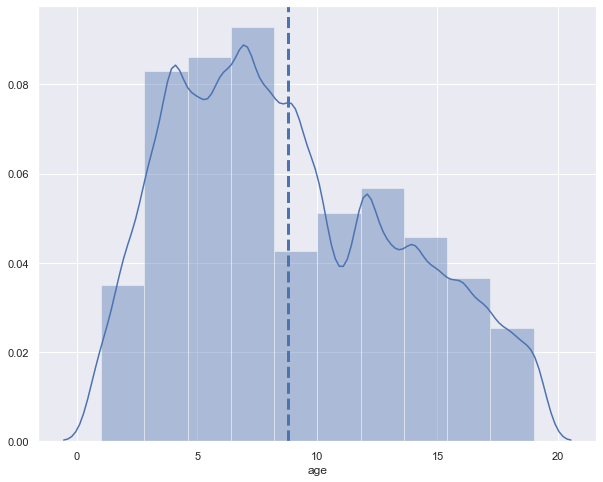

In [854]:
age_his('ford')

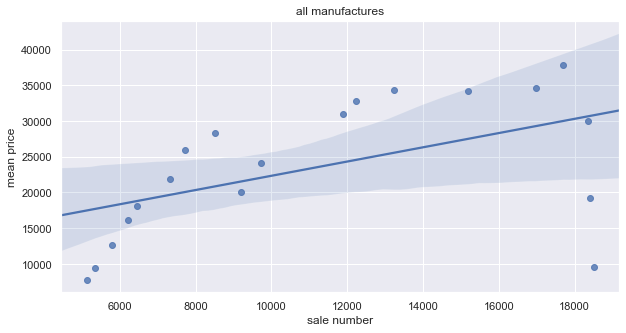

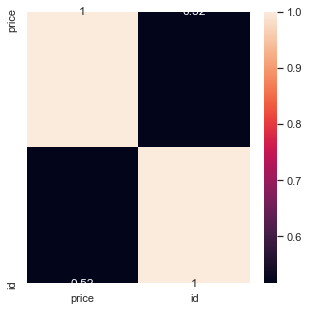

In [855]:
sn=data_20.groupby('year').id.count()
price=data_20.groupby('year').price.mean()
all=pd.concat([price,sn],axis=1)

plt.figure(figsize=(10,5))
    

_=sns.regplot(y=all.id, x=all.price, data=all, fit_reg = True)
_ = plt.xlabel('sale number')
_ = plt.ylabel('mean price')
_ =plt.title('all manufactures')

plt.figure(figsize=(5,5))
corrmatrix=all.corr()
sns.heatmap(corrmatrix, annot=True)

In [856]:
#create a scatter function
def price_year_ecdf(name):
    data=data_20[data_20['manufacturer']==name].groupby('year').price.mean()
    x=data.index
    y=np.sort(data)
    return x,y

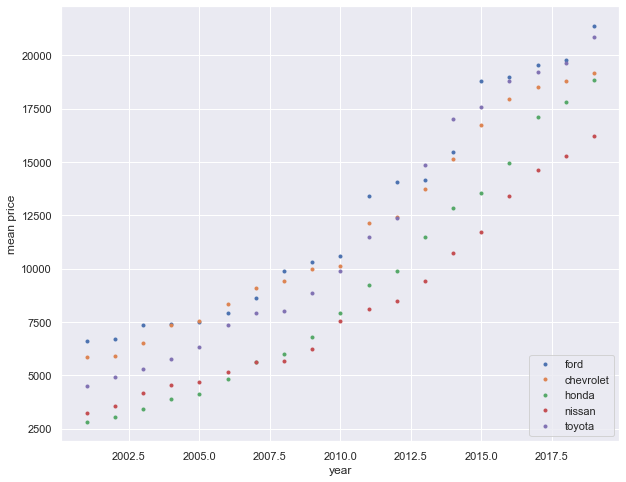

In [857]:
x_ford,y_ford= price_year_ecdf('ford')
x_chevrolet,y_chevrolet= price_year_ecdf('chevrolet')
x_honda,y_honda= price_year_ecdf('honda')
x_nissan,y_nissan= price_year_ecdf('nissan')
x_toyota,y_toyota= price_year_ecdf('toyota')

plt.figure(figsize=(10,8))
_=plt.plot(x_ford,y_ford,marker='.',linestyle='none')
_=plt.plot(x_chevrolet,y_chevrolet,marker='.',linestyle='none')
_=plt.plot(x_honda,y_honda,marker='.',linestyle='none')
_=plt.plot(x_nissan,y_nissan,marker='.',linestyle='none')
_=plt.plot(x_toyota,y_toyota,marker='.',linestyle='none')

plt.legend(('ford', 'chevrolet', 'honda','nissan','toyota'), loc='lower right')
_ = plt.xlabel('year')
_ = plt.ylabel('mean price')

### generate linear regression line  of year and price

In [858]:
x_ford,y_ford= price_year_ecdf('ford')
slope,intercept=np.polyfit(x_ford,y_ford,1)
slope,intercept

(889.0396994572254, -1774421.3979156308)

In [859]:
x=x_ford
y=slope*x+intercept

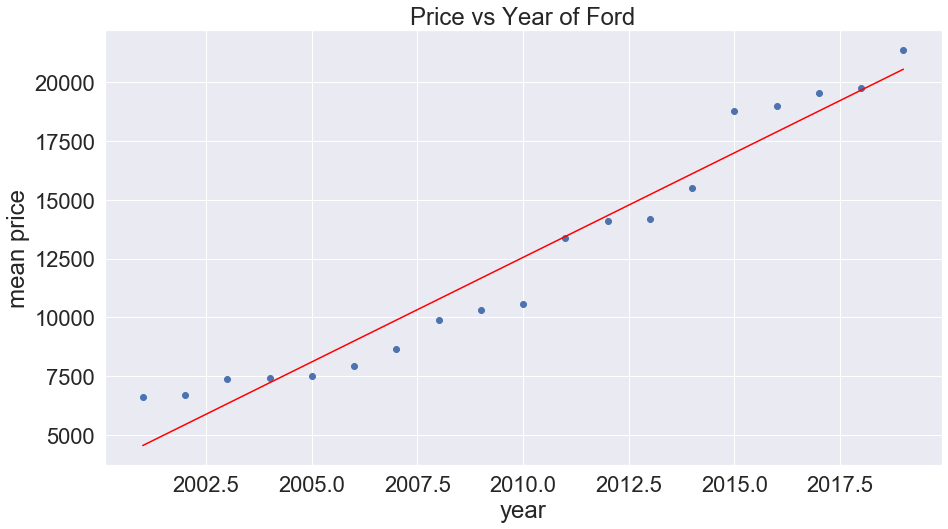

In [860]:
plt.figure(figsize=(15,8))
sns.set(font_scale=2)
_=plt.scatter(x_ford,y_ford)
_=plt.plot(x, y, linestyle='-',color='red')
_ = plt.xlabel('year')
_ = plt.ylabel('mean price')
_ = plt.title('Price vs Year of Ford')
plt.show()


### generate pearson value

In [861]:
#check pearson_r
#check price and year
def pearson_r(x, y):
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]
ford_r=pearson_r(ford_price_20['year'],ford_price_20['price'])
ford_r

0.5054903132939366

##### conclusion: price and year has a linear correlation

In [862]:
def price_year_ecdf(name):
    data=data_20[data_20['manufacturer']==name].groupby('year').price.mean().mean()
    x=data.index
    y=np.sort(data)
    return x,y

### histogram of odometer

In [863]:
def odo_his(name):
    data=data_20[data_20['manufacturer']==name]['odometer']
    plt.figure(figsize=(10,8))
    sns.distplot(data,bins=10)
    plt.xlabel('odometer')
    plt.axvline(np.mean(data),color='b',linestyle='dashed',linewidth=3)

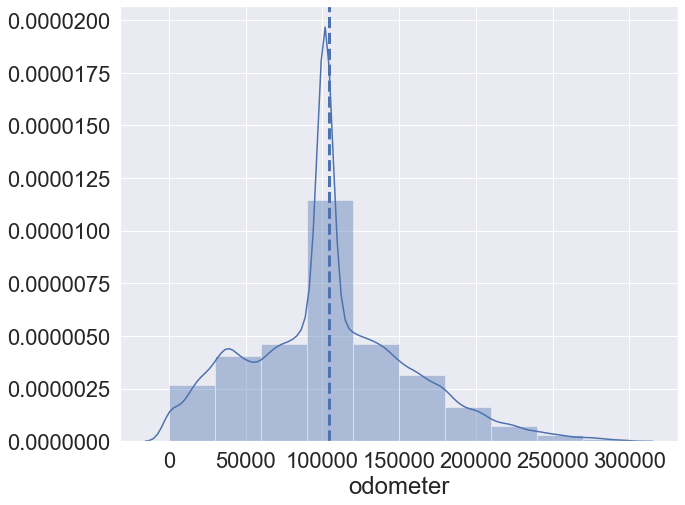

In [864]:
odo_his('ford')

### scatter plot of odometer and price

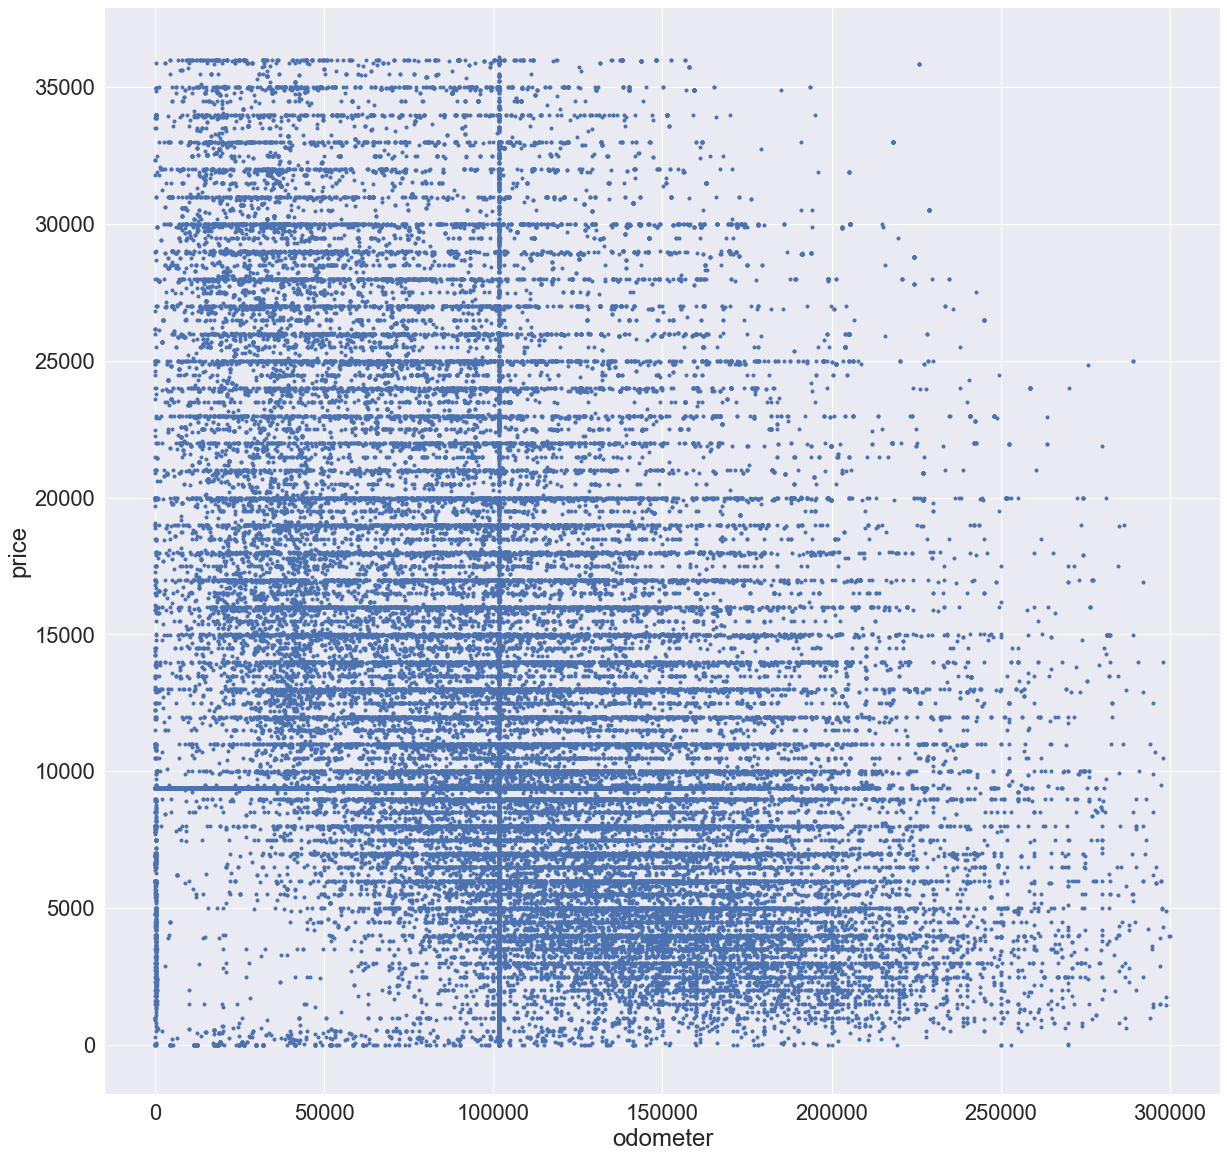

In [865]:
#check price and odomater
_ = plt.plot(ford_price_20['odometer'],ford_price_20['price'],marker='.', linestyle='none')
_=plt.xlabel('odometer')
_=plt.ylabel('price')

In [866]:
slope,intercept=np.polyfit(ford_price_20['odometer'],ford_price_20['price'],1)
slope,intercept

(-0.05619825293423402, 19427.194084804636)

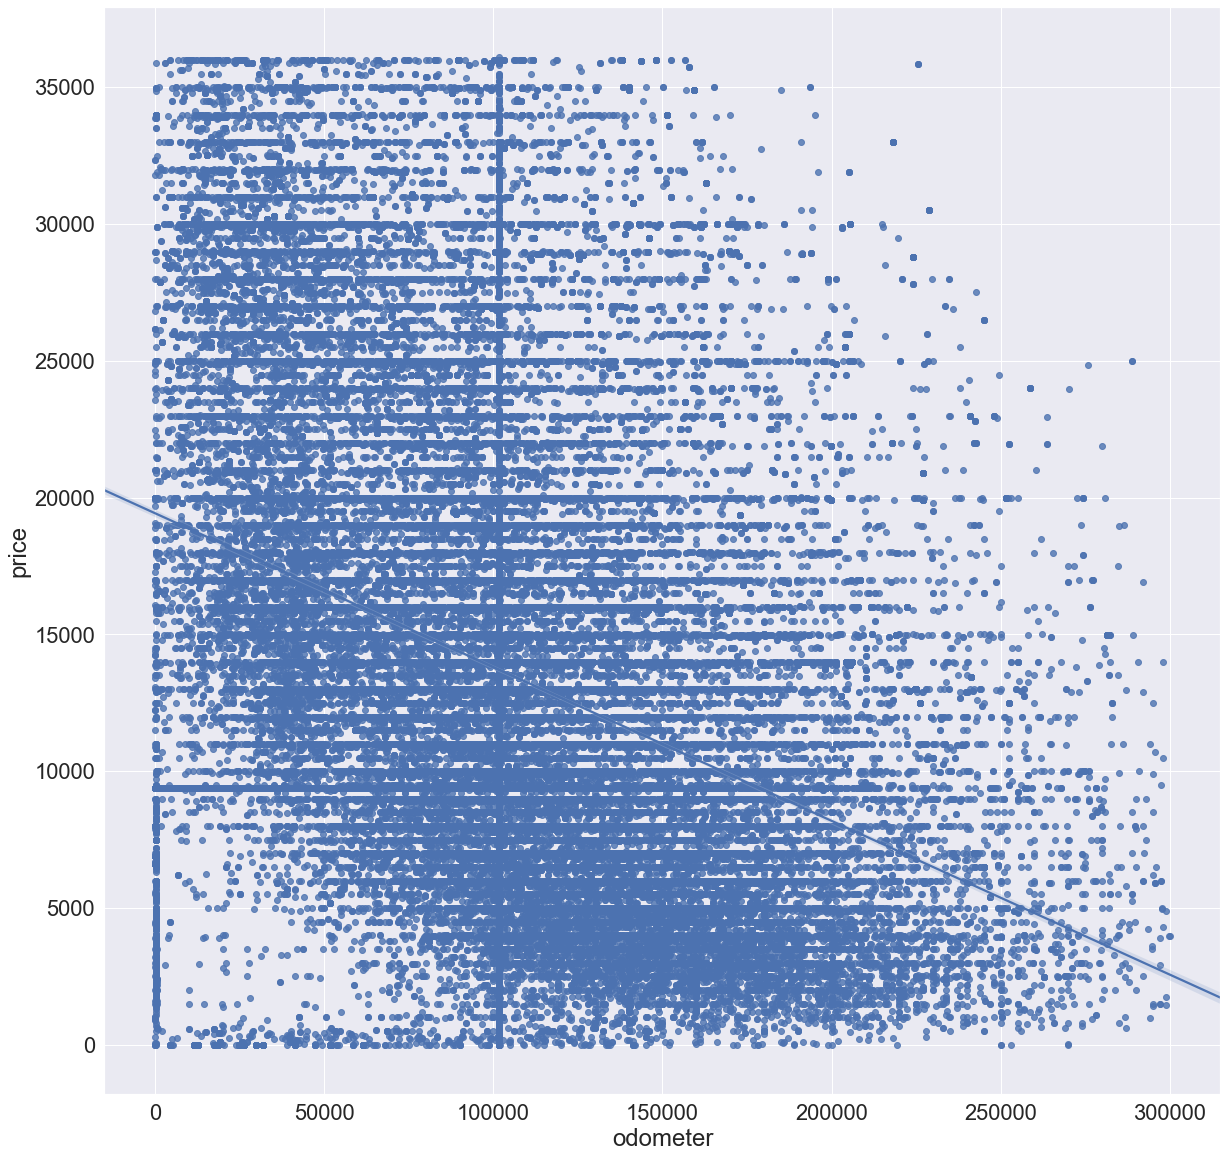

In [867]:
x3=ford_price_20['odometer']
y3=slope*x3+intercept
_=sns.regplot(x=ford_price_20['odometer'],y=ford_price_20['price'],data=ford_price_20, fit_reg = True)
plt.show()

### Odometer and year

In [868]:
def year_odometer(name):
    data=data_20[data_20['manufacturer']==name].groupby('age').odometer.mean()
    x=data.index
    y=np.sort(data)
    return x,y

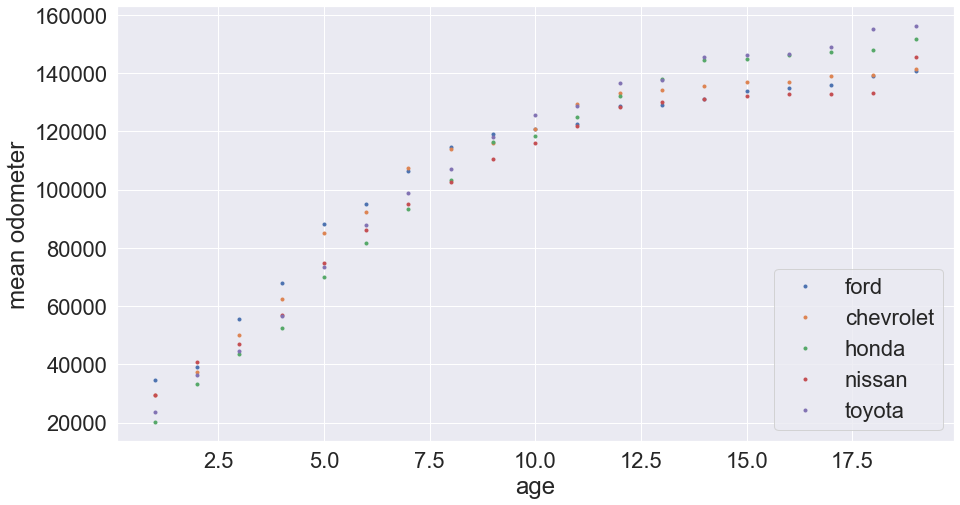

In [869]:
x_ford,y_ford= year_odometer('ford')
x_chevrolet,y_chevrolet= year_odometer('chevrolet')
x_honda,y_honda= year_odometer('honda')
x_nissan,y_nissan= year_odometer('nissan')
x_toyota,y_toyota= year_odometer('toyota')

plt.figure(figsize=(15, 8))
sns.set(font_scale=2)
_=plt.plot(x_ford,y_ford,marker='.',linestyle='none')
_=plt.plot(x_chevrolet,y_chevrolet,marker='.',linestyle='none')
_=plt.plot(x_honda,y_honda,marker='.',linestyle='none')
_=plt.plot(x_nissan,y_nissan,marker='.',linestyle='none')
_=plt.plot(x_toyota,y_toyota,marker='.',linestyle='none')

plt.legend(('ford', 'chevrolet', 'honda','nissan','toyota'), loc='lower right')
_ = plt.xlabel('age')
_ = plt.ylabel('mean odometer')

### pearson value of price and odometer 

In [870]:
#check pearson_r
#check price and odomater
ford_r=pearson_r(ford_price_20['odometer'],ford_price_20['price'])
ford_r

-0.3382040394823367

##### conclusion: price and odometer  have non-linear correlation

In [871]:
def corrmatrix(name):
    data=data_20[data_20['manufacturer']==name]
    corrmatrix=data.corr()
    sns.heatmap(corrmatrix, annot=True)
    plt.show()

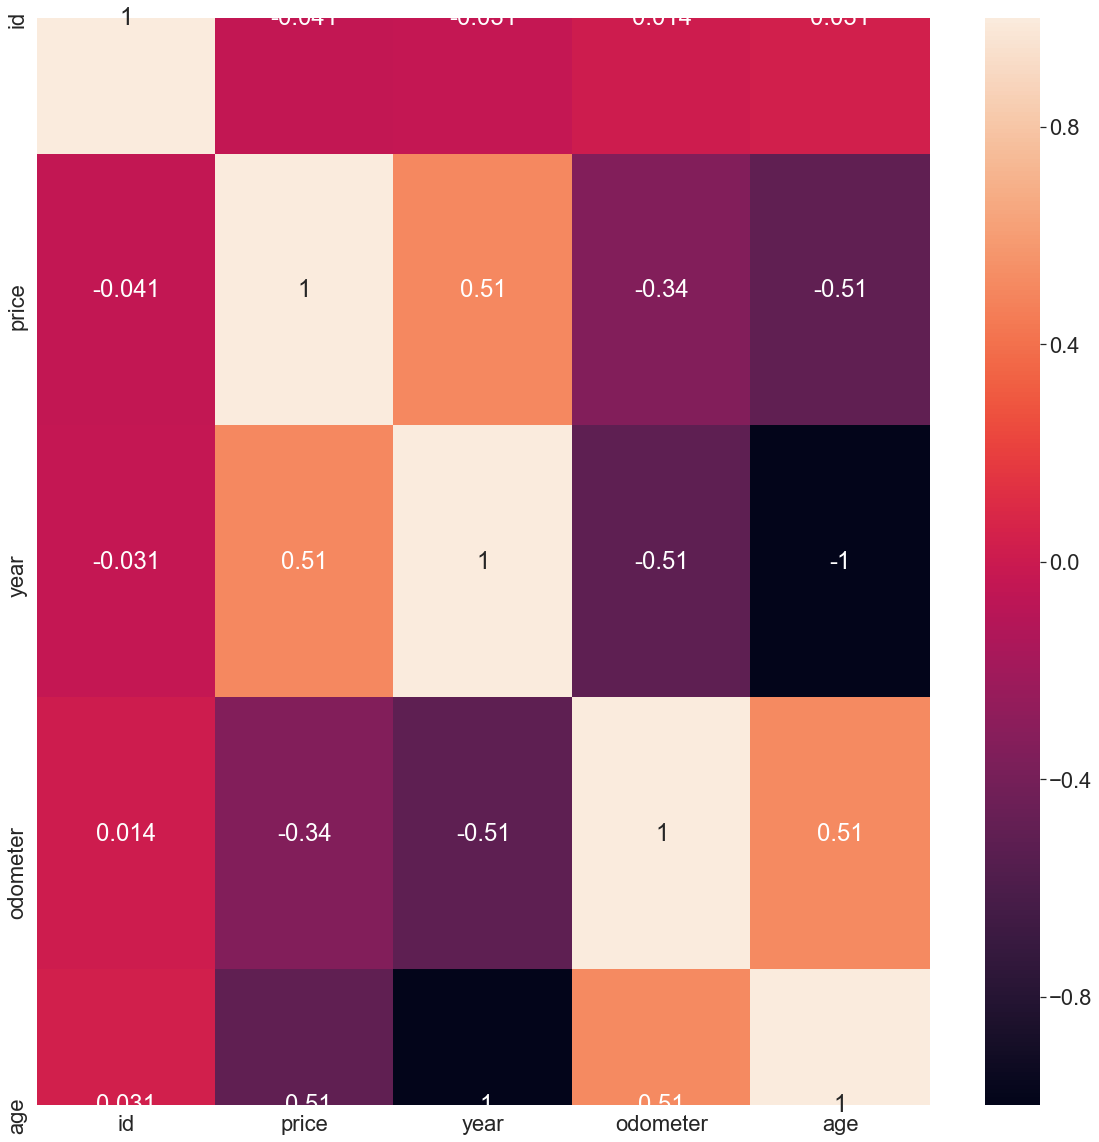

In [872]:
corrmatrix('ford')

## Categorical Variable Analysis (paint_color, model, condition, drive)

In [873]:
def categorical_var(name):
    data=data_20[data_20['manufacturer']==name]
    
    plt.figure(figsize=(16,8))
    sns.set(font_scale=2)
    sns.boxplot(x='paint_color', y='price', data=data)
    
    plt.figure(figsize=(10,8))
    sns.set(font_scale=2)
    sns.boxplot(x='condition', y='price', data=data)
    
    plt.figure(figsize=(10,8))
    sns.set(font_scale=2)
    sns.boxplot(x='drive', y='price',data=data)
    
    plt.figure(figsize=(10,8))
    sns.set(font_scale=2)
    sns.boxplot(x='title_status', y='price', data=data)

    

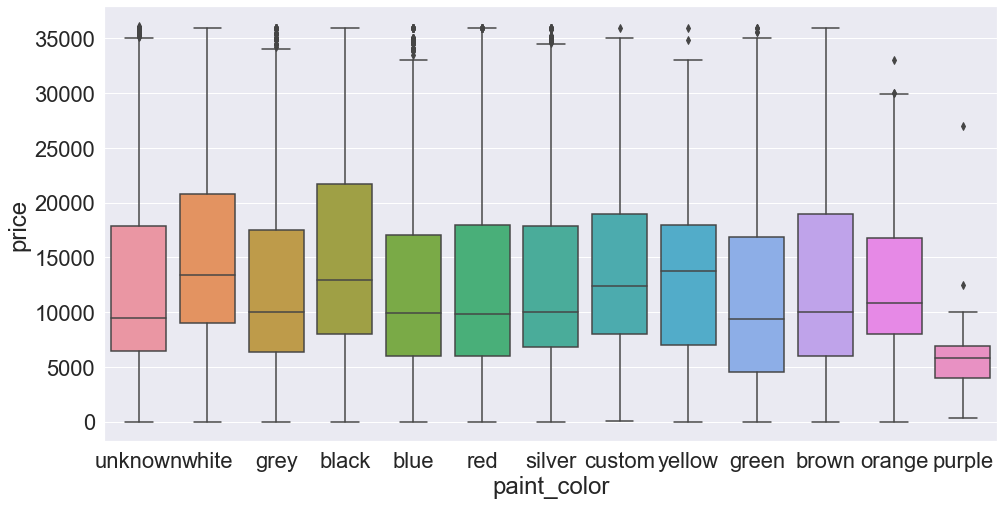

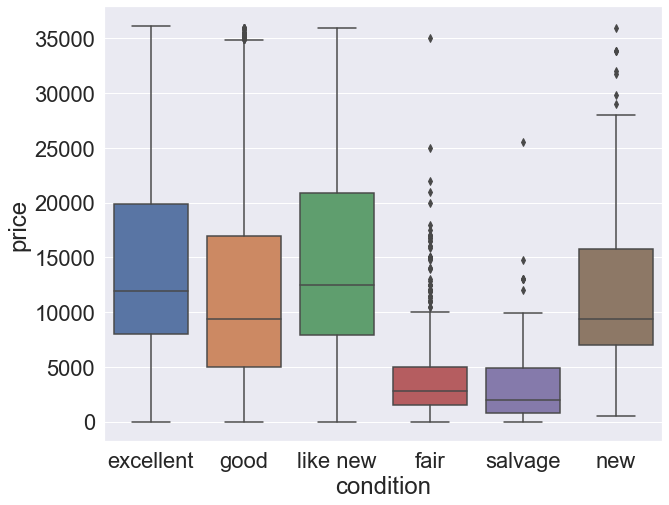

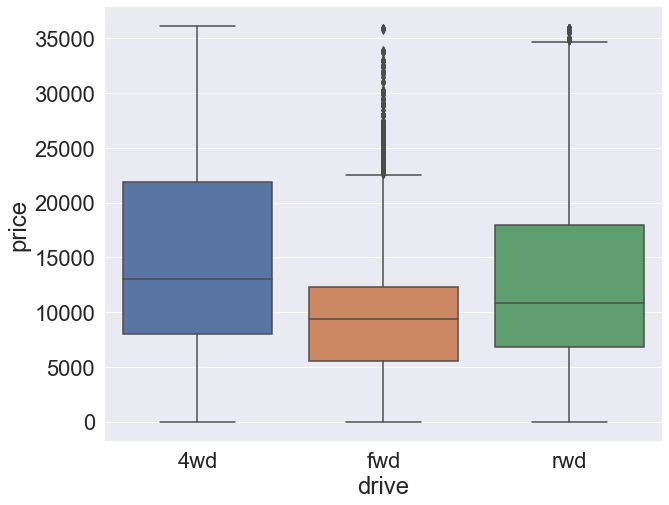

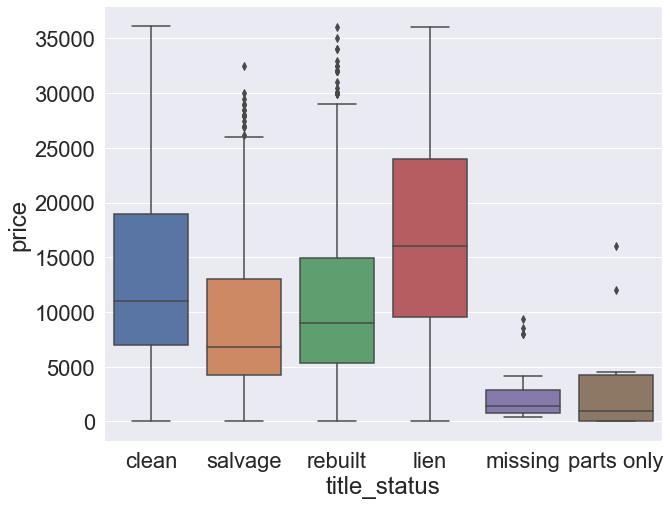

In [874]:
categorical_var('ford')

### compute confidence interval

In [875]:
#price histogram
def plot_distribution(name):
    sns.boxplot(x='manufacturer', y='price', data=data_20[data_20['manufacturer']==name])
    data=data_20[data_20['manufacturer']==name]['price']
    plt.figure()
    sns.distplot(data,bins=10)
    plt.xlabel('price')
    plt.axvline(np.mean(data),color='b',linestyle='dashed',linewidth=3)

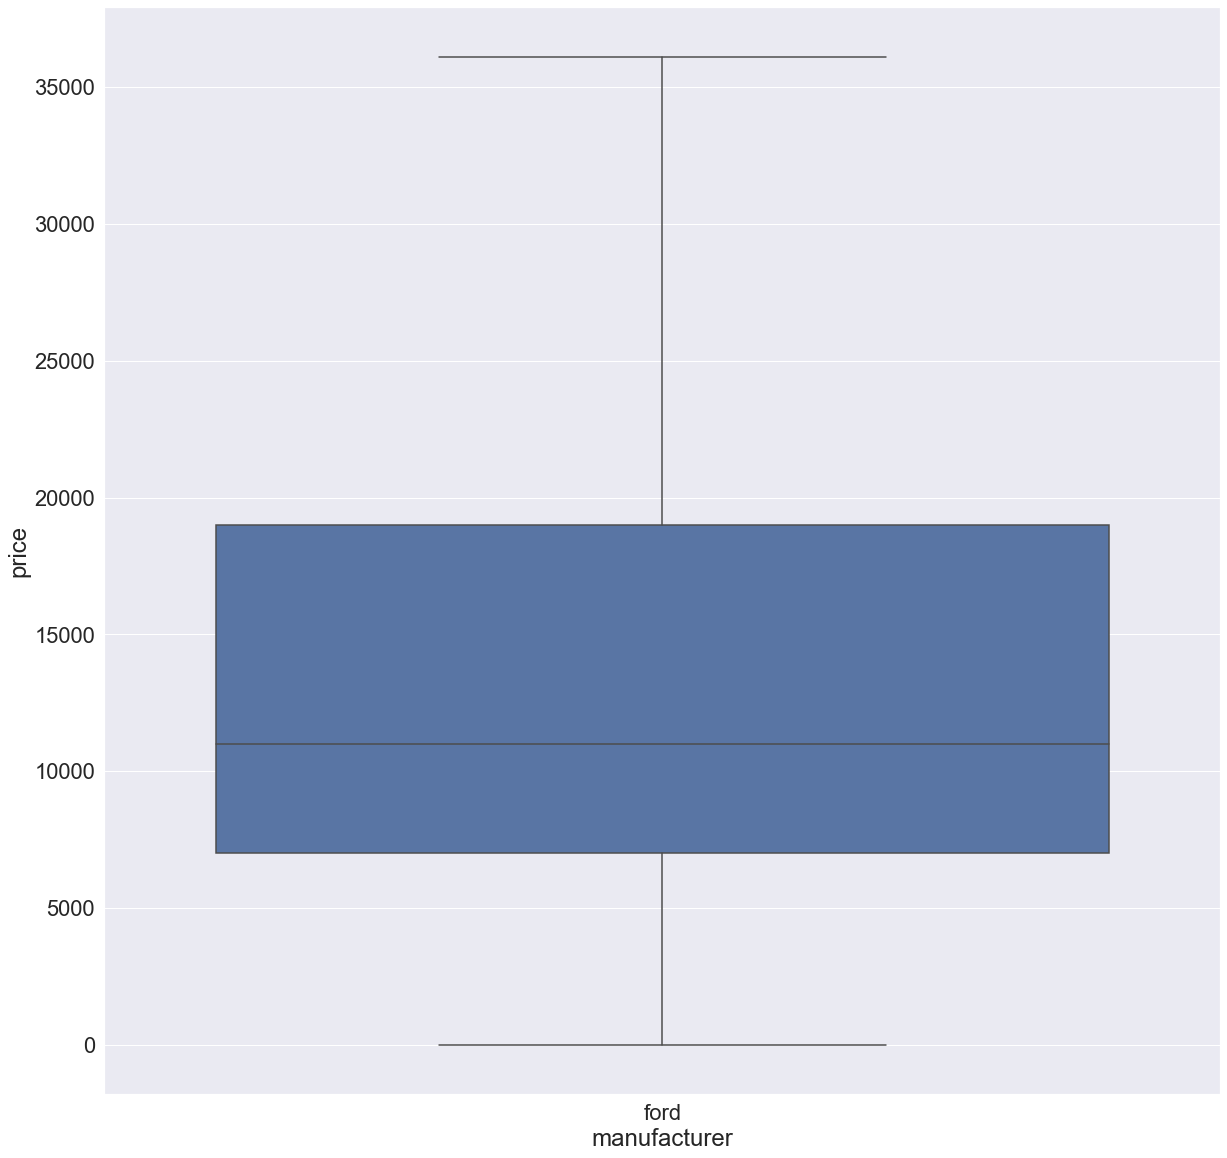

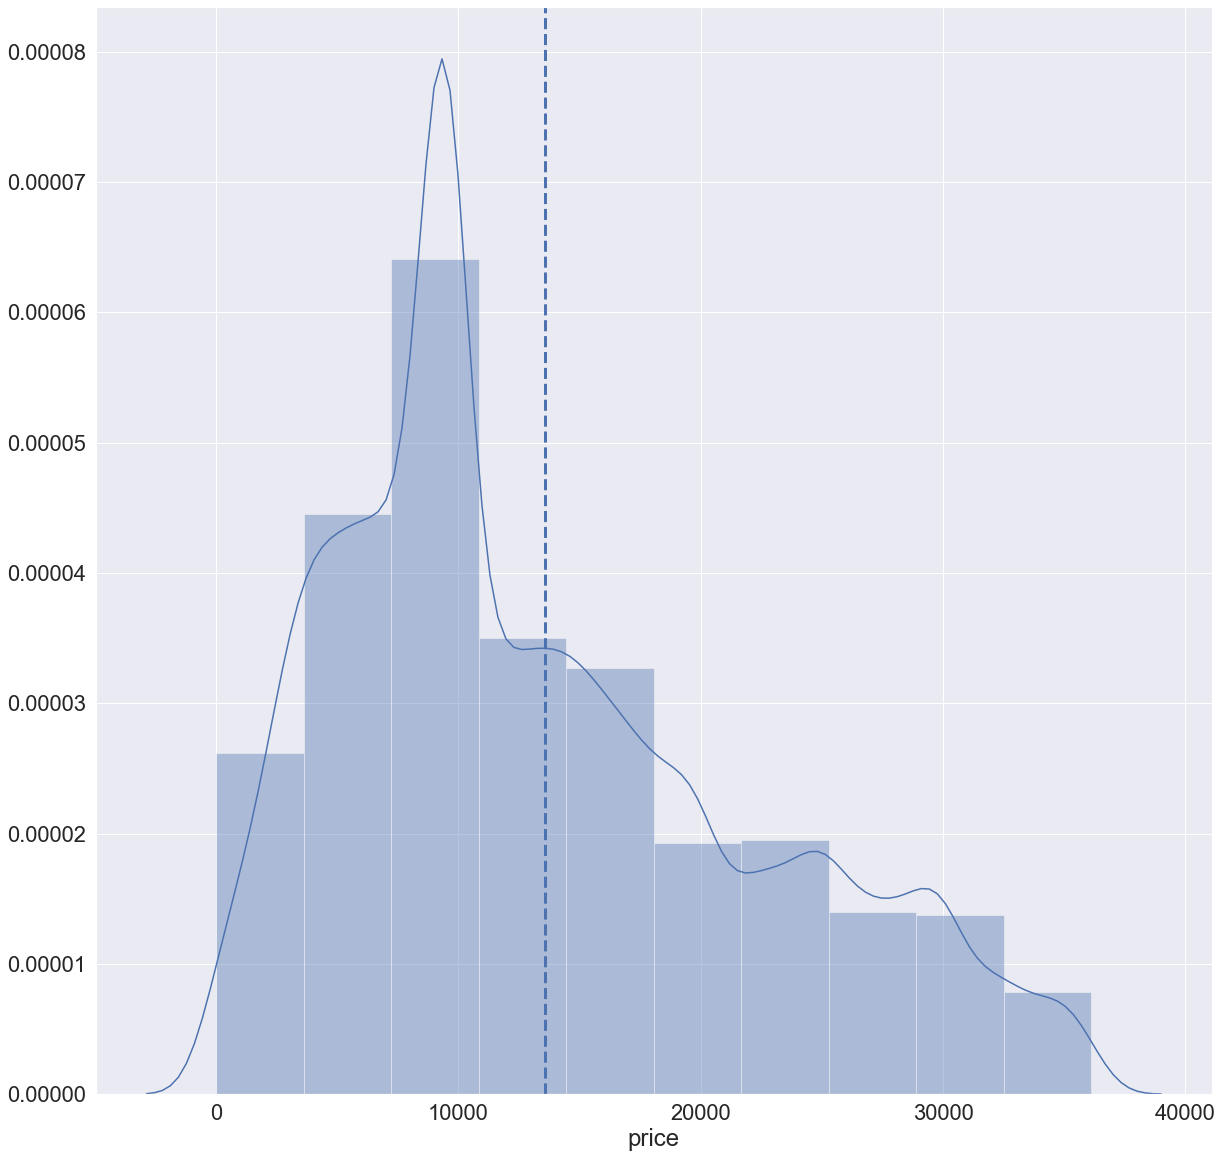

In [876]:
plot_distribution('ford')

In [877]:
#create a sampling function
def price_sampler(n):
    return np.random.choice(ford_price_20['price'], n)

In [878]:
sample_size=50
df = sample_size-1

In [879]:
#ford sample
seed(47)
ford_sample = price_sampler(sample_size)
ford_sample

array([ 9868, 14800,  9900,  9377, 11257, 21999, 22995, 10500, 26991,
       24988, 29995,  2990, 17999, 12980,  2995,  3500, 20000, 19983,
       11999, 11950,  5950,  9377, 18990, 28795, 19950,  4995,  6995,
       29498,  5995, 17958, 27833, 24999,  3950, 28990,  4650, 16995,
        9377,  8000, 14995,  8900, 28988, 11900, 18995, 23596,  4500,
        3600,  7900, 14200,  2750,  3500], dtype=int64)

In [880]:
#sample mean
mean_ford_20=ford_sample.mean()
mean_ford_20

14283.74

In [881]:
#sample std
std_ford_20=ford_sample.std(ddof=df)
print(std_ford_20)

60533.56032499658


In [882]:
#compute the confidence interval by manual
t_ford = t(df).ppf([0.025, 0.975])
t_ford * std_ford_20 / np.sqrt(sample_size) + mean_ford_20

array([-2919.70747372, 31487.18747372])

In [883]:
t2=t.ppf(0.95, df)

### Hypothesis Testing

In [884]:
# compare color histogram
def compare_colorhist_distribution(c1,c2):
    data1=ford_price_20[ford_price_20['paint_color']==c1]['price']
    data2=ford_price_20[ford_price_20['paint_color']==c2]['price']
    plt.figure(figsize=(14,8))
    sns.set(font_scale=2)
    ax1=sns.distplot(data1,bins=10)
    ax2=sns.distplot(data2,bins=10)
    plt.axvline(np.mean(data1),color='b',linestyle='dashed',linewidth=3)
    plt.axvline(np.mean(data2),color='orange',linestyle='dashed',linewidth=3)
    plt.title('mean price of different colors distribution')

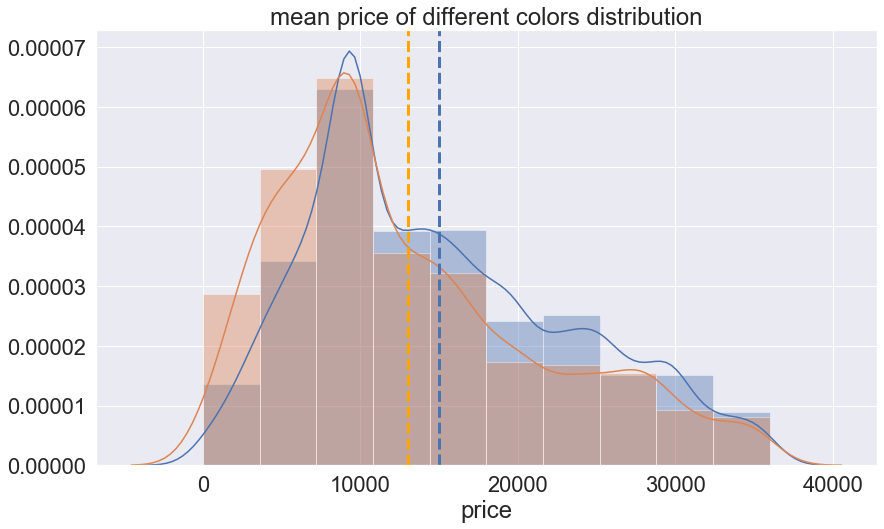

In [885]:
compare_colorhist_distribution('white','silver')

In [886]:
# compare cmodel histogram
def compare_modelhist_distribution(m1,m2):
    data1=ford_price_20[ford_price_20['model']==m1]['price']
    data2=ford_price_20[ford_price_20['model']==m2]['price']
    plt.figure(figsize=(14,8))
    sns.set(font_scale=2)
    ax1=sns.distplot(data1,bins=10)
    ax2=sns.distplot(data2,bins=10)
    plt.axvline(np.mean(data1),color='b',linestyle='dashed',linewidth=3)
    plt.axvline(np.mean(data2),color='orange',linestyle='dashed',linewidth=3)

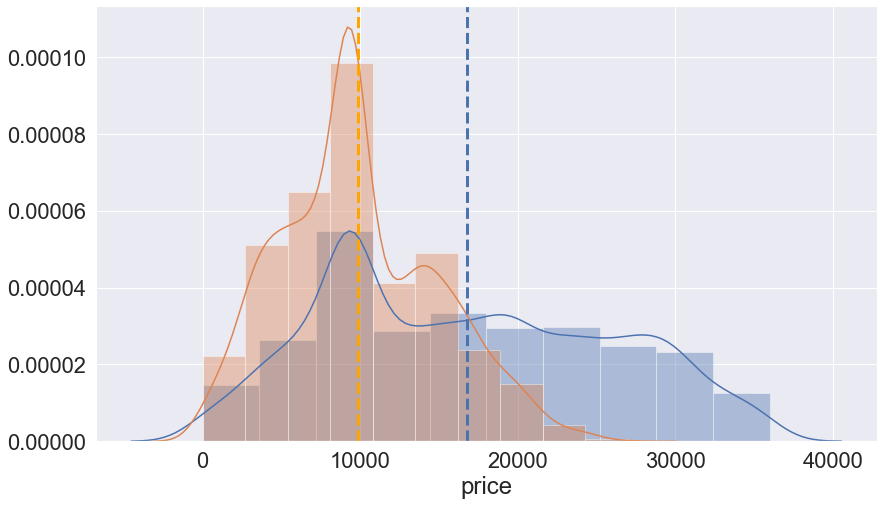

In [887]:
compare_modelhist_distribution('f-150','escape')

In [888]:
#H0: different colors share the same mean price
#compute the P-value by t test
def compare_color_groups(c1,c2,alpha,ss):
    data1=np.random.choice(ford_price_20[ford_price_20['paint_color']==c1]['price'],ss)
    data2=np.random.choice(ford_price_20[ford_price_20['paint_color']==c2]['price'],ss)
    t, pval=sts.ttest_ind(data1,data2,equal_var=False)
    print('p-value is %.3f'%(pval))
    if pval>alpha:
        print('fail to reject H0')
    else:
        print('reject H0')

In [889]:
compare_color_groups('white','silver',0.05,15)

p-value is 0.039
reject H0


In [890]:
compare_color_groups('white','red',0.05,15)

p-value is 0.675
fail to reject H0


In [891]:
#H0: different models have the same mean price
#compute the P-value by t test
def compare_model_groups(m1,m2,alpha,ss):
    data1=np.random.choice(ford_price_20[ford_price_20['model']==m1]['price'],ss)
    data2=np.random.choice(ford_price_20[ford_price_20['model']==m2]['price'],ss)
    t, pval=sts.ttest_ind(data1,data2,equal_var=False)
    print('p-value is %.3f'%(pval))
    if pval>alpha:
        print('fail to reject H0')
    else:
        print('reject H0')

In [892]:
compare_model_groups('f-150','escape',0.05,15)

p-value is 0.151
fail to reject H0


In [893]:
compare_model_groups('f-150','focus',0.05,15)

p-value is 0.004
reject H0


# Modeling

In [894]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split as split
import warnings
from sys import modules

In [895]:
data_learn=data_20[['price','manufacturer','odometer','year','condition','drive','paint_color','title_status']]

<Figure size 1008x1008 with 0 Axes>

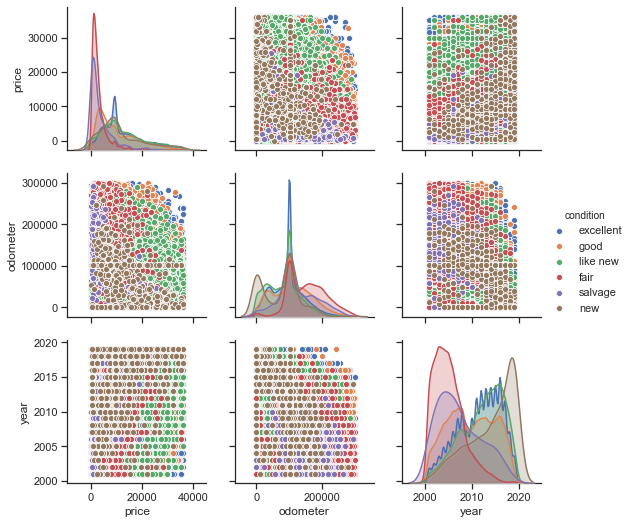

In [896]:
#check the relationship between the variables
plt.figure(figsize=(14,14))
sns.set(font_scale=2)
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_learn, hue="condition")

In [708]:
data_learn.head(5)

price  manufacturer   odometer  year  condition  drive  paint_color  \
0  17899            40  63,500.00  2012          0      0            0   
1   9377            12      10.00  2016          0      0           10   
3   9377            12      10.00  2016          0      0           10   
5  13999            33 120,057.00  2009          0      0            9   
6  34500            12  95,484.00  2017          0      0           11   

   title_status  
0             0  
1             0  
3             0  
5             0  
6             0

In [392]:
data_learn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448001 entries, 0 to 509576
Data columns (total 8 columns):
price           448001 non-null int64
manufacturer    448001 non-null object
odometer        448001 non-null float64
year            448001 non-null int32
condition       448001 non-null object
drive           448001 non-null object
paint_color     448001 non-null object
title_status    448001 non-null object
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 49.1+ MB


## Variables Label Encoding

In [393]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [394]:
# Categorical Variables Label Encoding

label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data_learn['manufacturer']= label_encoder.fit_transform(data_learn['manufacturer']) 
data_learn['condition']= label_encoder.fit_transform(data_learn['condition']) 
data_learn['drive']= label_encoder.fit_transform(data_learn['drive']) 
data_learn['title_status']= label_encoder.fit_transform(data_learn['title_status']) 
data_learn['paint_color']= label_encoder.fit_transform(data_learn['paint_color']) 
data_learn.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

price  manufacturer   odometer  year  condition  drive  paint_color  \
0  17899            40  63,500.00  2012          0      0            0   
1   9377            12      10.00  2016          0      0           10   
3   9377            12      10.00  2016          0      0           10   
5  13999            33 120,057.00  2009          0      0            9   
6  34500            12  95,484.00  2017          0      0           11   

   title_status  
0             0  
1             0  
3             0  
5             0  
6             0

## Dummy Regressor

In [395]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score

In [396]:
y= data_learn.price
X= data_learn.drop('price',axis=1)

In [397]:
dumr = DummyRegressor()

In [398]:
X_train_dumr, X_test_dumr,y_train_dumr, y_test_dumr=train_test_split(X,y,train_size=0.5, random_state=42)

In [399]:
dumr.fit(X_train_dumr, y_train_dumr)
y_predict_dumr=dumr.predict(X_test_dumr)

In [400]:
#calculate the RMSE of Training set
test_rmse_dumr = np.sqrt(MSE(y_test_dumr, y_predict_dumr))

print("Dummy Regression RMSE = {:.2f}".format(test_rmse_dumr))
train_rmse_dumr = np.sqrt(MSE(y_train_dumr, y_predict_dumr[1:]))
print("Dummy Regression RMSE = {:.2f}".format(train_rmse_dumr))

Dummy Regression RMSE = 8235.70
Dummy Regression RMSE = 8223.75


In [401]:
# r square
r2_test_dumr=r2_score(y_test_dumr, y_predict_dumr)
r2_train_dumr=r2_score(y_train_dumr, y_predict_dumr[1:])

## Linear Regression

In [402]:
from sklearn.linear_model import LinearRegression


In [403]:
y= data_learn.price
X= data_learn.drop('price',axis=1)

In [404]:
X_train_lr, X_test_lr,y_train_lr, y_test_lr=train_test_split(X,y,train_size=0.5, random_state=42)

In [405]:
lingr = LinearRegression()

In [406]:
lingr.fit(X_train_lr, y_train_lr)
y_predict_lr=lingr.predict(X_test_lr)

In [407]:
#calculate the RMSE of Training set
test_rmse_lr = np.sqrt(MSE(y_test_lr, y_predict_lr))

print("linear Regression RMSE = {:.2f}".format(test_rmse_lr))
train_rmse_lr = np.sqrt(MSE(y_train_lr, y_predict_lr[1:]))
print("linear Regression RMSE = {:.2f}".format(train_rmse_lr))

linear Regression RMSE = 6837.72
linear Regression RMSE = 9400.13


In [408]:

#  goodness of fit
r2_test_lr=r2_score(y_test_lr, y_predict_lr)
r2_train_lr=r2_score(y_train_lr, y_predict_lr[1:])

## Random Forest Regressor

In [461]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [462]:
#sample for random Forest Feature S
data_learn_sample=data_learn.sample(n=2000)

In [463]:
y2= data_learn_sample.price
X2= data_learn_sample.drop('price',axis=1)

In [464]:
X_train_rf, X_test_rf,y_train_rf, y_test_rf=train_test_split(X2,y2,train_size=0.5, random_state=42)

In [465]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, n_jobs=1))
sel.fit(X_train_rf, y_train_rf)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=1,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
     

In [466]:
sel.get_support()

array([ True,  True,  True, False, False,  True, False])

In [467]:
y= data_learn.price
X= data_learn.drop('price',axis=1)

In [468]:
regressor = RandomForestRegressor()

In [469]:
X_train_rf, X_test_rf,y_train_rf, y_test_rf=train_test_split(X,y,train_size=0.5, random_state=42)

In [470]:
regressor.fit(X_train_rf, y_train_rf)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [471]:
y_predict_rf = lingr.predict(X_test_rf)

In [474]:
#calculate the RMSE of Testing set
test_rmse_rf= np.sqrt(MSE(y_test_rf , y_predict_rf))
print("Random Forrest RMSE= {:.2f}".format(test_rmse_rf))
train_rmse_rf = np.sqrt(MSE(y_train_rf, y_predict_rf[1:]))
print("Random Forrest RMSE = {:.2f}".format(train_rmse_rf))

Random Forrest RMSE= 6837.72
Random Forrest RMSE = 9400.13


In [475]:
#  goodness of fit
r2_test_rf=r2_score(y_test_rf, y_predict_rf)
r2_train_rf=r2_score(y_train_rf, y_predict_rf[1:])

## GradientBoostingRegressor

In [422]:
from sklearn.ensemble import GradientBoostingRegressor

In [423]:
X_train_gbr, X_test_gbr,y_train_gbr, y_test_gbr=train_test_split(X,y,train_size=0.5, random_state=42)

In [424]:
grabr=GradientBoostingRegressor()

In [425]:
grabr.fit(X_train_gbr, y_train_gbr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [426]:
y_predict_gbr = grabr.predict(X_test_gbr)

In [427]:
#calculate the RMSE of Testing set
test_rmse_gbr= np.sqrt(MSE(y_test_gbr , y_predict_gbr))
print("gbr RMSE= {:.2f}".format(test_rmse_gbr))
train_rmse_gbr = np.sqrt(MSE(y_train_gbr, y_predict_gbr[1:]))
print("gbr RMSE = {:.2f}".format(train_rmse_gbr))

gbr RMSE= 5966.61
gbr RMSE = 9827.91


In [428]:
#  goodness of fit
r2_test_gbr=r2_score(y_test_gbr, y_predict_gbr)
r2_train_gbr=r2_score(y_train_gbr, y_predict_gbr[1:])

## KNN Regressor

In [429]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [430]:
X_train_knn, X_test_knn,y_train_knn, y_test_knn=train_test_split(X,y,train_size=0.2, random_state=42)

In [431]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled_knn = scaler.fit_transform(X_train_knn)
X_train_df_knn = pd.DataFrame(X_train_scaled_knn)

X_test_scaled_knn = scaler.fit_transform(X_test_knn)
X_test_df_knn = pd.DataFrame(X_test_scaled_knn )

In [432]:
rmse_val = []
for K in range(20):
    K += 1
    KNN = neighbors.KNeighborsRegressor(n_neighbors = K)

    KNN.fit(X_train_df_knn, y_train_knn)  #fit the model
    y_predict_knn=KNN.predict(X_test_df_knn) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_knn, y_predict_knn)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error )
   

RMSE value for k=  1 is: 6857.7385228997755
RMSE value for k=  2 is: 6285.13820044394
RMSE value for k=  3 is: 6132.749133829311
RMSE value for k=  4 is: 6066.297950887851
RMSE value for k=  5 is: 6029.790395103743
RMSE value for k=  6 is: 6016.762751297211
RMSE value for k=  7 is: 6004.324559883539
RMSE value for k=  8 is: 5993.122807271099
RMSE value for k=  9 is: 5988.8812481545365
RMSE value for k=  10 is: 5985.284740066363
RMSE value for k=  11 is: 5982.416496367859
RMSE value for k=  12 is: 5983.822922664758
RMSE value for k=  13 is: 5980.9763956382285
RMSE value for k=  14 is: 5977.312386299682
RMSE value for k=  15 is: 5978.9723233490595
RMSE value for k=  16 is: 5981.112865117809
RMSE value for k=  17 is: 5984.442828113159
RMSE value for k=  18 is: 5986.437700496936
RMSE value for k=  19 is: 5988.290390797117
RMSE value for k=  20 is: 5989.836284582579


<Figure size 576x576 with 0 Axes>

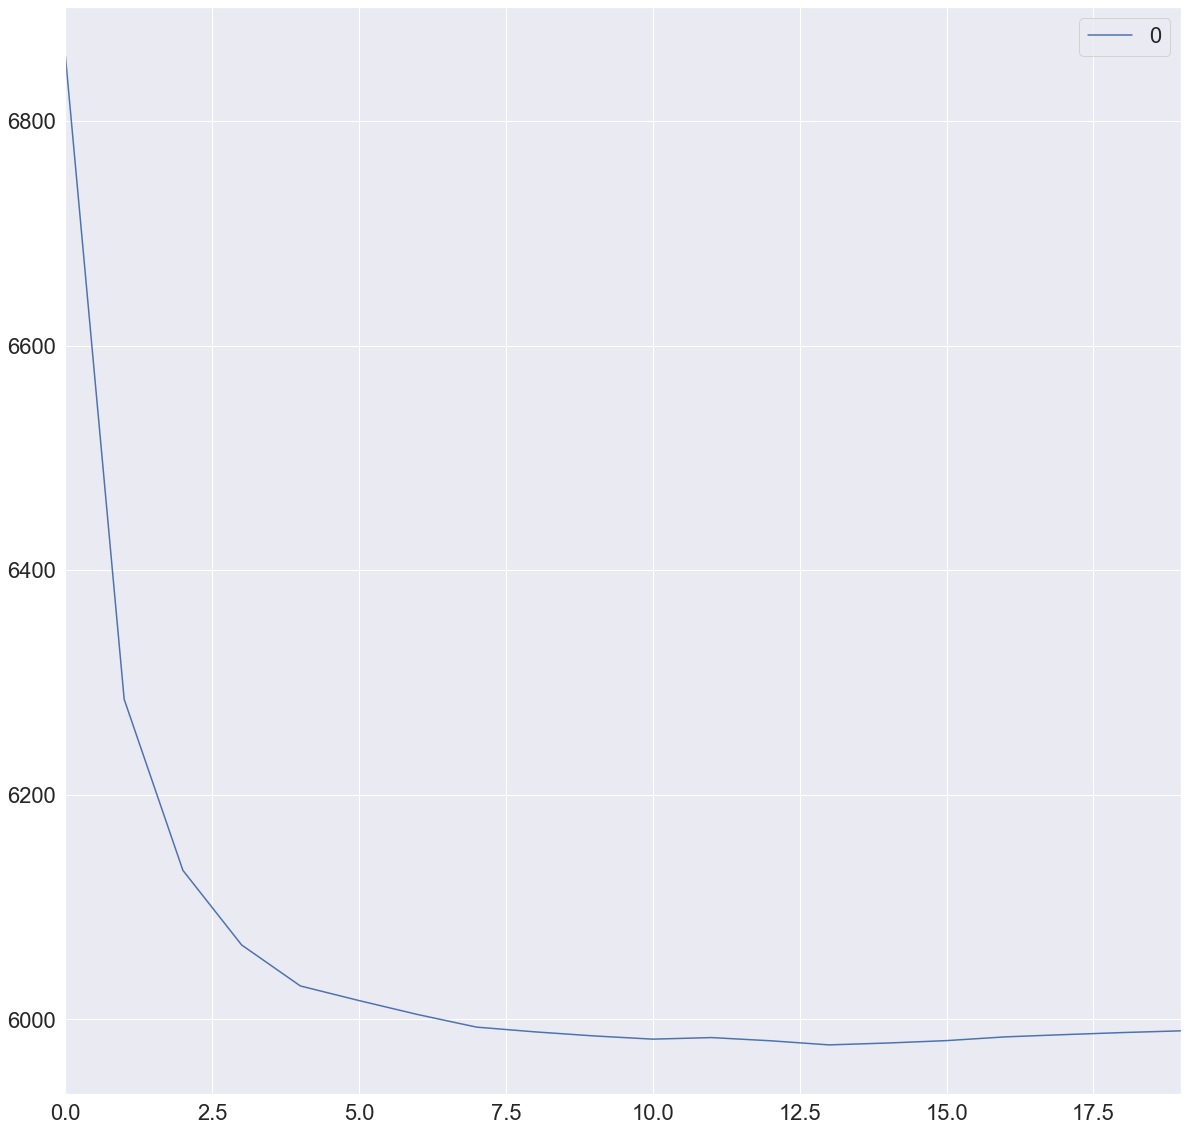

In [732]:
#rmse values against k values
plt.figure(figsize=(8,8))
sns.set(font_scale=2)
curve = pd.DataFrame(rmse_val) 
curve.plot()

as is shown in the plot, 8-15 are the best predictors in terms of errors

In [434]:
X_train_knn, X_test_knn,y_train_knn, y_test_knn=train_test_split(X,y,train_size=0.5, random_state=42)

In [481]:
knn =neighbors.KNeighborsRegressor(n_neighbors = 3)

In [482]:
knn.fit(X_train_knn, y_train_knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [483]:
y_predict_knn = knn.predict(X_test_knn)

In [484]:
test_rmse_knn= np.sqrt(MSE(y_test_knn , y_predict_knn))
print("KNN RMSE= {:.2f}".format(test_rmse_knn))
train_rmse_knn = np.sqrt(MSE(y_train_knn, y_predict_knn[1:]))
print("KNN RMSE = {:.2f}".format(train_rmse_knn))

KNN RMSE= 6577.06
KNN RMSE = 10756.86


In [485]:
r2_test_knn=r2_score(y_test_knn, y_predict_knn)
r2_train_knn=r2_score(y_train_knn, y_predict_knn[1:])

# compare the models

In [488]:
r2_train=[r2_train_dumr,r2_train_lr,r2_train_rf,r2_train_gbr,r2_train_knn]
r2_test=[r2_test_dumr,r2_test_lr,r2_test_rf,r2_test_gbr,r2_test_knn]
rmse_train=[train_rmse_dumr,train_rmse_lr,train_rmse_rf,train_rmse_gbr,train_rmse_knn]
rmse_test=[test_rmse_dumr,test_rmse_lr,test_rmse_rf,test_rmse_gbr,test_rmse_knn]

In [489]:
models = pd.DataFrame({
    'Model': ['Dummy Regressor','Linear Regression', 'Random Forest Regressor', 'GradientBoostingRegressor', 'KNN'],
    
    'r2_train':r2_train,
    'r2_test': r2_test,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test})

In [490]:
pd.options.display.float_format = '{:,.2f}'.format

In [491]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


Model  r2_train  r2_test  rmse_train  rmse_test
3  GradientBoostingRegressor     -0.43     0.48    9,827.91   5,966.61
4                        KNN     -0.71     0.36   10,756.86   6,577.06
1          Linear Regression     -0.31     0.31    9,400.13   6,837.72
2    Random Forest Regressor     -0.31     0.31    9,400.13   6,837.72
0            Dummy Regressor      0.00    -0.00    8,223.75   8,235.70

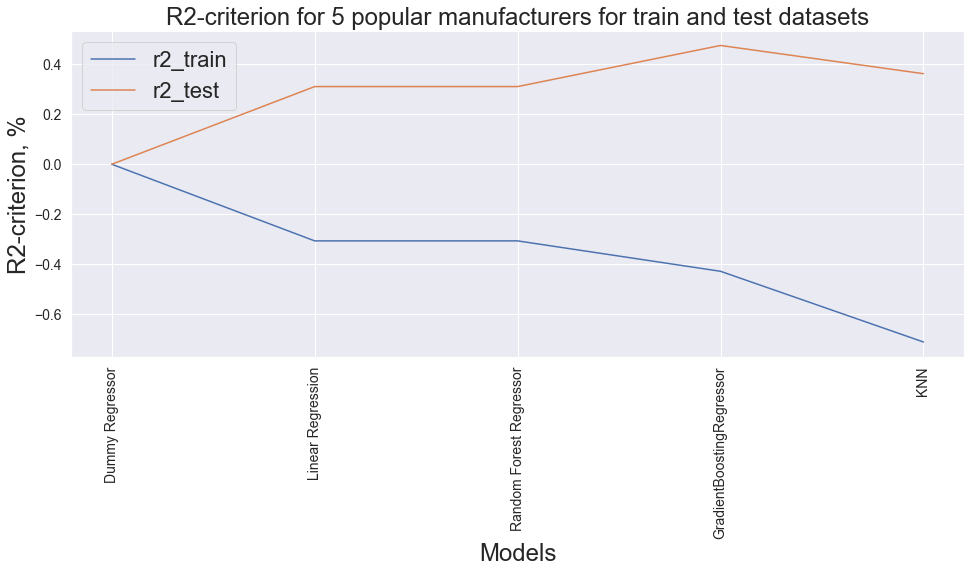

In [729]:
# Plot
plt.figure(figsize=[16,6])
xx = models['Model']
plt.tick_params(labelsize=14)
sns.set(font_scale=2)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for 5 popular manufacturers for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

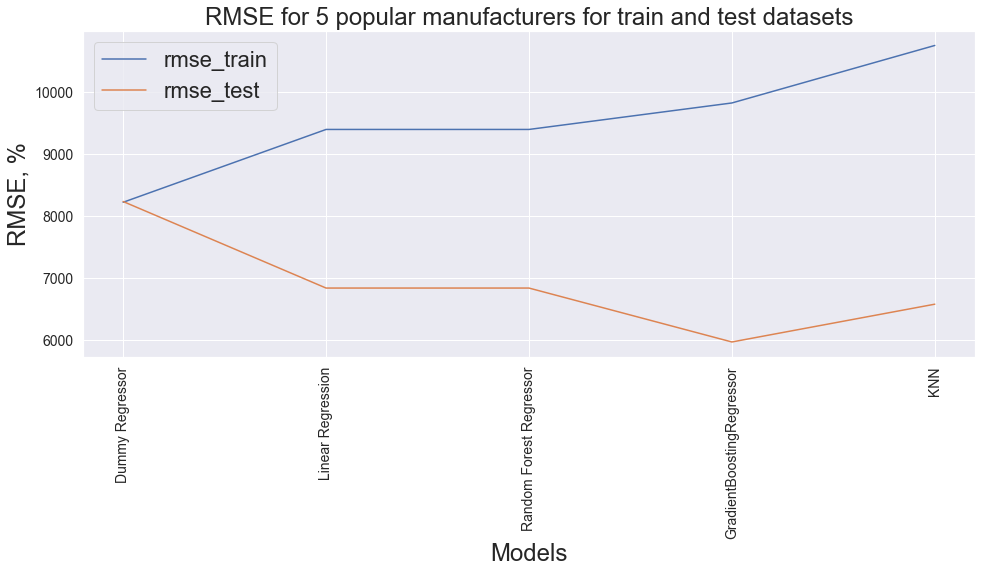

In [730]:
# Plot
plt.figure(figsize=[16,6])
sns.set(font_scale=2)
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for 5 popular manufacturers for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

## Thus, the best models by the RMSE is Gradient Boosting Regression